<a href="https://colab.research.google.com/github/sagar9926/NLP_Specialisation/blob/main/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Hello Vectors

Welcome to this week's programming assignment on exploring word vectors.
In natural language processing, we represent each word as a vector consisting of numbers.
The vector encodes the meaning of the word. These numbers (or weights) for each word are learned using various machine
learning models, which we will explore in more detail later in this specialization. Rather than make you code the
machine learning models from scratch, we will show you how to use them. In the real world, you can always load the
trained word vectors, and you will almost never have to train them from scratch. In this assignment, you will:

- Predict analogies between words.
- Use PCA to reduce the dimensionality of the word embeddings and plot them in two dimensions.
- Compare word embeddings by using a similarity measure (the cosine similarity).
- Understand how these vector space models work.



## 1.0 Predict the Countries from Capitals

In the lectures, we have illustrated the word analogies
by finding the capital of a country from the country. 
We have changed the problem a bit in this part of the assignment. You are asked to predict the **countries** 
that corresponds to some **capitals**.
You are playing trivia against some second grader who just took their geography test and knows all the capitals by heart.
Thanks to NLP, you will be able to answer the questions properly. In other words, you will write a program that can give
you the country by its capital. That way you are pretty sure you will win the trivia game. We will start by exploring the data set.

<img src = 'https://images.all-free-download.com/images/graphicthumb/nostalgic_world_map_background_picture_169475.jpg' width="width" height="height" style="width:467px;height:300px;"/>

###  1.1 Importing the data

As usual, you start by importing some essential Python libraries and then load the dataset.
The dataset will be loaded as a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html),
which is very a common method in data science.
This may take a few minutes because of the large size of the data.

In [1]:
# Run this cell to import packages.
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
f = 'Athens Greece Baghdad Iraq\nAthens Greece Bangkok Thailand\nAthens Greece Beijing China\nAthens Greece Berlin Germany\nAthens Greece Bern Switzerland\nAthens Greece Cairo Egypt\nAthens Greece Canberra Australia\nAthens Greece Hanoi Vietnam\nAthens Greece Havana Cuba\nAthens Greece Helsinki Finland\nAthens Greece Islamabad Pakistan\nAthens Greece Kabul Afghanistan\nAthens Greece London England\nAthens Greece Madrid Spain\nAthens Greece Moscow Russia\nAthens Greece Oslo Norway\nAthens Greece Ottawa Canada\nAthens Greece Paris France\nAthens Greece Rome Italy\nAthens Greece Stockholm Sweden\nAthens Greece Tehran Iran\nAthens Greece Tokyo Japan\nBaghdad Iraq Bangkok Thailand\nBaghdad Iraq Beijing China\nBaghdad Iraq Berlin Germany\nBaghdad Iraq Bern Switzerland\nBaghdad Iraq Cairo Egypt\nBaghdad Iraq Canberra Australia\nBaghdad Iraq Hanoi Vietnam\nBaghdad Iraq Havana Cuba\nBaghdad Iraq Helsinki Finland\nBaghdad Iraq Islamabad Pakistan\nBaghdad Iraq Kabul Afghanistan\nBaghdad Iraq London England\nBaghdad Iraq Madrid Spain\nBaghdad Iraq Moscow Russia\nBaghdad Iraq Oslo Norway\nBaghdad Iraq Ottawa Canada\nBaghdad Iraq Paris France\nBaghdad Iraq Rome Italy\nBaghdad Iraq Stockholm Sweden\nBaghdad Iraq Tehran Iran\nBaghdad Iraq Tokyo Japan\nBaghdad Iraq Athens Greece\nBangkok Thailand Beijing China\nBangkok Thailand Berlin Germany\nBangkok Thailand Bern Switzerland\nBangkok Thailand Cairo Egypt\nBangkok Thailand Canberra Australia\nBangkok Thailand Hanoi Vietnam\nBangkok Thailand Havana Cuba\nBangkok Thailand Helsinki Finland\nBangkok Thailand Islamabad Pakistan\nBangkok Thailand Kabul Afghanistan\nBangkok Thailand London England\nBangkok Thailand Madrid Spain\nBangkok Thailand Moscow Russia\nBangkok Thailand Oslo Norway\nBangkok Thailand Ottawa Canada\nBangkok Thailand Paris France\nBangkok Thailand Rome Italy\nBangkok Thailand Stockholm Sweden\nBangkok Thailand Tehran Iran\nBangkok Thailand Tokyo Japan\nBangkok Thailand Athens Greece\nBangkok Thailand Baghdad Iraq\nBeijing China Berlin Germany\nBeijing China Bern Switzerland\nBeijing China Cairo Egypt\nBeijing China Canberra Australia\nBeijing China Hanoi Vietnam\nBeijing China Havana Cuba\nBeijing China Helsinki Finland\nBeijing China Islamabad Pakistan\nBeijing China Kabul Afghanistan\nBeijing China London England\nBeijing China Madrid Spain\nBeijing China Moscow Russia\nBeijing China Oslo Norway\nBeijing China Ottawa Canada\nBeijing China Paris France\nBeijing China Rome Italy\nBeijing China Stockholm Sweden\nBeijing China Tehran Iran\nBeijing China Tokyo Japan\nBeijing China Athens Greece\nBeijing China Baghdad Iraq\nBeijing China Bangkok Thailand\nBerlin Germany Bern Switzerland\nBerlin Germany Cairo Egypt\nBerlin Germany Canberra Australia\nBerlin Germany Hanoi Vietnam\nBerlin Germany Havana Cuba\nBerlin Germany Helsinki Finland\nBerlin Germany Islamabad Pakistan\nBerlin Germany Kabul Afghanistan\nBerlin Germany London England\nBerlin Germany Madrid Spain\nBerlin Germany Moscow Russia\nBerlin Germany Oslo Norway\nBerlin Germany Ottawa Canada\nBerlin Germany Paris France\nBerlin Germany Rome Italy\nBerlin Germany Stockholm Sweden\nBerlin Germany Tehran Iran\nBerlin Germany Tokyo Japan\nBerlin Germany Athens Greece\nBerlin Germany Baghdad Iraq\nBerlin Germany Bangkok Thailand\nBerlin Germany Beijing China\nBern Switzerland Cairo Egypt\nBern Switzerland Canberra Australia\nBern Switzerland Hanoi Vietnam\nBern Switzerland Havana Cuba\nBern Switzerland Helsinki Finland\nBern Switzerland Islamabad Pakistan\nBern Switzerland Kabul Afghanistan\nBern Switzerland London England\nBern Switzerland Madrid Spain\nBern Switzerland Moscow Russia\nBern Switzerland Oslo Norway\nBern Switzerland Ottawa Canada\nBern Switzerland Paris France\nBern Switzerland Rome Italy\nBern Switzerland Stockholm Sweden\nBern Switzerland Tehran Iran\nBern Switzerland Tokyo Japan\nBern Switzerland Athens Greece\nBern Switzerland Baghdad Iraq\nBern Switzerland Bangkok Thailand\nBern Switzerland Beijing China\nBern Switzerland Berlin Germany\nCairo Egypt Canberra Australia\nCairo Egypt Hanoi Vietnam\nCairo Egypt Havana Cuba\nCairo Egypt Helsinki Finland\nCairo Egypt Islamabad Pakistan\nCairo Egypt Kabul Afghanistan\nCairo Egypt London England\nCairo Egypt Madrid Spain\nCairo Egypt Moscow Russia\nCairo Egypt Oslo Norway\nCairo Egypt Ottawa Canada\nCairo Egypt Paris France\nCairo Egypt Rome Italy\nCairo Egypt Stockholm Sweden\nCairo Egypt Tehran Iran\nCairo Egypt Tokyo Japan\nCairo Egypt Athens Greece\nCairo Egypt Baghdad Iraq\nCairo Egypt Bangkok Thailand\nCairo Egypt Beijing China\nCairo Egypt Berlin Germany\nCairo Egypt Bern Switzerland\nCanberra Australia Hanoi Vietnam\nCanberra Australia Havana Cuba\nCanberra Australia Helsinki Finland\nCanberra Australia Islamabad Pakistan\nCanberra Australia Kabul Afghanistan\nCanberra Australia London England\nCanberra Australia Madrid Spain\nCanberra Australia Moscow Russia\nCanberra Australia Oslo Norway\nCanberra Australia Ottawa Canada\nCanberra Australia Paris France\nCanberra Australia Rome Italy\nCanberra Australia Stockholm Sweden\nCanberra Australia Tehran Iran\nCanberra Australia Tokyo Japan\nCanberra Australia Athens Greece\nCanberra Australia Baghdad Iraq\nCanberra Australia Bangkok Thailand\nCanberra Australia Beijing China\nCanberra Australia Berlin Germany\nCanberra Australia Bern Switzerland\nCanberra Australia Cairo Egypt\nHanoi Vietnam Havana Cuba\nHanoi Vietnam Helsinki Finland\nHanoi Vietnam Islamabad Pakistan\nHanoi Vietnam Kabul Afghanistan\nHanoi Vietnam London England\nHanoi Vietnam Madrid Spain\nHanoi Vietnam Moscow Russia\nHanoi Vietnam Oslo Norway\nHanoi Vietnam Ottawa Canada\nHanoi Vietnam Paris France\nHanoi Vietnam Rome Italy\nHanoi Vietnam Stockholm Sweden\nHanoi Vietnam Tehran Iran\nHanoi Vietnam Tokyo Japan\nHanoi Vietnam Athens Greece\nHanoi Vietnam Baghdad Iraq\nHanoi Vietnam Bangkok Thailand\nHanoi Vietnam Beijing China\nHanoi Vietnam Berlin Germany\nHanoi Vietnam Bern Switzerland\nHanoi Vietnam Cairo Egypt\nHanoi Vietnam Canberra Australia\nHavana Cuba Helsinki Finland\nHavana Cuba Islamabad Pakistan\nHavana Cuba Kabul Afghanistan\nHavana Cuba London England\nHavana Cuba Madrid Spain\nHavana Cuba Moscow Russia\nHavana Cuba Oslo Norway\nHavana Cuba Ottawa Canada\nHavana Cuba Paris France\nHavana Cuba Rome Italy\nHavana Cuba Stockholm Sweden\nHavana Cuba Tehran Iran\nHavana Cuba Tokyo Japan\nHavana Cuba Athens Greece\nHavana Cuba Baghdad Iraq\nHavana Cuba Bangkok Thailand\nHavana Cuba Beijing China\nHavana Cuba Berlin Germany\nHavana Cuba Bern Switzerland\nHavana Cuba Cairo Egypt\nHavana Cuba Canberra Australia\nHavana Cuba Hanoi Vietnam\nHelsinki Finland Islamabad Pakistan\nHelsinki Finland Kabul Afghanistan\nHelsinki Finland London England\nHelsinki Finland Madrid Spain\nHelsinki Finland Moscow Russia\nHelsinki Finland Oslo Norway\nHelsinki Finland Ottawa Canada\nHelsinki Finland Paris France\nHelsinki Finland Rome Italy\nHelsinki Finland Stockholm Sweden\nHelsinki Finland Tehran Iran\nHelsinki Finland Tokyo Japan\nHelsinki Finland Athens Greece\nHelsinki Finland Baghdad Iraq\nHelsinki Finland Bangkok Thailand\nHelsinki Finland Beijing China\nHelsinki Finland Berlin Germany\nHelsinki Finland Bern Switzerland\nHelsinki Finland Cairo Egypt\nHelsinki Finland Canberra Australia\nHelsinki Finland Hanoi Vietnam\nHelsinki Finland Havana Cuba\nIslamabad Pakistan Kabul Afghanistan\nIslamabad Pakistan London England\nIslamabad Pakistan Madrid Spain\nIslamabad Pakistan Moscow Russia\nIslamabad Pakistan Oslo Norway\nIslamabad Pakistan Ottawa Canada\nIslamabad Pakistan Paris France\nIslamabad Pakistan Rome Italy\nIslamabad Pakistan Stockholm Sweden\nIslamabad Pakistan Tehran Iran\nIslamabad Pakistan Tokyo Japan\nIslamabad Pakistan Athens Greece\nIslamabad Pakistan Baghdad Iraq\nIslamabad Pakistan Bangkok Thailand\nIslamabad Pakistan Beijing China\nIslamabad Pakistan Berlin Germany\nIslamabad Pakistan Bern Switzerland\nIslamabad Pakistan Cairo Egypt\nIslamabad Pakistan Canberra Australia\nIslamabad Pakistan Hanoi Vietnam\nIslamabad Pakistan Havana Cuba\nIslamabad Pakistan Helsinki Finland\nKabul Afghanistan London England\nKabul Afghanistan Madrid Spain\nKabul Afghanistan Moscow Russia\nKabul Afghanistan Oslo Norway\nKabul Afghanistan Ottawa Canada\nKabul Afghanistan Paris France\nKabul Afghanistan Rome Italy\nKabul Afghanistan Stockholm Sweden\nKabul Afghanistan Tehran Iran\nKabul Afghanistan Tokyo Japan\nKabul Afghanistan Athens Greece\nKabul Afghanistan Baghdad Iraq\nKabul Afghanistan Bangkok Thailand\nKabul Afghanistan Beijing China\nKabul Afghanistan Berlin Germany\nKabul Afghanistan Bern Switzerland\nKabul Afghanistan Cairo Egypt\nKabul Afghanistan Canberra Australia\nKabul Afghanistan Hanoi Vietnam\nKabul Afghanistan Havana Cuba\nKabul Afghanistan Helsinki Finland\nKabul Afghanistan Islamabad Pakistan\nLondon England Madrid Spain\nLondon England Moscow Russia\nLondon England Oslo Norway\nLondon England Ottawa Canada\nLondon England Paris France\nLondon England Rome Italy\nLondon England Stockholm Sweden\nLondon England Tehran Iran\nLondon England Tokyo Japan\nLondon England Athens Greece\nLondon England Baghdad Iraq\nLondon England Bangkok Thailand\nLondon England Beijing China\nLondon England Berlin Germany\nLondon England Bern Switzerland\nLondon England Cairo Egypt\nLondon England Canberra Australia\nLondon England Hanoi Vietnam\nLondon England Havana Cuba\nLondon England Helsinki Finland\nLondon England Islamabad Pakistan\nLondon England Kabul Afghanistan\nMadrid Spain Moscow Russia\nMadrid Spain Oslo Norway\nMadrid Spain Ottawa Canada\nMadrid Spain Paris France\nMadrid Spain Rome Italy\nMadrid Spain Stockholm Sweden\nMadrid Spain Tehran Iran\nMadrid Spain Tokyo Japan\nMadrid Spain Athens Greece\nMadrid Spain Baghdad Iraq\nMadrid Spain Bangkok Thailand\nMadrid Spain Beijing China\nMadrid Spain Berlin Germany\nMadrid Spain Bern Switzerland\nMadrid Spain Cairo Egypt\nMadrid Spain Canberra Australia\nMadrid Spain Hanoi Vietnam\nMadrid Spain Havana Cuba\nMadrid Spain Helsinki Finland\nMadrid Spain Islamabad Pakistan\nMadrid Spain Kabul Afghanistan\nMadrid Spain London England\nMoscow Russia Oslo Norway\nMoscow Russia Ottawa Canada\nMoscow Russia Paris France\nMoscow Russia Rome Italy\nMoscow Russia Stockholm Sweden\nMoscow Russia Tehran Iran\nMoscow Russia Tokyo Japan\nMoscow Russia Athens Greece\nMoscow Russia Baghdad Iraq\nMoscow Russia Bangkok Thailand\nMoscow Russia Beijing China\nMoscow Russia Berlin Germany\nMoscow Russia Bern Switzerland\nMoscow Russia Cairo Egypt\nMoscow Russia Canberra Australia\nMoscow Russia Hanoi Vietnam\nMoscow Russia Havana Cuba\nMoscow Russia Helsinki Finland\nMoscow Russia Islamabad Pakistan\nMoscow Russia Kabul Afghanistan\nMoscow Russia London England\nMoscow Russia Madrid Spain\nOslo Norway Ottawa Canada\nOslo Norway Paris France\nOslo Norway Rome Italy\nOslo Norway Stockholm Sweden\nOslo Norway Tehran Iran\nOslo Norway Tokyo Japan\nOslo Norway Athens Greece\nOslo Norway Baghdad Iraq\nOslo Norway Bangkok Thailand\nOslo Norway Beijing China\nOslo Norway Berlin Germany\nOslo Norway Bern Switzerland\nOslo Norway Cairo Egypt\nOslo Norway Canberra Australia\nOslo Norway Hanoi Vietnam\nOslo Norway Havana Cuba\nOslo Norway Helsinki Finland\nOslo Norway Islamabad Pakistan\nOslo Norway Kabul Afghanistan\nOslo Norway London England\nOslo Norway Madrid Spain\nOslo Norway Moscow Russia\nOttawa Canada Paris France\nOttawa Canada Rome Italy\nOttawa Canada Stockholm Sweden\nOttawa Canada Tehran Iran\nOttawa Canada Tokyo Japan\nOttawa Canada Athens Greece\nOttawa Canada Baghdad Iraq\nOttawa Canada Bangkok Thailand\nOttawa Canada Beijing China\nOttawa Canada Berlin Germany\nOttawa Canada Bern Switzerland\nOttawa Canada Cairo Egypt\nOttawa Canada Canberra Australia\nOttawa Canada Hanoi Vietnam\nOttawa Canada Havana Cuba\nOttawa Canada Helsinki Finland\nOttawa Canada Islamabad Pakistan\nOttawa Canada Kabul Afghanistan\nOttawa Canada London England\nOttawa Canada Madrid Spain\nOttawa Canada Moscow Russia\nOttawa Canada Oslo Norway\nParis France Rome Italy\nParis France Stockholm Sweden\nParis France Tehran Iran\nParis France Tokyo Japan\nParis France Athens Greece\nParis France Baghdad Iraq\nParis France Bangkok Thailand\nParis France Beijing China\nParis France Berlin Germany\nParis France Bern Switzerland\nParis France Cairo Egypt\nParis France Canberra Australia\nParis France Hanoi Vietnam\nParis France Havana Cuba\nParis France Helsinki Finland\nParis France Islamabad Pakistan\nParis France Kabul Afghanistan\nParis France London England\nParis France Madrid Spain\nParis France Moscow Russia\nParis France Oslo Norway\nParis France Ottawa Canada\nRome Italy Stockholm Sweden\nRome Italy Tehran Iran\nRome Italy Tokyo Japan\nRome Italy Athens Greece\nRome Italy Baghdad Iraq\nRome Italy Bangkok Thailand\nRome Italy Beijing China\nRome Italy Berlin Germany\nRome Italy Bern Switzerland\nRome Italy Cairo Egypt\nRome Italy Canberra Australia\nRome Italy Hanoi Vietnam\nRome Italy Havana Cuba\nRome Italy Helsinki Finland\nRome Italy Islamabad Pakistan\nRome Italy Kabul Afghanistan\nRome Italy London England\nRome Italy Madrid Spain\nRome Italy Moscow Russia\nRome Italy Oslo Norway\nRome Italy Ottawa Canada\nRome Italy Paris France\nStockholm Sweden Tehran Iran\nStockholm Sweden Tokyo Japan\nStockholm Sweden Athens Greece\nStockholm Sweden Baghdad Iraq\nStockholm Sweden Bangkok Thailand\nStockholm Sweden Beijing China\nStockholm Sweden Berlin Germany\nStockholm Sweden Bern Switzerland\nStockholm Sweden Cairo Egypt\nStockholm Sweden Canberra Australia\nStockholm Sweden Hanoi Vietnam\nStockholm Sweden Havana Cuba\nStockholm Sweden Helsinki Finland\nStockholm Sweden Islamabad Pakistan\nStockholm Sweden Kabul Afghanistan\nStockholm Sweden London England\nStockholm Sweden Madrid Spain\nStockholm Sweden Moscow Russia\nStockholm Sweden Oslo Norway\nStockholm Sweden Ottawa Canada\nStockholm Sweden Paris France\nStockholm Sweden Rome Italy\nTehran Iran Tokyo Japan\nTehran Iran Athens Greece\nTehran Iran Baghdad Iraq\nTehran Iran Bangkok Thailand\nTehran Iran Beijing China\nTehran Iran Berlin Germany\nTehran Iran Bern Switzerland\nTehran Iran Cairo Egypt\nTehran Iran Canberra Australia\nTehran Iran Hanoi Vietnam\nTehran Iran Havana Cuba\nTehran Iran Helsinki Finland\nTehran Iran Islamabad Pakistan\nTehran Iran Kabul Afghanistan\nTehran Iran London England\nTehran Iran Madrid Spain\nTehran Iran Moscow Russia\nTehran Iran Oslo Norway\nTehran Iran Ottawa Canada\nTehran Iran Paris France\nTehran Iran Rome Italy\nTehran Iran Stockholm Sweden\nTokyo Japan Athens Greece\nTokyo Japan Baghdad Iraq\nTokyo Japan Bangkok Thailand\nTokyo Japan Beijing China\nTokyo Japan Berlin Germany\nTokyo Japan Bern Switzerland\nTokyo Japan Cairo Egypt\nTokyo Japan Canberra Australia\nTokyo Japan Hanoi Vietnam\nTokyo Japan Havana Cuba\nTokyo Japan Helsinki Finland\nTokyo Japan Islamabad Pakistan\nTokyo Japan Kabul Afghanistan\nTokyo Japan London England\nTokyo Japan Madrid Spain\nTokyo Japan Moscow Russia\nTokyo Japan Oslo Norway\nTokyo Japan Ottawa Canada\nTokyo Japan Paris France\nTokyo Japan Rome Italy\nTokyo Japan Stockholm Sweden\nTokyo Japan Tehran Iran\nAbuja Nigeria Accra Ghana\nAbuja Nigeria Algiers Algeria\nAbuja Nigeria Amman Jordan\nAbuja Nigeria Ankara Turkey\nAbuja Nigeria Antananarivo Madagascar\nAbuja Nigeria Apia Samoa\nAbuja Nigeria Ashgabat Turkmenistan\nAbuja Nigeria Asmara Eritrea\nAbuja Nigeria Astana Kazakhstan\nAbuja Nigeria Athens Greece\nAbuja Nigeria Baghdad Iraq\nAbuja Nigeria Baku Azerbaijan\nAbuja Nigeria Bamako Mali\nAbuja Nigeria Bangkok Thailand\nAbuja Nigeria Banjul Gambia\nAbuja Nigeria Beijing China\nAbuja Nigeria Beirut Lebanon\nAbuja Nigeria Belgrade Serbia\nAbuja Nigeria Belmopan Belize\nAbuja Nigeria Berlin Germany\nAbuja Nigeria Bern Switzerland\nAbuja Nigeria Bishkek Kyrgyzstan\nAbuja Nigeria Bratislava Slovakia\nAbuja Nigeria Brussels Belgium\nAbuja Nigeria Bucharest Romania\nAbuja Nigeria Budapest Hungary\nAbuja Nigeria Bujumbura Burundi\nAbuja Nigeria Cairo Egypt\nAbuja Nigeria Canberra Australia\nAbuja Nigeria Caracas Venezuela\nAbuja Nigeria Chisinau Moldova\nAbuja Nigeria Conakry Guinea\nAbuja Nigeria Copenhagen Denmark\nAbuja Nigeria Dakar Senegal\nAbuja Nigeria Damascus Syria\nAbuja Nigeria Dhaka Bangladesh\nAbuja Nigeria Doha Qatar\nAbuja Nigeria Dublin Ireland\nAbuja Nigeria Dushanbe Tajikistan\nAccra Ghana Algiers Algeria\nAccra Ghana Amman Jordan\nAccra Ghana Ankara Turkey\nAccra Ghana Antananarivo Madagascar\nAccra Ghana Apia Samoa\nAccra Ghana Ashgabat Turkmenistan\nAccra Ghana Asmara Eritrea\nAccra Ghana Astana Kazakhstan\nAccra Ghana Athens Greece\nAccra Ghana Baghdad Iraq\nAccra Ghana Baku Azerbaijan\nAccra Ghana Bamako Mali\nAccra Ghana Bangkok Thailand\nAccra Ghana Banjul Gambia\nAccra Ghana Beijing China\nAccra Ghana Beirut Lebanon\nAccra Ghana Belgrade Serbia\nAccra Ghana Belmopan Belize\nAccra Ghana Berlin Germany\nAccra Ghana Bern Switzerland\nAccra Ghana Bishkek Kyrgyzstan\nAccra Ghana Bratislava Slovakia\nAccra Ghana Brussels Belgium\nAccra Ghana Bucharest Romania\nAccra Ghana Budapest Hungary\nAccra Ghana Bujumbura Burundi\nAccra Ghana Cairo Egypt\nAccra Ghana Canberra Australia\nAccra Ghana Caracas Venezuela\nAccra Ghana Chisinau Moldova\nAccra Ghana Conakry Guinea\nAccra Ghana Copenhagen Denmark\nAccra Ghana Dakar Senegal\nAccra Ghana Damascus Syria\nAccra Ghana Dhaka Bangladesh\nAccra Ghana Doha Qatar\nAccra Ghana Dublin Ireland\nAccra Ghana Dushanbe Tajikistan\nAccra Ghana Funafuti Tuvalu\nAlgiers Algeria Amman Jordan\nAlgiers Algeria Ankara Turkey\nAlgiers Algeria Antananarivo Madagascar\nAlgiers Algeria Apia Samoa\nAlgiers Algeria Ashgabat Turkmenistan\nAlgiers Algeria Asmara Eritrea\nAlgiers Algeria Astana Kazakhstan\nAlgiers Algeria Athens Greece\nAlgiers Algeria Baghdad Iraq\nAlgiers Algeria Baku Azerbaijan\nAlgiers Algeria Bamako Mali\nAlgiers Algeria Bangkok Thailand\nAlgiers Algeria Banjul Gambia\nAlgiers Algeria Beijing China\nAlgiers Algeria Beirut Lebanon\nAlgiers Algeria Belgrade Serbia\nAlgiers Algeria Belmopan Belize\nAlgiers Algeria Berlin Germany\nAlgiers Algeria Bern Switzerland\nAlgiers Algeria Bishkek Kyrgyzstan\nAlgiers Algeria Bratislava Slovakia\nAlgiers Algeria Brussels Belgium\nAlgiers Algeria Bucharest Romania\nAlgiers Algeria Budapest Hungary\nAlgiers Algeria Bujumbura Burundi\nAlgiers Algeria Cairo Egypt\nAlgiers Algeria Canberra Australia\nAlgiers Algeria Caracas Venezuela\nAlgiers Algeria Chisinau Moldova\nAlgiers Algeria Conakry Guinea\nAlgiers Algeria Copenhagen Denmark\nAlgiers Algeria Dakar Senegal\nAlgiers Algeria Damascus Syria\nAlgiers Algeria Dhaka Bangladesh\nAlgiers Algeria Doha Qatar\nAlgiers Algeria Dublin Ireland\nAlgiers Algeria Dushanbe Tajikistan\nAlgiers Algeria Funafuti Tuvalu\nAlgiers Algeria Gaborone Botswana\nAmman Jordan Ankara Turkey\nAmman Jordan Antananarivo Madagascar\nAmman Jordan Apia Samoa\nAmman Jordan Ashgabat Turkmenistan\nAmman Jordan Asmara Eritrea\nAmman Jordan Astana Kazakhstan\nAmman Jordan Athens Greece\nAmman Jordan Baghdad Iraq\nAmman Jordan Baku Azerbaijan\nAmman Jordan Bamako Mali\nAmman Jordan Bangkok Thailand\nAmman Jordan Banjul Gambia\nAmman Jordan Beijing China\nAmman Jordan Beirut Lebanon\nAmman Jordan Belgrade Serbia\nAmman Jordan Belmopan Belize\nAmman Jordan Berlin Germany\nAmman Jordan Bern Switzerland\nAmman Jordan Bishkek Kyrgyzstan\nAmman Jordan Bratislava Slovakia\nAmman Jordan Brussels Belgium\nAmman Jordan Bucharest Romania\nAmman Jordan Budapest Hungary\nAmman Jordan Bujumbura Burundi\nAmman Jordan Cairo Egypt\nAmman Jordan Canberra Australia\nAmman Jordan Caracas Venezuela\nAmman Jordan Chisinau Moldova\nAmman Jordan Conakry Guinea\nAmman Jordan Copenhagen Denmark\nAmman Jordan Dakar Senegal\nAmman Jordan Damascus Syria\nAmman Jordan Dhaka Bangladesh\nAmman Jordan Doha Qatar\nAmman Jordan Dublin Ireland\nAmman Jordan Dushanbe Tajikistan\nAmman Jordan Funafuti Tuvalu\nAmman Jordan Gaborone Botswana\nAmman Jordan Georgetown Guyana\nAnkara Turkey Antananarivo Madagascar\nAnkara Turkey Apia Samoa\nAnkara Turkey Ashgabat Turkmenistan\nAnkara Turkey Asmara Eritrea\nAnkara Turkey Astana Kazakhstan\nAnkara Turkey Athens Greece\nAnkara Turkey Baghdad Iraq\nAnkara Turkey Baku Azerbaijan\nAnkara Turkey Bamako Mali\nAnkara Turkey Bangkok Thailand\nAnkara Turkey Banjul Gambia\nAnkara Turkey Beijing China\nAnkara Turkey Beirut Lebanon\nAnkara Turkey Belgrade Serbia\nAnkara Turkey Belmopan Belize\nAnkara Turkey Berlin Germany\nAnkara Turkey Bern Switzerland\nAnkara Turkey Bishkek Kyrgyzstan\nAnkara Turkey Bratislava Slovakia\nAnkara Turkey Brussels Belgium\nAnkara Turkey Bucharest Romania\nAnkara Turkey Budapest Hungary\nAnkara Turkey Bujumbura Burundi\nAnkara Turkey Cairo Egypt\nAnkara Turkey Canberra Australia\nAnkara Turkey Caracas Venezuela\nAnkara Turkey Chisinau Moldova\nAnkara Turkey Conakry Guinea\nAnkara Turkey Copenhagen Denmark\nAnkara Turkey Dakar Senegal\nAnkara Turkey Damascus Syria\nAnkara Turkey Dhaka Bangladesh\nAnkara Turkey Doha Qatar\nAnkara Turkey Dublin Ireland\nAnkara Turkey Dushanbe Tajikistan\nAnkara Turkey Funafuti Tuvalu\nAnkara Turkey Gaborone Botswana\nAnkara Turkey Georgetown Guyana\nAnkara Turkey Hanoi Vietnam\nAntananarivo Madagascar Apia Samoa\nAntananarivo Madagascar Ashgabat Turkmenistan\nAntananarivo Madagascar Asmara Eritrea\nAntananarivo Madagascar Astana Kazakhstan\nAntananarivo Madagascar Athens Greece\nAntananarivo Madagascar Baghdad Iraq\nAntananarivo Madagascar Baku Azerbaijan\nAntananarivo Madagascar Bamako Mali\nAntananarivo Madagascar Bangkok Thailand\nAntananarivo Madagascar Banjul Gambia\nAntananarivo Madagascar Beijing China\nAntananarivo Madagascar Beirut Lebanon\nAntananarivo Madagascar Belgrade Serbia\nAntananarivo Madagascar Belmopan Belize\nAntananarivo Madagascar Berlin Germany\nAntananarivo Madagascar Bern Switzerland\nAntananarivo Madagascar Bishkek Kyrgyzstan\nAntananarivo Madagascar Bratislava Slovakia\nAntananarivo Madagascar Brussels Belgium\nAntananarivo Madagascar Bucharest Romania\nAntananarivo Madagascar Budapest Hungary\nAntananarivo Madagascar Bujumbura Burundi\nAntananarivo Madagascar Cairo Egypt\nAntananarivo Madagascar Canberra Australia\nAntananarivo Madagascar Caracas Venezuela\nAntananarivo Madagascar Chisinau Moldova\nAntananarivo Madagascar Conakry Guinea\nAntananarivo Madagascar Copenhagen Denmark\nAntananarivo Madagascar Dakar Senegal\nAntananarivo Madagascar Damascus Syria\nAntananarivo Madagascar Dhaka Bangladesh\nAntananarivo Madagascar Doha Qatar\nAntananarivo Madagascar Dublin Ireland\nAntananarivo Madagascar Dushanbe Tajikistan\nAntananarivo Madagascar Funafuti Tuvalu\nAntananarivo Madagascar Gaborone Botswana\nAntananarivo Madagascar Georgetown Guyana\nAntananarivo Madagascar Hanoi Vietnam\nAntananarivo Madagascar Harare Zimbabwe\nApia Samoa Ashgabat Turkmenistan\nApia Samoa Asmara Eritrea\nApia Samoa Astana Kazakhstan\nApia Samoa Athens Greece\nApia Samoa Baghdad Iraq\nApia Samoa Baku Azerbaijan\nApia Samoa Bamako Mali\nApia Samoa Bangkok Thailand\nApia Samoa Banjul Gambia\nApia Samoa Beijing China\nApia Samoa Beirut Lebanon\nApia Samoa Belgrade Serbia\nApia Samoa Belmopan Belize\nApia Samoa Berlin Germany\nApia Samoa Bern Switzerland\nApia Samoa Bishkek Kyrgyzstan\nApia Samoa Bratislava Slovakia\nApia Samoa Brussels Belgium\nApia Samoa Bucharest Romania\nApia Samoa Budapest Hungary\nApia Samoa Bujumbura Burundi\nApia Samoa Cairo Egypt\nApia Samoa Canberra Australia\nApia Samoa Caracas Venezuela\nApia Samoa Chisinau Moldova\nApia Samoa Conakry Guinea\nApia Samoa Copenhagen Denmark\nApia Samoa Dakar Senegal\nApia Samoa Damascus Syria\nApia Samoa Dhaka Bangladesh\nApia Samoa Doha Qatar\nApia Samoa Dublin Ireland\nApia Samoa Dushanbe Tajikistan\nApia Samoa Funafuti Tuvalu\nApia Samoa Gaborone Botswana\nApia Samoa Georgetown Guyana\nApia Samoa Hanoi Vietnam\nApia Samoa Harare Zimbabwe\nApia Samoa Havana Cuba\nAshgabat Turkmenistan Asmara Eritrea\nAshgabat Turkmenistan Astana Kazakhstan\nAshgabat Turkmenistan Athens Greece\nAshgabat Turkmenistan Baghdad Iraq\nAshgabat Turkmenistan Baku Azerbaijan\nAshgabat Turkmenistan Bamako Mali\nAshgabat Turkmenistan Bangkok Thailand\nAshgabat Turkmenistan Banjul Gambia\nAshgabat Turkmenistan Beijing China\nAshgabat Turkmenistan Beirut Lebanon\nAshgabat Turkmenistan Belgrade Serbia\nAshgabat Turkmenistan Belmopan Belize\nAshgabat Turkmenistan Berlin Germany\nAshgabat Turkmenistan Bern Switzerland\nAshgabat Turkmenistan Bishkek Kyrgyzstan\nAshgabat Turkmenistan Bratislava Slovakia\nAshgabat Turkmenistan Brussels Belgium\nAshgabat Turkmenistan Bucharest Romania\nAshgabat Turkmenistan Budapest Hungary\nAshgabat Turkmenistan Bujumbura Burundi\nAshgabat Turkmenistan Cairo Egypt\nAshgabat Turkmenistan Canberra Australia\nAshgabat Turkmenistan Caracas Venezuela\nAshgabat Turkmenistan Chisinau Moldova\nAshgabat Turkmenistan Conakry Guinea\nAshgabat Turkmenistan Copenhagen Denmark\nAshgabat Turkmenistan Dakar Senegal\nAshgabat Turkmenistan Damascus Syria\nAshgabat Turkmenistan Dhaka Bangladesh\nAshgabat Turkmenistan Doha Qatar\nAshgabat Turkmenistan Dublin Ireland\nAshgabat Turkmenistan Dushanbe Tajikistan\nAshgabat Turkmenistan Funafuti Tuvalu\nAshgabat Turkmenistan Gaborone Botswana\nAshgabat Turkmenistan Georgetown Guyana\nAshgabat Turkmenistan Hanoi Vietnam\nAshgabat Turkmenistan Harare Zimbabwe\nAshgabat Turkmenistan Havana Cuba\nAshgabat Turkmenistan Helsinki Finland\nAsmara Eritrea Astana Kazakhstan\nAsmara Eritrea Athens Greece\nAsmara Eritrea Baghdad Iraq\nAsmara Eritrea Baku Azerbaijan\nAsmara Eritrea Bamako Mali\nAsmara Eritrea Bangkok Thailand\nAsmara Eritrea Banjul Gambia\nAsmara Eritrea Beijing China\nAsmara Eritrea Beirut Lebanon\nAsmara Eritrea Belgrade Serbia\nAsmara Eritrea Belmopan Belize\nAsmara Eritrea Berlin Germany\nAsmara Eritrea Bern Switzerland\nAsmara Eritrea Bishkek Kyrgyzstan\nAsmara Eritrea Bratislava Slovakia\nAsmara Eritrea Brussels Belgium\nAsmara Eritrea Bucharest Romania\nAsmara Eritrea Budapest Hungary\nAsmara Eritrea Bujumbura Burundi\nAsmara Eritrea Cairo Egypt\nAsmara Eritrea Canberra Australia\nAsmara Eritrea Caracas Venezuela\nAsmara Eritrea Chisinau Moldova\nAsmara Eritrea Conakry Guinea\nAsmara Eritrea Copenhagen Denmark\nAsmara Eritrea Dakar Senegal\nAsmara Eritrea Damascus Syria\nAsmara Eritrea Dhaka Bangladesh\nAsmara Eritrea Doha Qatar\nAsmara Eritrea Dublin Ireland\nAsmara Eritrea Dushanbe Tajikistan\nAsmara Eritrea Funafuti Tuvalu\nAsmara Eritrea Gaborone Botswana\nAsmara Eritrea Georgetown Guyana\nAsmara Eritrea Hanoi Vietnam\nAsmara Eritrea Harare Zimbabwe\nAsmara Eritrea Havana Cuba\nAsmara Eritrea Helsinki Finland\nAsmara Eritrea Islamabad Pakistan\nAstana Kazakhstan Athens Greece\nAstana Kazakhstan Baghdad Iraq\nAstana Kazakhstan Baku Azerbaijan\nAstana Kazakhstan Bamako Mali\nAstana Kazakhstan Bangkok Thailand\nAstana Kazakhstan Banjul Gambia\nAstana Kazakhstan Beijing China\nAstana Kazakhstan Beirut Lebanon\nAstana Kazakhstan Belgrade Serbia\nAstana Kazakhstan Belmopan Belize\nAstana Kazakhstan Berlin Germany\nAstana Kazakhstan Bern Switzerland\nAstana Kazakhstan Bishkek Kyrgyzstan\nAstana Kazakhstan Bratislava Slovakia\nAstana Kazakhstan Brussels Belgium\nAstana Kazakhstan Bucharest Romania\nAstana Kazakhstan Budapest Hungary\nAstana Kazakhstan Bujumbura Burundi\nAstana Kazakhstan Cairo Egypt\nAstana Kazakhstan Canberra Australia\nAstana Kazakhstan Caracas Venezuela\nAstana Kazakhstan Chisinau Moldova\nAstana Kazakhstan Conakry Guinea\nAstana Kazakhstan Copenhagen Denmark\nAstana Kazakhstan Dakar Senegal\nAstana Kazakhstan Damascus Syria\nAstana Kazakhstan Dhaka Bangladesh\nAstana Kazakhstan Doha Qatar\nAstana Kazakhstan Dublin Ireland\nAstana Kazakhstan Dushanbe Tajikistan\nAstana Kazakhstan Funafuti Tuvalu\nAstana Kazakhstan Gaborone Botswana\nAstana Kazakhstan Georgetown Guyana\nAstana Kazakhstan Hanoi Vietnam\nAstana Kazakhstan Harare Zimbabwe\nAstana Kazakhstan Havana Cuba\nAstana Kazakhstan Helsinki Finland\nAstana Kazakhstan Islamabad Pakistan\nAstana Kazakhstan Jakarta Indonesia\nAthens Greece Baghdad Iraq\nAthens Greece Baku Azerbaijan\nAthens Greece Bamako Mali\nAthens Greece Bangkok Thailand\nAthens Greece Banjul Gambia\nAthens Greece Beijing China\nAthens Greece Beirut Lebanon\nAthens Greece Belgrade Serbia\nAthens Greece Belmopan Belize\nAthens Greece Berlin Germany\nAthens Greece Bern Switzerland\nAthens Greece Bishkek Kyrgyzstan\nAthens Greece Bratislava Slovakia\nAthens Greece Brussels Belgium\nAthens Greece Bucharest Romania\nAthens Greece Budapest Hungary\nAthens Greece Bujumbura Burundi\nAthens Greece Cairo Egypt\nAthens Greece Canberra Australia\nAthens Greece Caracas Venezuela\nAthens Greece Chisinau Moldova\nAthens Greece Conakry Guinea\nAthens Greece Copenhagen Denmark\nAthens Greece Dakar Senegal\nAthens Greece Damascus Syria\nAthens Greece Dhaka Bangladesh\nAthens Greece Doha Qatar\nAthens Greece Dublin Ireland\nAthens Greece Dushanbe Tajikistan\nAthens Greece Funafuti Tuvalu\nAthens Greece Gaborone Botswana\nAthens Greece Georgetown Guyana\nAthens Greece Hanoi Vietnam\nAthens Greece Harare Zimbabwe\nAthens Greece Havana Cuba\nAthens Greece Helsinki Finland\nAthens Greece Islamabad Pakistan\nAthens Greece Jakarta Indonesia\nAthens Greece Kabul Afghanistan\nBaghdad Iraq Baku Azerbaijan\nBaghdad Iraq Bamako Mali\nBaghdad Iraq Bangkok Thailand\nBaghdad Iraq Banjul Gambia\nBaghdad Iraq Beijing China\nBaghdad Iraq Beirut Lebanon\nBaghdad Iraq Belgrade Serbia\nBaghdad Iraq Belmopan Belize\nBaghdad Iraq Berlin Germany\nBaghdad Iraq Bern Switzerland\nBaghdad Iraq Bishkek Kyrgyzstan\nBaghdad Iraq Bratislava Slovakia\nBaghdad Iraq Brussels Belgium\nBaghdad Iraq Bucharest Romania\nBaghdad Iraq Budapest Hungary\nBaghdad Iraq Bujumbura Burundi\nBaghdad Iraq Cairo Egypt\nBaghdad Iraq Canberra Australia\nBaghdad Iraq Caracas Venezuela\nBaghdad Iraq Chisinau Moldova\nBaghdad Iraq Conakry Guinea\nBaghdad Iraq Copenhagen Denmark\nBaghdad Iraq Dakar Senegal\nBaghdad Iraq Damascus Syria\nBaghdad Iraq Dhaka Bangladesh\nBaghdad Iraq Doha Qatar\nBaghdad Iraq Dublin Ireland\nBaghdad Iraq Dushanbe Tajikistan\nBaghdad Iraq Funafuti Tuvalu\nBaghdad Iraq Gaborone Botswana\nBaghdad Iraq Georgetown Guyana\nBaghdad Iraq Hanoi Vietnam\nBaghdad Iraq Harare Zimbabwe\nBaghdad Iraq Havana Cuba\nBaghdad Iraq Helsinki Finland\nBaghdad Iraq Islamabad Pakistan\nBaghdad Iraq Jakarta Indonesia\nBaghdad Iraq Kabul Afghanistan\nBaghdad Iraq Kampala Uganda\nBaku Azerbaijan Bamako Mali\nBaku Azerbaijan Bangkok Thailand\nBaku Azerbaijan Banjul Gambia\nBaku Azerbaijan Beijing China\nBaku Azerbaijan Beirut Lebanon\nBaku Azerbaijan Belgrade Serbia\nBaku Azerbaijan Belmopan Belize\nBaku Azerbaijan Berlin Germany\nBaku Azerbaijan Bern Switzerland\nBaku Azerbaijan Bishkek Kyrgyzstan\nBaku Azerbaijan Bratislava Slovakia\nBaku Azerbaijan Brussels Belgium\nBaku Azerbaijan Bucharest Romania\nBaku Azerbaijan Budapest Hungary\nBaku Azerbaijan Bujumbura Burundi\nBaku Azerbaijan Cairo Egypt\nBaku Azerbaijan Canberra Australia\nBaku Azerbaijan Caracas Venezuela\nBaku Azerbaijan Chisinau Moldova\nBaku Azerbaijan Conakry Guinea\nBaku Azerbaijan Copenhagen Denmark\nBaku Azerbaijan Dakar Senegal\nBaku Azerbaijan Damascus Syria\nBaku Azerbaijan Dhaka Bangladesh\nBaku Azerbaijan Doha Qatar\nBaku Azerbaijan Dublin Ireland\nBaku Azerbaijan Dushanbe Tajikistan\nBaku Azerbaijan Funafuti Tuvalu\nBaku Azerbaijan Gaborone Botswana\nBaku Azerbaijan Georgetown Guyana\nBaku Azerbaijan Hanoi Vietnam\nBaku Azerbaijan Harare Zimbabwe\nBaku Azerbaijan Havana Cuba\nBaku Azerbaijan Helsinki Finland\nBaku Azerbaijan Islamabad Pakistan\nBaku Azerbaijan Jakarta Indonesia\nBaku Azerbaijan Kabul Afghanistan\nBaku Azerbaijan Kampala Uganda\nBaku Azerbaijan Kathmandu Nepal\nBamako Mali Bangkok Thailand\nBamako Mali Banjul Gambia\nBamako Mali Beijing China\nBamako Mali Beirut Lebanon\nBamako Mali Belgrade Serbia\nBamako Mali Belmopan Belize\nBamako Mali Berlin Germany\nBamako Mali Bern Switzerland\nBamako Mali Bishkek Kyrgyzstan\nBamako Mali Bratislava Slovakia\nBamako Mali Brussels Belgium\nBamako Mali Bucharest Romania\nBamako Mali Budapest Hungary\nBamako Mali Bujumbura Burundi\nBamako Mali Cairo Egypt\nBamako Mali Canberra Australia\nBamako Mali Caracas Venezuela\nBamako Mali Chisinau Moldova\nBamako Mali Conakry Guinea\nBamako Mali Copenhagen Denmark\nBamako Mali Dakar Senegal\nBamako Mali Damascus Syria\nBamako Mali Dhaka Bangladesh\nBamako Mali Doha Qatar\nBamako Mali Dublin Ireland\nBamako Mali Dushanbe Tajikistan\nBamako Mali Funafuti Tuvalu\nBamako Mali Gaborone Botswana\nBamako Mali Georgetown Guyana\nBamako Mali Hanoi Vietnam\nBamako Mali Harare Zimbabwe\nBamako Mali Havana Cuba\nBamako Mali Helsinki Finland\nBamako Mali Islamabad Pakistan\nBamako Mali Jakarta Indonesia\nBamako Mali Kabul Afghanistan\nBamako Mali Kampala Uganda\nBamako Mali Kathmandu Nepal\nBamako Mali Khartoum Sudan\nBangkok Thailand Banjul Gambia\nBangkok Thailand Beijing China\nBangkok Thailand Beirut Lebanon\nBangkok Thailand Belgrade Serbia\nBangkok Thailand Belmopan Belize\nBangkok Thailand Berlin Germany\nBangkok Thailand Bern Switzerland\nBangkok Thailand Bishkek Kyrgyzstan\nBangkok Thailand Bratislava Slovakia\nBangkok Thailand Brussels Belgium\nBangkok Thailand Bucharest Romania\nBangkok Thailand Budapest Hungary\nBangkok Thailand Bujumbura Burundi\nBangkok Thailand Cairo Egypt\nBangkok Thailand Canberra Australia\nBangkok Thailand Caracas Venezuela\nBangkok Thailand Chisinau Moldova\nBangkok Thailand Conakry Guinea\nBangkok Thailand Copenhagen Denmark\nBangkok Thailand Dakar Senegal\nBangkok Thailand Damascus Syria\nBangkok Thailand Dhaka Bangladesh\nBangkok Thailand Doha Qatar\nBangkok Thailand Dublin Ireland\nBangkok Thailand Dushanbe Tajikistan\nBangkok Thailand Funafuti Tuvalu\nBangkok Thailand Gaborone Botswana\nBangkok Thailand Georgetown Guyana\nBangkok Thailand Hanoi Vietnam\nBangkok Thailand Harare Zimbabwe\nBangkok Thailand Havana Cuba\nBangkok Thailand Helsinki Finland\nBangkok Thailand Islamabad Pakistan\nBangkok Thailand Jakarta Indonesia\nBangkok Thailand Kabul Afghanistan\nBangkok Thailand Kampala Uganda\nBangkok Thailand Kathmandu Nepal\nBangkok Thailand Khartoum Sudan\nBangkok Thailand Kiev Ukraine\nBanjul Gambia Beijing China\nBanjul Gambia Beirut Lebanon\nBanjul Gambia Belgrade Serbia\nBanjul Gambia Belmopan Belize\nBanjul Gambia Berlin Germany\nBanjul Gambia Bern Switzerland\nBanjul Gambia Bishkek Kyrgyzstan\nBanjul Gambia Bratislava Slovakia\nBanjul Gambia Brussels Belgium\nBanjul Gambia Bucharest Romania\nBanjul Gambia Budapest Hungary\nBanjul Gambia Bujumbura Burundi\nBanjul Gambia Cairo Egypt\nBanjul Gambia Canberra Australia\nBanjul Gambia Caracas Venezuela\nBanjul Gambia Chisinau Moldova\nBanjul Gambia Conakry Guinea\nBanjul Gambia Copenhagen Denmark\nBanjul Gambia Dakar Senegal\nBanjul Gambia Damascus Syria\nBanjul Gambia Dhaka Bangladesh\nBanjul Gambia Doha Qatar\nBanjul Gambia Dublin Ireland\nBanjul Gambia Dushanbe Tajikistan\nBanjul Gambia Funafuti Tuvalu\nBanjul Gambia Gaborone Botswana\nBanjul Gambia Georgetown Guyana\nBanjul Gambia Hanoi Vietnam\nBanjul Gambia Harare Zimbabwe\nBanjul Gambia Havana Cuba\nBanjul Gambia Helsinki Finland\nBanjul Gambia Islamabad Pakistan\nBanjul Gambia Jakarta Indonesia\nBanjul Gambia Kabul Afghanistan\nBanjul Gambia Kampala Uganda\nBanjul Gambia Kathmandu Nepal\nBanjul Gambia Khartoum Sudan\nBanjul Gambia Kiev Ukraine\nBanjul Gambia Kigali Rwanda\nBeijing China Beirut Lebanon\nBeijing China Belgrade Serbia\nBeijing China Belmopan Belize\nBeijing China Berlin Germany\nBeijing China Bern Switzerland\nBeijing China Bishkek Kyrgyzstan\nBeijing China Bratislava Slovakia\nBeijing China Brussels Belgium\nBeijing China Bucharest Romania\nBeijing China Budapest Hungary\nBeijing China Bujumbura Burundi\nBeijing China Cairo Egypt\nBeijing China Canberra Australia\nBeijing China Caracas Venezuela\nBeijing China Chisinau Moldova\nBeijing China Conakry Guinea\nBeijing China Copenhagen Denmark\nBeijing China Dakar Senegal\nBeijing China Damascus Syria\nBeijing China Dhaka Bangladesh\nBeijing China Doha Qatar\nBeijing China Dublin Ireland\nBeijing China Dushanbe Tajikistan\nBeijing China Funafuti Tuvalu\nBeijing China Gaborone Botswana\nBeijing China Georgetown Guyana\nBeijing China Hanoi Vietnam\nBeijing China Harare Zimbabwe\nBeijing China Havana Cuba\nBeijing China Helsinki Finland\nBeijing China Islamabad Pakistan\nBeijing China Jakarta Indonesia\nBeijing China Kabul Afghanistan\nBeijing China Kampala Uganda\nBeijing China Kathmandu Nepal\nBeijing China Khartoum Sudan\nBeijing China Kiev Ukraine\nBeijing China Kigali Rwanda\nBeijing China Kingston Jamaica\nBeirut Lebanon Belgrade Serbia\nBeirut Lebanon Belmopan Belize\nBeirut Lebanon Berlin Germany\nBeirut Lebanon Bern Switzerland\nBeirut Lebanon Bishkek Kyrgyzstan\nBeirut Lebanon Bratislava Slovakia\nBeirut Lebanon Brussels Belgium\nBeirut Lebanon Bucharest Romania\nBeirut Lebanon Budapest Hungary\nBeirut Lebanon Bujumbura Burundi\nBeirut Lebanon Cairo Egypt\nBeirut Lebanon Canberra Australia\nBeirut Lebanon Caracas Venezuela\nBeirut Lebanon Chisinau Moldova\nBeirut Lebanon Conakry Guinea\nBeirut Lebanon Copenhagen Denmark\nBeirut Lebanon Dakar Senegal\nBeirut Lebanon Damascus Syria\nBeirut Lebanon Dhaka Bangladesh\nBeirut Lebanon Doha Qatar\nBeirut Lebanon Dublin Ireland\nBeirut Lebanon Dushanbe Tajikistan\nBeirut Lebanon Funafuti Tuvalu\nBeirut Lebanon Gaborone Botswana\nBeirut Lebanon Georgetown Guyana\nBeirut Lebanon Hanoi Vietnam\nBeirut Lebanon Harare Zimbabwe\nBeirut Lebanon Havana Cuba\nBeirut Lebanon Helsinki Finland\nBeirut Lebanon Islamabad Pakistan\nBeirut Lebanon Jakarta Indonesia\nBeirut Lebanon Kabul Afghanistan\nBeirut Lebanon Kampala Uganda\nBeirut Lebanon Kathmandu Nepal\nBeirut Lebanon Khartoum Sudan\nBeirut Lebanon Kiev Ukraine\nBeirut Lebanon Kigali Rwanda\nBeirut Lebanon Kingston Jamaica\nBeirut Lebanon Libreville Gabon\nBelgrade Serbia Belmopan Belize\nBelgrade Serbia Berlin Germany\nBelgrade Serbia Bern Switzerland\nBelgrade Serbia Bishkek Kyrgyzstan\nBelgrade Serbia Bratislava Slovakia\nBelgrade Serbia Brussels Belgium\nBelgrade Serbia Bucharest Romania\nBelgrade Serbia Budapest Hungary\nBelgrade Serbia Bujumbura Burundi\nBelgrade Serbia Cairo Egypt\nBelgrade Serbia Canberra Australia\nBelgrade Serbia Caracas Venezuela\nBelgrade Serbia Chisinau Moldova\nBelgrade Serbia Conakry Guinea\nBelgrade Serbia Copenhagen Denmark\nBelgrade Serbia Dakar Senegal\nBelgrade Serbia Damascus Syria\nBelgrade Serbia Dhaka Bangladesh\nBelgrade Serbia Doha Qatar\nBelgrade Serbia Dublin Ireland\nBelgrade Serbia Dushanbe Tajikistan\nBelgrade Serbia Funafuti Tuvalu\nBelgrade Serbia Gaborone Botswana\nBelgrade Serbia Georgetown Guyana\nBelgrade Serbia Hanoi Vietnam\nBelgrade Serbia Harare Zimbabwe\nBelgrade Serbia Havana Cuba\nBelgrade Serbia Helsinki Finland\nBelgrade Serbia Islamabad Pakistan\nBelgrade Serbia Jakarta Indonesia\nBelgrade Serbia Kabul Afghanistan\nBelgrade Serbia Kampala Uganda\nBelgrade Serbia Kathmandu Nepal\nBelgrade Serbia Khartoum Sudan\nBelgrade Serbia Kiev Ukraine\nBelgrade Serbia Kigali Rwanda\nBelgrade Serbia Kingston Jamaica\nBelgrade Serbia Libreville Gabon\nBelgrade Serbia Lilongwe Malawi\nBelmopan Belize Berlin Germany\nBelmopan Belize Bern Switzerland\nBelmopan Belize Bishkek Kyrgyzstan\nBelmopan Belize Bratislava Slovakia\nBelmopan Belize Brussels Belgium\nBelmopan Belize Bucharest Romania\nBelmopan Belize Budapest Hungary\nBelmopan Belize Bujumbura Burundi\nBelmopan Belize Cairo Egypt\nBelmopan Belize Canberra Australia\nBelmopan Belize Caracas Venezuela\nBelmopan Belize Chisinau Moldova\nBelmopan Belize Conakry Guinea\nBelmopan Belize Copenhagen Denmark\nBelmopan Belize Dakar Senegal\nBelmopan Belize Damascus Syria\nBelmopan Belize Dhaka Bangladesh\nBelmopan Belize Doha Qatar\nBelmopan Belize Dublin Ireland\nBelmopan Belize Dushanbe Tajikistan\nBelmopan Belize Funafuti Tuvalu\nBelmopan Belize Gaborone Botswana\nBelmopan Belize Georgetown Guyana\nBelmopan Belize Hanoi Vietnam\nBelmopan Belize Harare Zimbabwe\nBelmopan Belize Havana Cuba\nBelmopan Belize Helsinki Finland\nBelmopan Belize Islamabad Pakistan\nBelmopan Belize Jakarta Indonesia\nBelmopan Belize Kabul Afghanistan\nBelmopan Belize Kampala Uganda\nBelmopan Belize Kathmandu Nepal\nBelmopan Belize Khartoum Sudan\nBelmopan Belize Kiev Ukraine\nBelmopan Belize Kigali Rwanda\nBelmopan Belize Kingston Jamaica\nBelmopan Belize Libreville Gabon\nBelmopan Belize Lilongwe Malawi\nBelmopan Belize Lima Peru\nBerlin Germany Bern Switzerland\nBerlin Germany Bishkek Kyrgyzstan\nBerlin Germany Bratislava Slovakia\nBerlin Germany Brussels Belgium\nBerlin Germany Bucharest Romania\nBerlin Germany Budapest Hungary\nBerlin Germany Bujumbura Burundi\nBerlin Germany Cairo Egypt\nBerlin Germany Canberra Australia\nBerlin Germany Caracas Venezuela\nBerlin Germany Chisinau Moldova\nBerlin Germany Conakry Guinea\nBerlin Germany Copenhagen Denmark\nBerlin Germany Dakar Senegal\nBerlin Germany Damascus Syria\nBerlin Germany Dhaka Bangladesh\nBerlin Germany Doha Qatar\nBerlin Germany Dublin Ireland\nBerlin Germany Dushanbe Tajikistan\nBerlin Germany Funafuti Tuvalu\nBerlin Germany Gaborone Botswana\nBerlin Germany Georgetown Guyana\nBerlin Germany Hanoi Vietnam\nBerlin Germany Harare Zimbabwe\nBerlin Germany Havana Cuba\nBerlin Germany Helsinki Finland\nBerlin Germany Islamabad Pakistan\nBerlin Germany Jakarta Indonesia\nBerlin Germany Kabul Afghanistan\nBerlin Germany Kampala Uganda\nBerlin Germany Kathmandu Nepal\nBerlin Germany Khartoum Sudan\nBerlin Germany Kiev Ukraine\nBerlin Germany Kigali Rwanda\nBerlin Germany Kingston Jamaica\nBerlin Germany Libreville Gabon\nBerlin Germany Lilongwe Malawi\nBerlin Germany Lima Peru\nBerlin Germany Lisbon Portugal\nBern Switzerland Bishkek Kyrgyzstan\nBern Switzerland Bratislava Slovakia\nBern Switzerland Brussels Belgium\nBern Switzerland Bucharest Romania\nBern Switzerland Budapest Hungary\nBern Switzerland Bujumbura Burundi\nBern Switzerland Cairo Egypt\nBern Switzerland Canberra Australia\nBern Switzerland Caracas Venezuela\nBern Switzerland Chisinau Moldova\nBern Switzerland Conakry Guinea\nBern Switzerland Copenhagen Denmark\nBern Switzerland Dakar Senegal\nBern Switzerland Damascus Syria\nBern Switzerland Dhaka Bangladesh\nBern Switzerland Doha Qatar\nBern Switzerland Dublin Ireland\nBern Switzerland Dushanbe Tajikistan\nBern Switzerland Funafuti Tuvalu\nBern Switzerland Gaborone Botswana\nBern Switzerland Georgetown Guyana\nBern Switzerland Hanoi Vietnam\nBern Switzerland Harare Zimbabwe\nBern Switzerland Havana Cuba\nBern Switzerland Helsinki Finland\nBern Switzerland Islamabad Pakistan\nBern Switzerland Jakarta Indonesia\nBern Switzerland Kabul Afghanistan\nBern Switzerland Kampala Uganda\nBern Switzerland Kathmandu Nepal\nBern Switzerland Khartoum Sudan\nBern Switzerland Kiev Ukraine\nBern Switzerland Kigali Rwanda\nBern Switzerland Kingston Jamaica\nBern Switzerland Libreville Gabon\nBern Switzerland Lilongwe Malawi\nBern Switzerland Lima Peru\nBern Switzerland Lisbon Portugal\nBern Switzerland Ljubljana Slovenia\nBishkek Kyrgyzstan Bratislava Slovakia\nBishkek Kyrgyzstan Brussels Belgium\nBishkek Kyrgyzstan Bucharest Romania\nBishkek Kyrgyzstan Budapest Hungary\nBishkek Kyrgyzstan Bujumbura Burundi\nBishkek Kyrgyzstan Cairo Egypt\nBishkek Kyrgyzstan Canberra Australia\nBishkek Kyrgyzstan Caracas Venezuela\nBishkek Kyrgyzstan Chisinau Moldova\nBishkek Kyrgyzstan Conakry Guinea\nBishkek Kyrgyzstan Copenhagen Denmark\nBishkek Kyrgyzstan Dakar Senegal\nBishkek Kyrgyzstan Damascus Syria\nBishkek Kyrgyzstan Dhaka Bangladesh\nBishkek Kyrgyzstan Doha Qatar\nBishkek Kyrgyzstan Dublin Ireland\nBishkek Kyrgyzstan Dushanbe Tajikistan\nBishkek Kyrgyzstan Funafuti Tuvalu\nBishkek Kyrgyzstan Gaborone Botswana\nBishkek Kyrgyzstan Georgetown Guyana\nBishkek Kyrgyzstan Hanoi Vietnam\nBishkek Kyrgyzstan Harare Zimbabwe\nBishkek Kyrgyzstan Havana Cuba\nBishkek Kyrgyzstan Helsinki Finland\nBishkek Kyrgyzstan Islamabad Pakistan\nBishkek Kyrgyzstan Jakarta Indonesia\nBishkek Kyrgyzstan Kabul Afghanistan\nBishkek Kyrgyzstan Kampala Uganda\nBishkek Kyrgyzstan Kathmandu Nepal\nBishkek Kyrgyzstan Khartoum Sudan\nBishkek Kyrgyzstan Kiev Ukraine\nBishkek Kyrgyzstan Kigali Rwanda\nBishkek Kyrgyzstan Kingston Jamaica\nBishkek Kyrgyzstan Libreville Gabon\nBishkek Kyrgyzstan Lilongwe Malawi\nBishkek Kyrgyzstan Lima Peru\nBishkek Kyrgyzstan Lisbon Portugal\nBishkek Kyrgyzstan Ljubljana Slovenia\nBishkek Kyrgyzstan London England\nBratislava Slovakia Brussels Belgium\nBratislava Slovakia Bucharest Romania\nBratislava Slovakia Budapest Hungary\nBratislava Slovakia Bujumbura Burundi\nBratislava Slovakia Cairo Egypt\nBratislava Slovakia Canberra Australia\nBratislava Slovakia Caracas Venezuela\nBratislava Slovakia Chisinau Moldova\nBratislava Slovakia Conakry Guinea\nBratislava Slovakia Copenhagen Denmark\nBratislava Slovakia Dakar Senegal\nBratislava Slovakia Damascus Syria\nBratislava Slovakia Dhaka Bangladesh\nBratislava Slovakia Doha Qatar\nBratislava Slovakia Dublin Ireland\nBratislava Slovakia Dushanbe Tajikistan\nBratislava Slovakia Funafuti Tuvalu\nBratislava Slovakia Gaborone Botswana\nBratislava Slovakia Georgetown Guyana\nBratislava Slovakia Hanoi Vietnam\nBratislava Slovakia Harare Zimbabwe\nBratislava Slovakia Havana Cuba\nBratislava Slovakia Helsinki Finland\nBratislava Slovakia Islamabad Pakistan\nBratislava Slovakia Jakarta Indonesia\nBratislava Slovakia Kabul Afghanistan\nBratislava Slovakia Kampala Uganda\nBratislava Slovakia Kathmandu Nepal\nBratislava Slovakia Khartoum Sudan\nBratislava Slovakia Kiev Ukraine\nBratislava Slovakia Kigali Rwanda\nBratislava Slovakia Kingston Jamaica\nBratislava Slovakia Libreville Gabon\nBratislava Slovakia Lilongwe Malawi\nBratislava Slovakia Lima Peru\nBratislava Slovakia Lisbon Portugal\nBratislava Slovakia Ljubljana Slovenia\nBratislava Slovakia London England\nBratislava Slovakia Luanda Angola\nBrussels Belgium Bucharest Romania\nBrussels Belgium Budapest Hungary\nBrussels Belgium Bujumbura Burundi\nBrussels Belgium Cairo Egypt\nBrussels Belgium Canberra Australia\nBrussels Belgium Caracas Venezuela\nBrussels Belgium Chisinau Moldova\nBrussels Belgium Conakry Guinea\nBrussels Belgium Copenhagen Denmark\nBrussels Belgium Dakar Senegal\nBrussels Belgium Damascus Syria\nBrussels Belgium Dhaka Bangladesh\nBrussels Belgium Doha Qatar\nBrussels Belgium Dublin Ireland\nBrussels Belgium Dushanbe Tajikistan\nBrussels Belgium Funafuti Tuvalu\nBrussels Belgium Gaborone Botswana\nBrussels Belgium Georgetown Guyana\nBrussels Belgium Hanoi Vietnam\nBrussels Belgium Harare Zimbabwe\nBrussels Belgium Havana Cuba\nBrussels Belgium Helsinki Finland\nBrussels Belgium Islamabad Pakistan\nBrussels Belgium Jakarta Indonesia\nBrussels Belgium Kabul Afghanistan\nBrussels Belgium Kampala Uganda\nBrussels Belgium Kathmandu Nepal\nBrussels Belgium Khartoum Sudan\nBrussels Belgium Kiev Ukraine\nBrussels Belgium Kigali Rwanda\nBrussels Belgium Kingston Jamaica\nBrussels Belgium Libreville Gabon\nBrussels Belgium Lilongwe Malawi\nBrussels Belgium Lima Peru\nBrussels Belgium Lisbon Portugal\nBrussels Belgium Ljubljana Slovenia\nBrussels Belgium London England\nBrussels Belgium Luanda Angola\nBrussels Belgium Lusaka Zambia\nBucharest Romania Budapest Hungary\nBucharest Romania Bujumbura Burundi\nBucharest Romania Cairo Egypt\nBucharest Romania Canberra Australia\nBucharest Romania Caracas Venezuela\nBucharest Romania Chisinau Moldova\nBucharest Romania Conakry Guinea\nBucharest Romania Copenhagen Denmark\nBucharest Romania Dakar Senegal\nBucharest Romania Damascus Syria\nBucharest Romania Dhaka Bangladesh\nBucharest Romania Doha Qatar\nBucharest Romania Dublin Ireland\nBucharest Romania Dushanbe Tajikistan\nBucharest Romania Funafuti Tuvalu\nBucharest Romania Gaborone Botswana\nBucharest Romania Georgetown Guyana\nBucharest Romania Hanoi Vietnam\nBucharest Romania Harare Zimbabwe\nBucharest Romania Havana Cuba\nBucharest Romania Helsinki Finland\nBucharest Romania Islamabad Pakistan\nBucharest Romania Jakarta Indonesia\nBucharest Romania Kabul Afghanistan\nBucharest Romania Kampala Uganda\nBucharest Romania Kathmandu Nepal\nBucharest Romania Khartoum Sudan\nBucharest Romania Kiev Ukraine\nBucharest Romania Kigali Rwanda\nBucharest Romania Kingston Jamaica\nBucharest Romania Libreville Gabon\nBucharest Romania Lilongwe Malawi\nBucharest Romania Lima Peru\nBucharest Romania Lisbon Portugal\nBucharest Romania Ljubljana Slovenia\nBucharest Romania London England\nBucharest Romania Luanda Angola\nBucharest Romania Lusaka Zambia\nBucharest Romania Madrid Spain\nBudapest Hungary Bujumbura Burundi\nBudapest Hungary Cairo Egypt\nBudapest Hungary Canberra Australia\nBudapest Hungary Caracas Venezuela\nBudapest Hungary Chisinau Moldova\nBudapest Hungary Conakry Guinea\nBudapest Hungary Copenhagen Denmark\nBudapest Hungary Dakar Senegal\nBudapest Hungary Damascus Syria\nBudapest Hungary Dhaka Bangladesh\nBudapest Hungary Doha Qatar\nBudapest Hungary Dublin Ireland\nBudapest Hungary Dushanbe Tajikistan\nBudapest Hungary Funafuti Tuvalu\nBudapest Hungary Gaborone Botswana\nBudapest Hungary Georgetown Guyana\nBudapest Hungary Hanoi Vietnam\nBudapest Hungary Harare Zimbabwe\nBudapest Hungary Havana Cuba\nBudapest Hungary Helsinki Finland\nBudapest Hungary Islamabad Pakistan\nBudapest Hungary Jakarta Indonesia\nBudapest Hungary Kabul Afghanistan\nBudapest Hungary Kampala Uganda\nBudapest Hungary Kathmandu Nepal\nBudapest Hungary Khartoum Sudan\nBudapest Hungary Kiev Ukraine\nBudapest Hungary Kigali Rwanda\nBudapest Hungary Kingston Jamaica\nBudapest Hungary Libreville Gabon\nBudapest Hungary Lilongwe Malawi\nBudapest Hungary Lima Peru\nBudapest Hungary Lisbon Portugal\nBudapest Hungary Ljubljana Slovenia\nBudapest Hungary London England\nBudapest Hungary Luanda Angola\nBudapest Hungary Lusaka Zambia\nBudapest Hungary Madrid Spain\nBudapest Hungary Managua Nicaragua\nBujumbura Burundi Cairo Egypt\nBujumbura Burundi Canberra Australia\nBujumbura Burundi Caracas Venezuela\nBujumbura Burundi Chisinau Moldova\nBujumbura Burundi Conakry Guinea\nBujumbura Burundi Copenhagen Denmark\nBujumbura Burundi Dakar Senegal\nBujumbura Burundi Damascus Syria\nBujumbura Burundi Dhaka Bangladesh\nBujumbura Burundi Doha Qatar\nBujumbura Burundi Dublin Ireland\nBujumbura Burundi Dushanbe Tajikistan\nBujumbura Burundi Funafuti Tuvalu\nBujumbura Burundi Gaborone Botswana\nBujumbura Burundi Georgetown Guyana\nBujumbura Burundi Hanoi Vietnam\nBujumbura Burundi Harare Zimbabwe\nBujumbura Burundi Havana Cuba\nBujumbura Burundi Helsinki Finland\nBujumbura Burundi Islamabad Pakistan\nBujumbura Burundi Jakarta Indonesia\nBujumbura Burundi Kabul Afghanistan\nBujumbura Burundi Kampala Uganda\nBujumbura Burundi Kathmandu Nepal\nBujumbura Burundi Khartoum Sudan\nBujumbura Burundi Kiev Ukraine\nBujumbura Burundi Kigali Rwanda\nBujumbura Burundi Kingston Jamaica\nBujumbura Burundi Libreville Gabon\nBujumbura Burundi Lilongwe Malawi\nBujumbura Burundi Lima Peru\nBujumbura Burundi Lisbon Portugal\nBujumbura Burundi Ljubljana Slovenia\nBujumbura Burundi London England\nBujumbura Burundi Luanda Angola\nBujumbura Burundi Lusaka Zambia\nBujumbura Burundi Madrid Spain\nBujumbura Burundi Managua Nicaragua\nBujumbura Burundi Manama Bahrain\nCairo Egypt Canberra Australia\nCairo Egypt Caracas Venezuela\nCairo Egypt Chisinau Moldova\nCairo Egypt Conakry Guinea\nCairo Egypt Copenhagen Denmark\nCairo Egypt Dakar Senegal\nCairo Egypt Damascus Syria\nCairo Egypt Dhaka Bangladesh\nCairo Egypt Doha Qatar\nCairo Egypt Dublin Ireland\nCairo Egypt Dushanbe Tajikistan\nCairo Egypt Funafuti Tuvalu\nCairo Egypt Gaborone Botswana\nCairo Egypt Georgetown Guyana\nCairo Egypt Hanoi Vietnam\nCairo Egypt Harare Zimbabwe\nCairo Egypt Havana Cuba\nCairo Egypt Helsinki Finland\nCairo Egypt Islamabad Pakistan\nCairo Egypt Jakarta Indonesia\nCairo Egypt Kabul Afghanistan\nCairo Egypt Kampala Uganda\nCairo Egypt Kathmandu Nepal\nCairo Egypt Khartoum Sudan\nCairo Egypt Kiev Ukraine\nCairo Egypt Kigali Rwanda\nCairo Egypt Kingston Jamaica\nCairo Egypt Libreville Gabon\nCairo Egypt Lilongwe Malawi\nCairo Egypt Lima Peru\nCairo Egypt Lisbon Portugal\nCairo Egypt Ljubljana Slovenia\nCairo Egypt London England\nCairo Egypt Luanda Angola\nCairo Egypt Lusaka Zambia\nCairo Egypt Madrid Spain\nCairo Egypt Managua Nicaragua\nCairo Egypt Manama Bahrain\nCairo Egypt Manila Philippines\nCanberra Australia Caracas Venezuela\nCanberra Australia Chisinau Moldova\nCanberra Australia Conakry Guinea\nCanberra Australia Copenhagen Denmark\nCanberra Australia Dakar Senegal\nCanberra Australia Damascus Syria\nCanberra Australia Dhaka Bangladesh\nCanberra Australia Doha Qatar\nCanberra Australia Dublin Ireland\nCanberra Australia Dushanbe Tajikistan\nCanberra Australia Funafuti Tuvalu\nCanberra Australia Gaborone Botswana\nCanberra Australia Georgetown Guyana\nCanberra Australia Hanoi Vietnam\nCanberra Australia Harare Zimbabwe\nCanberra Australia Havana Cuba\nCanberra Australia Helsinki Finland\nCanberra Australia Islamabad Pakistan\nCanberra Australia Jakarta Indonesia\nCanberra Australia Kabul Afghanistan\nCanberra Australia Kampala Uganda\nCanberra Australia Kathmandu Nepal\nCanberra Australia Khartoum Sudan\nCanberra Australia Kiev Ukraine\nCanberra Australia Kigali Rwanda\nCanberra Australia Kingston Jamaica\nCanberra Australia Libreville Gabon\nCanberra Australia Lilongwe Malawi\nCanberra Australia Lima Peru\nCanberra Australia Lisbon Portugal\nCanberra Australia Ljubljana Slovenia\nCanberra Australia London England\nCanberra Australia Luanda Angola\nCanberra Australia Lusaka Zambia\nCanberra Australia Madrid Spain\nCanberra Australia Managua Nicaragua\nCanberra Australia Manama Bahrain\nCanberra Australia Manila Philippines\nCanberra Australia Maputo Mozambique\nCaracas Venezuela Chisinau Moldova\nCaracas Venezuela Conakry Guinea\nCaracas Venezuela Copenhagen Denmark\nCaracas Venezuela Dakar Senegal\nCaracas Venezuela Damascus Syria\nCaracas Venezuela Dhaka Bangladesh\nCaracas Venezuela Doha Qatar\nCaracas Venezuela Dublin Ireland\nCaracas Venezuela Dushanbe Tajikistan\nCaracas Venezuela Funafuti Tuvalu\nCaracas Venezuela Gaborone Botswana\nCaracas Venezuela Georgetown Guyana\nCaracas Venezuela Hanoi Vietnam\nCaracas Venezuela Harare Zimbabwe\nCaracas Venezuela Havana Cuba\nCaracas Venezuela Helsinki Finland\nCaracas Venezuela Islamabad Pakistan\nCaracas Venezuela Jakarta Indonesia\nCaracas Venezuela Kabul Afghanistan\nCaracas Venezuela Kampala Uganda\nCaracas Venezuela Kathmandu Nepal\nCaracas Venezuela Khartoum Sudan\nCaracas Venezuela Kiev Ukraine\nCaracas Venezuela Kigali Rwanda\nCaracas Venezuela Kingston Jamaica\nCaracas Venezuela Libreville Gabon\nCaracas Venezuela Lilongwe Malawi\nCaracas Venezuela Lima Peru\nCaracas Venezuela Lisbon Portugal\nCaracas Venezuela Ljubljana Slovenia\nCaracas Venezuela London England\nCaracas Venezuela Luanda Angola\nCaracas Venezuela Lusaka Zambia\nCaracas Venezuela Madrid Spain\nCaracas Venezuela Managua Nicaragua\nCaracas Venezuela Manama Bahrain\nCaracas Venezuela Manila Philippines\nCaracas Venezuela Maputo Mozambique\nCaracas Venezuela Minsk Belarus\nChisinau Moldova Conakry Guinea\nChisinau Moldova Copenhagen Denmark\nChisinau Moldova Dakar Senegal\nChisinau Moldova Damascus Syria\nChisinau Moldova Dhaka Bangladesh\nChisinau Moldova Doha Qatar\nChisinau Moldova Dublin Ireland\nChisinau Moldova Dushanbe Tajikistan\nChisinau Moldova Funafuti Tuvalu\nChisinau Moldova Gaborone Botswana\nChisinau Moldova Georgetown Guyana\nChisinau Moldova Hanoi Vietnam\nChisinau Moldova Harare Zimbabwe\nChisinau Moldova Havana Cuba\nChisinau Moldova Helsinki Finland\nChisinau Moldova Islamabad Pakistan\nChisinau Moldova Jakarta Indonesia\nChisinau Moldova Kabul Afghanistan\nChisinau Moldova Kampala Uganda\nChisinau Moldova Kathmandu Nepal\nChisinau Moldova Khartoum Sudan\nChisinau Moldova Kiev Ukraine\nChisinau Moldova Kigali Rwanda\nChisinau Moldova Kingston Jamaica\nChisinau Moldova Libreville Gabon\nChisinau Moldova Lilongwe Malawi\nChisinau Moldova Lima Peru\nChisinau Moldova Lisbon Portugal\nChisinau Moldova Ljubljana Slovenia\nChisinau Moldova London England\nChisinau Moldova Luanda Angola\nChisinau Moldova Lusaka Zambia\nChisinau Moldova Madrid Spain\nChisinau Moldova Managua Nicaragua\nChisinau Moldova Manama Bahrain\nChisinau Moldova Manila Philippines\nChisinau Moldova Maputo Mozambique\nChisinau Moldova Minsk Belarus\nChisinau Moldova Mogadishu Somalia\nConakry Guinea Copenhagen Denmark\nConakry Guinea Dakar Senegal\nConakry Guinea Damascus Syria\nConakry Guinea Dhaka Bangladesh\nConakry Guinea Doha Qatar\nConakry Guinea Dublin Ireland\nConakry Guinea Dushanbe Tajikistan\nConakry Guinea Funafuti Tuvalu\nConakry Guinea Gaborone Botswana\nConakry Guinea Georgetown Guyana\nConakry Guinea Hanoi Vietnam\nConakry Guinea Harare Zimbabwe\nConakry Guinea Havana Cuba\nConakry Guinea Helsinki Finland\nConakry Guinea Islamabad Pakistan\nConakry Guinea Jakarta Indonesia\nConakry Guinea Kabul Afghanistan\nConakry Guinea Kampala Uganda\nConakry Guinea Kathmandu Nepal\nConakry Guinea Khartoum Sudan\nConakry Guinea Kiev Ukraine\nConakry Guinea Kigali Rwanda\nConakry Guinea Kingston Jamaica\nConakry Guinea Libreville Gabon\nConakry Guinea Lilongwe Malawi\nConakry Guinea Lima Peru\nConakry Guinea Lisbon Portugal\nConakry Guinea Ljubljana Slovenia\nConakry Guinea London England\nConakry Guinea Luanda Angola\nConakry Guinea Lusaka Zambia\nConakry Guinea Madrid Spain\nConakry Guinea Managua Nicaragua\nConakry Guinea Manama Bahrain\nConakry Guinea Manila Philippines\nConakry Guinea Maputo Mozambique\nConakry Guinea Minsk Belarus\nConakry Guinea Mogadishu Somalia\nConakry Guinea Monrovia Liberia\nCopenhagen Denmark Dakar Senegal\nCopenhagen Denmark Damascus Syria\nCopenhagen Denmark Dhaka Bangladesh\nCopenhagen Denmark Doha Qatar\nCopenhagen Denmark Dublin Ireland\nCopenhagen Denmark Dushanbe Tajikistan\nCopenhagen Denmark Funafuti Tuvalu\nCopenhagen Denmark Gaborone Botswana\nCopenhagen Denmark Georgetown Guyana\nCopenhagen Denmark Hanoi Vietnam\nCopenhagen Denmark Harare Zimbabwe\nCopenhagen Denmark Havana Cuba\nCopenhagen Denmark Helsinki Finland\nCopenhagen Denmark Islamabad Pakistan\nCopenhagen Denmark Jakarta Indonesia\nCopenhagen Denmark Kabul Afghanistan\nCopenhagen Denmark Kampala Uganda\nCopenhagen Denmark Kathmandu Nepal\nCopenhagen Denmark Khartoum Sudan\nCopenhagen Denmark Kiev Ukraine\nCopenhagen Denmark Kigali Rwanda\nCopenhagen Denmark Kingston Jamaica\nCopenhagen Denmark Libreville Gabon\nCopenhagen Denmark Lilongwe Malawi\nCopenhagen Denmark Lima Peru\nCopenhagen Denmark Lisbon Portugal\nCopenhagen Denmark Ljubljana Slovenia\nCopenhagen Denmark London England\nCopenhagen Denmark Luanda Angola\nCopenhagen Denmark Lusaka Zambia\nCopenhagen Denmark Madrid Spain\nCopenhagen Denmark Managua Nicaragua\nCopenhagen Denmark Manama Bahrain\nCopenhagen Denmark Manila Philippines\nCopenhagen Denmark Maputo Mozambique\nCopenhagen Denmark Minsk Belarus\nCopenhagen Denmark Mogadishu Somalia\nCopenhagen Denmark Monrovia Liberia\nCopenhagen Denmark Montevideo Uruguay\nDakar Senegal Damascus Syria\nDakar Senegal Dhaka Bangladesh\nDakar Senegal Doha Qatar\nDakar Senegal Dublin Ireland\nDakar Senegal Dushanbe Tajikistan\nDakar Senegal Funafuti Tuvalu\nDakar Senegal Gaborone Botswana\nDakar Senegal Georgetown Guyana\nDakar Senegal Hanoi Vietnam\nDakar Senegal Harare Zimbabwe\nDakar Senegal Havana Cuba\nDakar Senegal Helsinki Finland\nDakar Senegal Islamabad Pakistan\nDakar Senegal Jakarta Indonesia\nDakar Senegal Kabul Afghanistan\nDakar Senegal Kampala Uganda\nDakar Senegal Kathmandu Nepal\nDakar Senegal Khartoum Sudan\nDakar Senegal Kiev Ukraine\nDakar Senegal Kigali Rwanda\nDakar Senegal Kingston Jamaica\nDakar Senegal Libreville Gabon\nDakar Senegal Lilongwe Malawi\nDakar Senegal Lima Peru\nDakar Senegal Lisbon Portugal\nDakar Senegal Ljubljana Slovenia\nDakar Senegal London England\nDakar Senegal Luanda Angola\nDakar Senegal Lusaka Zambia\nDakar Senegal Madrid Spain\nDakar Senegal Managua Nicaragua\nDakar Senegal Manama Bahrain\nDakar Senegal Manila Philippines\nDakar Senegal Maputo Mozambique\nDakar Senegal Minsk Belarus\nDakar Senegal Mogadishu Somalia\nDakar Senegal Monrovia Liberia\nDakar Senegal Montevideo Uruguay\nDakar Senegal Moscow Russia\nDamascus Syria Dhaka Bangladesh\nDamascus Syria Doha Qatar\nDamascus Syria Dublin Ireland\nDamascus Syria Dushanbe Tajikistan\nDamascus Syria Funafuti Tuvalu\nDamascus Syria Gaborone Botswana\nDamascus Syria Georgetown Guyana\nDamascus Syria Hanoi Vietnam\nDamascus Syria Harare Zimbabwe\nDamascus Syria Havana Cuba\nDamascus Syria Helsinki Finland\nDamascus Syria Islamabad Pakistan\nDamascus Syria Jakarta Indonesia\nDamascus Syria Kabul Afghanistan\nDamascus Syria Kampala Uganda\nDamascus Syria Kathmandu Nepal\nDamascus Syria Khartoum Sudan\nDamascus Syria Kiev Ukraine\nDamascus Syria Kigali Rwanda\nDamascus Syria Kingston Jamaica\nDamascus Syria Libreville Gabon\nDamascus Syria Lilongwe Malawi\nDamascus Syria Lima Peru\nDamascus Syria Lisbon Portugal\nDamascus Syria Ljubljana Slovenia\nDamascus Syria London England\nDamascus Syria Luanda Angola\nDamascus Syria Lusaka Zambia\nDamascus Syria Madrid Spain\nDamascus Syria Managua Nicaragua\nDamascus Syria Manama Bahrain\nDamascus Syria Manila Philippines\nDamascus Syria Maputo Mozambique\nDamascus Syria Minsk Belarus\nDamascus Syria Mogadishu Somalia\nDamascus Syria Monrovia Liberia\nDamascus Syria Montevideo Uruguay\nDamascus Syria Moscow Russia\nDamascus Syria Muscat Oman\nDhaka Bangladesh Doha Qatar\nDhaka Bangladesh Dublin Ireland\nDhaka Bangladesh Dushanbe Tajikistan\nDhaka Bangladesh Funafuti Tuvalu\nDhaka Bangladesh Gaborone Botswana\nDhaka Bangladesh Georgetown Guyana\nDhaka Bangladesh Hanoi Vietnam\nDhaka Bangladesh Harare Zimbabwe\nDhaka Bangladesh Havana Cuba\nDhaka Bangladesh Helsinki Finland\nDhaka Bangladesh Islamabad Pakistan\nDhaka Bangladesh Jakarta Indonesia\nDhaka Bangladesh Kabul Afghanistan\nDhaka Bangladesh Kampala Uganda\nDhaka Bangladesh Kathmandu Nepal\nDhaka Bangladesh Khartoum Sudan\nDhaka Bangladesh Kiev Ukraine\nDhaka Bangladesh Kigali Rwanda\nDhaka Bangladesh Kingston Jamaica\nDhaka Bangladesh Libreville Gabon\nDhaka Bangladesh Lilongwe Malawi\nDhaka Bangladesh Lima Peru\nDhaka Bangladesh Lisbon Portugal\nDhaka Bangladesh Ljubljana Slovenia\nDhaka Bangladesh London England\nDhaka Bangladesh Luanda Angola\nDhaka Bangladesh Lusaka Zambia\nDhaka Bangladesh Madrid Spain\nDhaka Bangladesh Managua Nicaragua\nDhaka Bangladesh Manama Bahrain\nDhaka Bangladesh Manila Philippines\nDhaka Bangladesh Maputo Mozambique\nDhaka Bangladesh Minsk Belarus\nDhaka Bangladesh Mogadishu Somalia\nDhaka Bangladesh Monrovia Liberia\nDhaka Bangladesh Montevideo Uruguay\nDhaka Bangladesh Moscow Russia\nDhaka Bangladesh Muscat Oman\nDhaka Bangladesh Nairobi Kenya\nDoha Qatar Dublin Ireland\nDoha Qatar Dushanbe Tajikistan\nDoha Qatar Funafuti Tuvalu\nDoha Qatar Gaborone Botswana\nDoha Qatar Georgetown Guyana\nDoha Qatar Hanoi Vietnam\nDoha Qatar Harare Zimbabwe\nDoha Qatar Havana Cuba\nDoha Qatar Helsinki Finland\nDoha Qatar Islamabad Pakistan\nDoha Qatar Jakarta Indonesia\nDoha Qatar Kabul Afghanistan\nDoha Qatar Kampala Uganda\nDoha Qatar Kathmandu Nepal\nDoha Qatar Khartoum Sudan\nDoha Qatar Kiev Ukraine\nDoha Qatar Kigali Rwanda\nDoha Qatar Kingston Jamaica\nDoha Qatar Libreville Gabon\nDoha Qatar Lilongwe Malawi\nDoha Qatar Lima Peru\nDoha Qatar Lisbon Portugal\nDoha Qatar Ljubljana Slovenia\nDoha Qatar London England\nDoha Qatar Luanda Angola\nDoha Qatar Lusaka Zambia\nDoha Qatar Madrid Spain\nDoha Qatar Managua Nicaragua\nDoha Qatar Manama Bahrain\nDoha Qatar Manila Philippines\nDoha Qatar Maputo Mozambique\nDoha Qatar Minsk Belarus\nDoha Qatar Mogadishu Somalia\nDoha Qatar Monrovia Liberia\nDoha Qatar Montevideo Uruguay\nDoha Qatar Moscow Russia\nDoha Qatar Muscat Oman\nDoha Qatar Nairobi Kenya\nDoha Qatar Nassau Bahamas\nDublin Ireland Dushanbe Tajikistan\nDublin Ireland Funafuti Tuvalu\nDublin Ireland Gaborone Botswana\nDublin Ireland Georgetown Guyana\nDublin Ireland Hanoi Vietnam\nDublin Ireland Harare Zimbabwe\nDublin Ireland Havana Cuba\nDublin Ireland Helsinki Finland\nDublin Ireland Islamabad Pakistan\nDublin Ireland Jakarta Indonesia\nDublin Ireland Kabul Afghanistan\nDublin Ireland Kampala Uganda\nDublin Ireland Kathmandu Nepal\nDublin Ireland Khartoum Sudan\nDublin Ireland Kiev Ukraine\nDublin Ireland Kigali Rwanda\nDublin Ireland Kingston Jamaica\nDublin Ireland Libreville Gabon\nDublin Ireland Lilongwe Malawi\nDublin Ireland Lima Peru\nDublin Ireland Lisbon Portugal\nDublin Ireland Ljubljana Slovenia\nDublin Ireland London England\nDublin Ireland Luanda Angola\nDublin Ireland Lusaka Zambia\nDublin Ireland Madrid Spain\nDublin Ireland Managua Nicaragua\nDublin Ireland Manama Bahrain\nDublin Ireland Manila Philippines\nDublin Ireland Maputo Mozambique\nDublin Ireland Minsk Belarus\nDublin Ireland Mogadishu Somalia\nDublin Ireland Monrovia Liberia\nDublin Ireland Montevideo Uruguay\nDublin Ireland Moscow Russia\nDublin Ireland Muscat Oman\nDublin Ireland Nairobi Kenya\nDublin Ireland Nassau Bahamas\nDublin Ireland Niamey Niger\nDushanbe Tajikistan Funafuti Tuvalu\nDushanbe Tajikistan Gaborone Botswana\nDushanbe Tajikistan Georgetown Guyana\nDushanbe Tajikistan Hanoi Vietnam\nDushanbe Tajikistan Harare Zimbabwe\nDushanbe Tajikistan Havana Cuba\nDushanbe Tajikistan Helsinki Finland\nDushanbe Tajikistan Islamabad Pakistan\nDushanbe Tajikistan Jakarta Indonesia\nDushanbe Tajikistan Kabul Afghanistan\nDushanbe Tajikistan Kampala Uganda\nDushanbe Tajikistan Kathmandu Nepal\nDushanbe Tajikistan Khartoum Sudan\nDushanbe Tajikistan Kiev Ukraine\nDushanbe Tajikistan Kigali Rwanda\nDushanbe Tajikistan Kingston Jamaica\nDushanbe Tajikistan Libreville Gabon\nDushanbe Tajikistan Lilongwe Malawi\nDushanbe Tajikistan Lima Peru\nDushanbe Tajikistan Lisbon Portugal\nDushanbe Tajikistan Ljubljana Slovenia\nDushanbe Tajikistan London England\nDushanbe Tajikistan Luanda Angola\nDushanbe Tajikistan Lusaka Zambia\nDushanbe Tajikistan Madrid Spain\nDushanbe Tajikistan Managua Nicaragua\nDushanbe Tajikistan Manama Bahrain\nDushanbe Tajikistan Manila Philippines\nDushanbe Tajikistan Maputo Mozambique\nDushanbe Tajikistan Minsk Belarus\nDushanbe Tajikistan Mogadishu Somalia\nDushanbe Tajikistan Monrovia Liberia\nDushanbe Tajikistan Montevideo Uruguay\nDushanbe Tajikistan Moscow Russia\nDushanbe Tajikistan Muscat Oman\nDushanbe Tajikistan Nairobi Kenya\nDushanbe Tajikistan Nassau Bahamas\nDushanbe Tajikistan Niamey Niger\nDushanbe Tajikistan Nicosia Cyprus\nFunafuti Tuvalu Gaborone Botswana\nFunafuti Tuvalu Georgetown Guyana\nFunafuti Tuvalu Hanoi Vietnam\nFunafuti Tuvalu Harare Zimbabwe\nFunafuti Tuvalu Havana Cuba\nFunafuti Tuvalu Helsinki Finland\nFunafuti Tuvalu Islamabad Pakistan\nFunafuti Tuvalu Jakarta Indonesia\nFunafuti Tuvalu Kabul Afghanistan\nFunafuti Tuvalu Kampala Uganda\nFunafuti Tuvalu Kathmandu Nepal\nFunafuti Tuvalu Khartoum Sudan\nFunafuti Tuvalu Kiev Ukraine\nFunafuti Tuvalu Kigali Rwanda\nFunafuti Tuvalu Kingston Jamaica\nFunafuti Tuvalu Libreville Gabon\nFunafuti Tuvalu Lilongwe Malawi\nFunafuti Tuvalu Lima Peru\nFunafuti Tuvalu Lisbon Portugal\nFunafuti Tuvalu Ljubljana Slovenia\nFunafuti Tuvalu London England\nFunafuti Tuvalu Luanda Angola\nFunafuti Tuvalu Lusaka Zambia\nFunafuti Tuvalu Madrid Spain\nFunafuti Tuvalu Managua Nicaragua\nFunafuti Tuvalu Manama Bahrain\nFunafuti Tuvalu Manila Philippines\nFunafuti Tuvalu Maputo Mozambique\nFunafuti Tuvalu Minsk Belarus\nFunafuti Tuvalu Mogadishu Somalia\nFunafuti Tuvalu Monrovia Liberia\nFunafuti Tuvalu Montevideo Uruguay\nFunafuti Tuvalu Moscow Russia\nFunafuti Tuvalu Muscat Oman\nFunafuti Tuvalu Nairobi Kenya\nFunafuti Tuvalu Nassau Bahamas\nFunafuti Tuvalu Niamey Niger\nFunafuti Tuvalu Nicosia Cyprus\nFunafuti Tuvalu Nouakchott Mauritania\nGaborone Botswana Georgetown Guyana\nGaborone Botswana Hanoi Vietnam\nGaborone Botswana Harare Zimbabwe\nGaborone Botswana Havana Cuba\nGaborone Botswana Helsinki Finland\nGaborone Botswana Islamabad Pakistan\nGaborone Botswana Jakarta Indonesia\nGaborone Botswana Kabul Afghanistan\nGaborone Botswana Kampala Uganda\nGaborone Botswana Kathmandu Nepal\nGaborone Botswana Khartoum Sudan\nGaborone Botswana Kiev Ukraine\nGaborone Botswana Kigali Rwanda\nGaborone Botswana Kingston Jamaica\nGaborone Botswana Libreville Gabon\nGaborone Botswana Lilongwe Malawi\nGaborone Botswana Lima Peru\nGaborone Botswana Lisbon Portugal\nGaborone Botswana Ljubljana Slovenia\nGaborone Botswana London England\nGaborone Botswana Luanda Angola\nGaborone Botswana Lusaka Zambia\nGaborone Botswana Madrid Spain\nGaborone Botswana Managua Nicaragua\nGaborone Botswana Manama Bahrain\nGaborone Botswana Manila Philippines\nGaborone Botswana Maputo Mozambique\nGaborone Botswana Minsk Belarus\nGaborone Botswana Mogadishu Somalia\nGaborone Botswana Monrovia Liberia\nGaborone Botswana Montevideo Uruguay\nGaborone Botswana Moscow Russia\nGaborone Botswana Muscat Oman\nGaborone Botswana Nairobi Kenya\nGaborone Botswana Nassau Bahamas\nGaborone Botswana Niamey Niger\nGaborone Botswana Nicosia Cyprus\nGaborone Botswana Nouakchott Mauritania\nGaborone Botswana Nuuk Greenland\nGeorgetown Guyana Hanoi Vietnam\nGeorgetown Guyana Harare Zimbabwe\nGeorgetown Guyana Havana Cuba\nGeorgetown Guyana Helsinki Finland\nGeorgetown Guyana Islamabad Pakistan\nGeorgetown Guyana Jakarta Indonesia\nGeorgetown Guyana Kabul Afghanistan\nGeorgetown Guyana Kampala Uganda\nGeorgetown Guyana Kathmandu Nepal\nGeorgetown Guyana Khartoum Sudan\nGeorgetown Guyana Kiev Ukraine\nGeorgetown Guyana Kigali Rwanda\nGeorgetown Guyana Kingston Jamaica\nGeorgetown Guyana Libreville Gabon\nGeorgetown Guyana Lilongwe Malawi\nGeorgetown Guyana Lima Peru\nGeorgetown Guyana Lisbon Portugal\nGeorgetown Guyana Ljubljana Slovenia\nGeorgetown Guyana London England\nGeorgetown Guyana Luanda Angola\nGeorgetown Guyana Lusaka Zambia\nGeorgetown Guyana Madrid Spain\nGeorgetown Guyana Managua Nicaragua\nGeorgetown Guyana Manama Bahrain\nGeorgetown Guyana Manila Philippines\nGeorgetown Guyana Maputo Mozambique\nGeorgetown Guyana Minsk Belarus\nGeorgetown Guyana Mogadishu Somalia\nGeorgetown Guyana Monrovia Liberia\nGeorgetown Guyana Montevideo Uruguay\nGeorgetown Guyana Moscow Russia\nGeorgetown Guyana Muscat Oman\nGeorgetown Guyana Nairobi Kenya\nGeorgetown Guyana Nassau Bahamas\nGeorgetown Guyana Niamey Niger\nGeorgetown Guyana Nicosia Cyprus\nGeorgetown Guyana Nouakchott Mauritania\nGeorgetown Guyana Nuuk Greenland\nGeorgetown Guyana Oslo Norway\nHanoi Vietnam Harare Zimbabwe\nHanoi Vietnam Havana Cuba\nHanoi Vietnam Helsinki Finland\nHanoi Vietnam Islamabad Pakistan\nHanoi Vietnam Jakarta Indonesia\nHanoi Vietnam Kabul Afghanistan\nHanoi Vietnam Kampala Uganda\nHanoi Vietnam Kathmandu Nepal\nHanoi Vietnam Khartoum Sudan\nHanoi Vietnam Kiev Ukraine\nHanoi Vietnam Kigali Rwanda\nHanoi Vietnam Kingston Jamaica\nHanoi Vietnam Libreville Gabon\nHanoi Vietnam Lilongwe Malawi\nHanoi Vietnam Lima Peru\nHanoi Vietnam Lisbon Portugal\nHanoi Vietnam Ljubljana Slovenia\nHanoi Vietnam London England\nHanoi Vietnam Luanda Angola\nHanoi Vietnam Lusaka Zambia\nHanoi Vietnam Madrid Spain\nHanoi Vietnam Managua Nicaragua\nHanoi Vietnam Manama Bahrain\nHanoi Vietnam Manila Philippines\nHanoi Vietnam Maputo Mozambique\nHanoi Vietnam Minsk Belarus\nHanoi Vietnam Mogadishu Somalia\nHanoi Vietnam Monrovia Liberia\nHanoi Vietnam Montevideo Uruguay\nHanoi Vietnam Moscow Russia\nHanoi Vietnam Muscat Oman\nHanoi Vietnam Nairobi Kenya\nHanoi Vietnam Nassau Bahamas\nHanoi Vietnam Niamey Niger\nHanoi Vietnam Nicosia Cyprus\nHanoi Vietnam Nouakchott Mauritania\nHanoi Vietnam Nuuk Greenland\nHanoi Vietnam Oslo Norway\nHanoi Vietnam Ottawa Canada\nHarare Zimbabwe Havana Cuba\nHarare Zimbabwe Helsinki Finland\nHarare Zimbabwe Islamabad Pakistan\nHarare Zimbabwe Jakarta Indonesia\nHarare Zimbabwe Kabul Afghanistan\nHarare Zimbabwe Kampala Uganda\nHarare Zimbabwe Kathmandu Nepal\nHarare Zimbabwe Khartoum Sudan\nHarare Zimbabwe Kiev Ukraine\nHarare Zimbabwe Kigali Rwanda\nHarare Zimbabwe Kingston Jamaica\nHarare Zimbabwe Libreville Gabon\nHarare Zimbabwe Lilongwe Malawi\nHarare Zimbabwe Lima Peru\nHarare Zimbabwe Lisbon Portugal\nHarare Zimbabwe Ljubljana Slovenia\nHarare Zimbabwe London England\nHarare Zimbabwe Luanda Angola\nHarare Zimbabwe Lusaka Zambia\nHarare Zimbabwe Madrid Spain\nHarare Zimbabwe Managua Nicaragua\nHarare Zimbabwe Manama Bahrain\nHarare Zimbabwe Manila Philippines\nHarare Zimbabwe Maputo Mozambique\nHarare Zimbabwe Minsk Belarus\nHarare Zimbabwe Mogadishu Somalia\nHarare Zimbabwe Monrovia Liberia\nHarare Zimbabwe Montevideo Uruguay\nHarare Zimbabwe Moscow Russia\nHarare Zimbabwe Muscat Oman\nHarare Zimbabwe Nairobi Kenya\nHarare Zimbabwe Nassau Bahamas\nHarare Zimbabwe Niamey Niger\nHarare Zimbabwe Nicosia Cyprus\nHarare Zimbabwe Nouakchott Mauritania\nHarare Zimbabwe Nuuk Greenland\nHarare Zimbabwe Oslo Norway\nHarare Zimbabwe Ottawa Canada\nHarare Zimbabwe Paramaribo Suriname\nHavana Cuba Helsinki Finland\nHavana Cuba Islamabad Pakistan\nHavana Cuba Jakarta Indonesia\nHavana Cuba Kabul Afghanistan\nHavana Cuba Kampala Uganda\nHavana Cuba Kathmandu Nepal\nHavana Cuba Khartoum Sudan\nHavana Cuba Kiev Ukraine\nHavana Cuba Kigali Rwanda\nHavana Cuba Kingston Jamaica\nHavana Cuba Libreville Gabon\nHavana Cuba Lilongwe Malawi\nHavana Cuba Lima Peru\nHavana Cuba Lisbon Portugal\nHavana Cuba Ljubljana Slovenia\nHavana Cuba London England\nHavana Cuba Luanda Angola\nHavana Cuba Lusaka Zambia\nHavana Cuba Madrid Spain\nHavana Cuba Managua Nicaragua\nHavana Cuba Manama Bahrain\nHavana Cuba Manila Philippines\nHavana Cuba Maputo Mozambique\nHavana Cuba Minsk Belarus\nHavana Cuba Mogadishu Somalia\nHavana Cuba Monrovia Liberia\nHavana Cuba Montevideo Uruguay\nHavana Cuba Moscow Russia\nHavana Cuba Muscat Oman\nHavana Cuba Nairobi Kenya\nHavana Cuba Nassau Bahamas\nHavana Cuba Niamey Niger\nHavana Cuba Nicosia Cyprus\nHavana Cuba Nouakchott Mauritania\nHavana Cuba Nuuk Greenland\nHavana Cuba Oslo Norway\nHavana Cuba Ottawa Canada\nHavana Cuba Paramaribo Suriname\nHavana Cuba Paris France\nHelsinki Finland Islamabad Pakistan\nHelsinki Finland Jakarta Indonesia\nHelsinki Finland Kabul Afghanistan\nHelsinki Finland Kampala Uganda\nHelsinki Finland Kathmandu Nepal\nHelsinki Finland Khartoum Sudan\nHelsinki Finland Kiev Ukraine\nHelsinki Finland Kigali Rwanda\nHelsinki Finland Kingston Jamaica\nHelsinki Finland Libreville Gabon\nHelsinki Finland Lilongwe Malawi\nHelsinki Finland Lima Peru\nHelsinki Finland Lisbon Portugal\nHelsinki Finland Ljubljana Slovenia\nHelsinki Finland London England\nHelsinki Finland Luanda Angola\nHelsinki Finland Lusaka Zambia\nHelsinki Finland Madrid Spain\nHelsinki Finland Managua Nicaragua\nHelsinki Finland Manama Bahrain\nHelsinki Finland Manila Philippines\nHelsinki Finland Maputo Mozambique\nHelsinki Finland Minsk Belarus\nHelsinki Finland Mogadishu Somalia\nHelsinki Finland Monrovia Liberia\nHelsinki Finland Montevideo Uruguay\nHelsinki Finland Moscow Russia\nHelsinki Finland Muscat Oman\nHelsinki Finland Nairobi Kenya\nHelsinki Finland Nassau Bahamas\nHelsinki Finland Niamey Niger\nHelsinki Finland Nicosia Cyprus\nHelsinki Finland Nouakchott Mauritania\nHelsinki Finland Nuuk Greenland\nHelsinki Finland Oslo Norway\nHelsinki Finland Ottawa Canada\nHelsinki Finland Paramaribo Suriname\nHelsinki Finland Paris France\nHelsinki Finland Podgorica Montenegro\nIslamabad Pakistan Jakarta Indonesia\nIslamabad Pakistan Kabul Afghanistan\nIslamabad Pakistan Kampala Uganda\nIslamabad Pakistan Kathmandu Nepal\nIslamabad Pakistan Khartoum Sudan\nIslamabad Pakistan Kiev Ukraine\nIslamabad Pakistan Kigali Rwanda\nIslamabad Pakistan Kingston Jamaica\nIslamabad Pakistan Libreville Gabon\nIslamabad Pakistan Lilongwe Malawi\nIslamabad Pakistan Lima Peru\nIslamabad Pakistan Lisbon Portugal\nIslamabad Pakistan Ljubljana Slovenia\nIslamabad Pakistan London England\nIslamabad Pakistan Luanda Angola\nIslamabad Pakistan Lusaka Zambia\nIslamabad Pakistan Madrid Spain\nIslamabad Pakistan Managua Nicaragua\nIslamabad Pakistan Manama Bahrain\nIslamabad Pakistan Manila Philippines\nIslamabad Pakistan Maputo Mozambique\nIslamabad Pakistan Minsk Belarus\nIslamabad Pakistan Mogadishu Somalia\nIslamabad Pakistan Monrovia Liberia\nIslamabad Pakistan Montevideo Uruguay\nIslamabad Pakistan Moscow Russia\nIslamabad Pakistan Muscat Oman\nIslamabad Pakistan Nairobi Kenya\nIslamabad Pakistan Nassau Bahamas\nIslamabad Pakistan Niamey Niger\nIslamabad Pakistan Nicosia Cyprus\nIslamabad Pakistan Nouakchott Mauritania\nIslamabad Pakistan Nuuk Greenland\nIslamabad Pakistan Oslo Norway\nIslamabad Pakistan Ottawa Canada\nIslamabad Pakistan Paramaribo Suriname\nIslamabad Pakistan Paris France\nIslamabad Pakistan Podgorica Montenegro\nIslamabad Pakistan Quito Ecuador\nJakarta Indonesia Kabul Afghanistan\nJakarta Indonesia Kampala Uganda\nJakarta Indonesia Kathmandu Nepal\nJakarta Indonesia Khartoum Sudan\nJakarta Indonesia Kiev Ukraine\nJakarta Indonesia Kigali Rwanda\nJakarta Indonesia Kingston Jamaica\nJakarta Indonesia Libreville Gabon\nJakarta Indonesia Lilongwe Malawi\nJakarta Indonesia Lima Peru\nJakarta Indonesia Lisbon Portugal\nJakarta Indonesia Ljubljana Slovenia\nJakarta Indonesia London England\nJakarta Indonesia Luanda Angola\nJakarta Indonesia Lusaka Zambia\nJakarta Indonesia Madrid Spain\nJakarta Indonesia Managua Nicaragua\nJakarta Indonesia Manama Bahrain\nJakarta Indonesia Manila Philippines\nJakarta Indonesia Maputo Mozambique\nJakarta Indonesia Minsk Belarus\nJakarta Indonesia Mogadishu Somalia\nJakarta Indonesia Monrovia Liberia\nJakarta Indonesia Montevideo Uruguay\nJakarta Indonesia Moscow Russia\nJakarta Indonesia Muscat Oman\nJakarta Indonesia Nairobi Kenya\nJakarta Indonesia Nassau Bahamas\nJakarta Indonesia Niamey Niger\nJakarta Indonesia Nicosia Cyprus\nJakarta Indonesia Nouakchott Mauritania\nJakarta Indonesia Nuuk Greenland\nJakarta Indonesia Oslo Norway\nJakarta Indonesia Ottawa Canada\nJakarta Indonesia Paramaribo Suriname\nJakarta Indonesia Paris France\nJakarta Indonesia Podgorica Montenegro\nJakarta Indonesia Quito Ecuador\nJakarta Indonesia Rabat Morocco\nKabul Afghanistan Kampala Uganda\nKabul Afghanistan Kathmandu Nepal\nKabul Afghanistan Khartoum Sudan\nKabul Afghanistan Kiev Ukraine\nKabul Afghanistan Kigali Rwanda\nKabul Afghanistan Kingston Jamaica\nKabul Afghanistan Libreville Gabon\nKabul Afghanistan Lilongwe Malawi\nKabul Afghanistan Lima Peru\nKabul Afghanistan Lisbon Portugal\nKabul Afghanistan Ljubljana Slovenia\nKabul Afghanistan London England\nKabul Afghanistan Luanda Angola\nKabul Afghanistan Lusaka Zambia\nKabul Afghanistan Madrid Spain\nKabul Afghanistan Managua Nicaragua\nKabul Afghanistan Manama Bahrain\nKabul Afghanistan Manila Philippines\nKabul Afghanistan Maputo Mozambique\nKabul Afghanistan Minsk Belarus\nKabul Afghanistan Mogadishu Somalia\nKabul Afghanistan Monrovia Liberia\nKabul Afghanistan Montevideo Uruguay\nKabul Afghanistan Moscow Russia\nKabul Afghanistan Muscat Oman\nKabul Afghanistan Nairobi Kenya\nKabul Afghanistan Nassau Bahamas\nKabul Afghanistan Niamey Niger\nKabul Afghanistan Nicosia Cyprus\nKabul Afghanistan Nouakchott Mauritania\nKabul Afghanistan Nuuk Greenland\nKabul Afghanistan Oslo Norway\nKabul Afghanistan Ottawa Canada\nKabul Afghanistan Paramaribo Suriname\nKabul Afghanistan Paris France\nKabul Afghanistan Podgorica Montenegro\nKabul Afghanistan Quito Ecuador\nKabul Afghanistan Rabat Morocco\nKabul Afghanistan Riga Latvia\nKampala Uganda Kathmandu Nepal\nKampala Uganda Khartoum Sudan\nKampala Uganda Kiev Ukraine\nKampala Uganda Kigali Rwanda\nKampala Uganda Kingston Jamaica\nKampala Uganda Libreville Gabon\nKampala Uganda Lilongwe Malawi\nKampala Uganda Lima Peru\nKampala Uganda Lisbon Portugal\nKampala Uganda Ljubljana Slovenia\nKampala Uganda London England\nKampala Uganda Luanda Angola\nKampala Uganda Lusaka Zambia\nKampala Uganda Madrid Spain\nKampala Uganda Managua Nicaragua\nKampala Uganda Manama Bahrain\nKampala Uganda Manila Philippines\nKampala Uganda Maputo Mozambique\nKampala Uganda Minsk Belarus\nKampala Uganda Mogadishu Somalia\nKampala Uganda Monrovia Liberia\nKampala Uganda Montevideo Uruguay\nKampala Uganda Moscow Russia\nKampala Uganda Muscat Oman\nKampala Uganda Nairobi Kenya\nKampala Uganda Nassau Bahamas\nKampala Uganda Niamey Niger\nKampala Uganda Nicosia Cyprus\nKampala Uganda Nouakchott Mauritania\nKampala Uganda Nuuk Greenland\nKampala Uganda Oslo Norway\nKampala Uganda Ottawa Canada\nKampala Uganda Paramaribo Suriname\nKampala Uganda Paris France\nKampala Uganda Podgorica Montenegro\nKampala Uganda Quito Ecuador\nKampala Uganda Rabat Morocco\nKampala Uganda Riga Latvia\nKampala Uganda Rome Italy\nKathmandu Nepal Khartoum Sudan\nKathmandu Nepal Kiev Ukraine\nKathmandu Nepal Kigali Rwanda\nKathmandu Nepal Kingston Jamaica\nKathmandu Nepal Libreville Gabon\nKathmandu Nepal Lilongwe Malawi\nKathmandu Nepal Lima Peru\nKathmandu Nepal Lisbon Portugal\nKathmandu Nepal Ljubljana Slovenia\nKathmandu Nepal London England\nKathmandu Nepal Luanda Angola\nKathmandu Nepal Lusaka Zambia\nKathmandu Nepal Madrid Spain\nKathmandu Nepal Managua Nicaragua\nKathmandu Nepal Manama Bahrain\nKathmandu Nepal Manila Philippines\nKathmandu Nepal Maputo Mozambique\nKathmandu Nepal Minsk Belarus\nKathmandu Nepal Mogadishu Somalia\nKathmandu Nepal Monrovia Liberia\nKathmandu Nepal Montevideo Uruguay\nKathmandu Nepal Moscow Russia\nKathmandu Nepal Muscat Oman\nKathmandu Nepal Nairobi Kenya\nKathmandu Nepal Nassau Bahamas\nKathmandu Nepal Niamey Niger\nKathmandu Nepal Nicosia Cyprus\nKathmandu Nepal Nouakchott Mauritania\nKathmandu Nepal Nuuk Greenland\nKathmandu Nepal Oslo Norway\nKathmandu Nepal Ottawa Canada\nKathmandu Nepal Paramaribo Suriname\nKathmandu Nepal Paris France\nKathmandu Nepal Podgorica Montenegro\nKathmandu Nepal Quito Ecuador\nKathmandu Nepal Rabat Morocco\nKathmandu Nepal Riga Latvia\nKathmandu Nepal Rome Italy\nKathmandu Nepal Roseau Dominica\nKhartoum Sudan Kiev Ukraine\nKhartoum Sudan Kigali Rwanda\nKhartoum Sudan Kingston Jamaica\nKhartoum Sudan Libreville Gabon\nKhartoum Sudan Lilongwe Malawi\nKhartoum Sudan Lima Peru\nKhartoum Sudan Lisbon Portugal\nKhartoum Sudan Ljubljana Slovenia\nKhartoum Sudan London England\nKhartoum Sudan Luanda Angola\nKhartoum Sudan Lusaka Zambia\nKhartoum Sudan Madrid Spain\nKhartoum Sudan Managua Nicaragua\nKhartoum Sudan Manama Bahrain\nKhartoum Sudan Manila Philippines\nKhartoum Sudan Maputo Mozambique\nKhartoum Sudan Minsk Belarus\nKhartoum Sudan Mogadishu Somalia\nKhartoum Sudan Monrovia Liberia\nKhartoum Sudan Montevideo Uruguay\nKhartoum Sudan Moscow Russia\nKhartoum Sudan Muscat Oman\nKhartoum Sudan Nairobi Kenya\nKhartoum Sudan Nassau Bahamas\nKhartoum Sudan Niamey Niger\nKhartoum Sudan Nicosia Cyprus\nKhartoum Sudan Nouakchott Mauritania\nKhartoum Sudan Nuuk Greenland\nKhartoum Sudan Oslo Norway\nKhartoum Sudan Ottawa Canada\nKhartoum Sudan Paramaribo Suriname\nKhartoum Sudan Paris France\nKhartoum Sudan Podgorica Montenegro\nKhartoum Sudan Quito Ecuador\nKhartoum Sudan Rabat Morocco\nKhartoum Sudan Riga Latvia\nKhartoum Sudan Rome Italy\nKhartoum Sudan Roseau Dominica\nKhartoum Sudan Santiago Chile\nKiev Ukraine Kigali Rwanda\nKiev Ukraine Kingston Jamaica\nKiev Ukraine Libreville Gabon\nKiev Ukraine Lilongwe Malawi\nKiev Ukraine Lima Peru\nKiev Ukraine Lisbon Portugal\nKiev Ukraine Ljubljana Slovenia\nKiev Ukraine London England\nKiev Ukraine Luanda Angola\nKiev Ukraine Lusaka Zambia\nKiev Ukraine Madrid Spain\nKiev Ukraine Managua Nicaragua\nKiev Ukraine Manama Bahrain\nKiev Ukraine Manila Philippines\nKiev Ukraine Maputo Mozambique\nKiev Ukraine Minsk Belarus\nKiev Ukraine Mogadishu Somalia\nKiev Ukraine Monrovia Liberia\nKiev Ukraine Montevideo Uruguay\nKiev Ukraine Moscow Russia\nKiev Ukraine Muscat Oman\nKiev Ukraine Nairobi Kenya\nKiev Ukraine Nassau Bahamas\nKiev Ukraine Niamey Niger\nKiev Ukraine Nicosia Cyprus\nKiev Ukraine Nouakchott Mauritania\nKiev Ukraine Nuuk Greenland\nKiev Ukraine Oslo Norway\nKiev Ukraine Ottawa Canada\nKiev Ukraine Paramaribo Suriname\nKiev Ukraine Paris France\nKiev Ukraine Podgorica Montenegro\nKiev Ukraine Quito Ecuador\nKiev Ukraine Rabat Morocco\nKiev Ukraine Riga Latvia\nKiev Ukraine Rome Italy\nKiev Ukraine Roseau Dominica\nKiev Ukraine Santiago Chile\nKiev Ukraine Skopje Macedonia\nKigali Rwanda Kingston Jamaica\nKigali Rwanda Libreville Gabon\nKigali Rwanda Lilongwe Malawi\nKigali Rwanda Lima Peru\nKigali Rwanda Lisbon Portugal\nKigali Rwanda Ljubljana Slovenia\nKigali Rwanda London England\nKigali Rwanda Luanda Angola\nKigali Rwanda Lusaka Zambia\nKigali Rwanda Madrid Spain\nKigali Rwanda Managua Nicaragua\nKigali Rwanda Manama Bahrain\nKigali Rwanda Manila Philippines\nKigali Rwanda Maputo Mozambique\nKigali Rwanda Minsk Belarus\nKigali Rwanda Mogadishu Somalia\nKigali Rwanda Monrovia Liberia\nKigali Rwanda Montevideo Uruguay\nKigali Rwanda Moscow Russia\nKigali Rwanda Muscat Oman\nKigali Rwanda Nairobi Kenya\nKigali Rwanda Nassau Bahamas\nKigali Rwanda Niamey Niger\nKigali Rwanda Nicosia Cyprus\nKigali Rwanda Nouakchott Mauritania\nKigali Rwanda Nuuk Greenland\nKigali Rwanda Oslo Norway\nKigali Rwanda Ottawa Canada\nKigali Rwanda Paramaribo Suriname\nKigali Rwanda Paris France\nKigali Rwanda Podgorica Montenegro\nKigali Rwanda Quito Ecuador\nKigali Rwanda Rabat Morocco\nKigali Rwanda Riga Latvia\nKigali Rwanda Rome Italy\nKigali Rwanda Roseau Dominica\nKigali Rwanda Santiago Chile\nKigali Rwanda Skopje Macedonia\nKigali Rwanda Sofia Bulgaria\nKingston Jamaica Libreville Gabon\nKingston Jamaica Lilongwe Malawi\nKingston Jamaica Lima Peru\nKingston Jamaica Lisbon Portugal\nKingston Jamaica Ljubljana Slovenia\nKingston Jamaica London England\nKingston Jamaica Luanda Angola\nKingston Jamaica Lusaka Zambia\nKingston Jamaica Madrid Spain\nKingston Jamaica Managua Nicaragua\nKingston Jamaica Manama Bahrain\nKingston Jamaica Manila Philippines\nKingston Jamaica Maputo Mozambique\nKingston Jamaica Minsk Belarus\nKingston Jamaica Mogadishu Somalia\nKingston Jamaica Monrovia Liberia\nKingston Jamaica Montevideo Uruguay\nKingston Jamaica Moscow Russia\nKingston Jamaica Muscat Oman\nKingston Jamaica Nairobi Kenya\nKingston Jamaica Nassau Bahamas\nKingston Jamaica Niamey Niger\nKingston Jamaica Nicosia Cyprus\nKingston Jamaica Nouakchott Mauritania\nKingston Jamaica Nuuk Greenland\nKingston Jamaica Oslo Norway\nKingston Jamaica Ottawa Canada\nKingston Jamaica Paramaribo Suriname\nKingston Jamaica Paris France\nKingston Jamaica Podgorica Montenegro\nKingston Jamaica Quito Ecuador\nKingston Jamaica Rabat Morocco\nKingston Jamaica Riga Latvia\nKingston Jamaica Rome Italy\nKingston Jamaica Roseau Dominica\nKingston Jamaica Santiago Chile\nKingston Jamaica Skopje Macedonia\nKingston Jamaica Sofia Bulgaria\nKingston Jamaica Stockholm Sweden\nLibreville Gabon Lilongwe Malawi\nLibreville Gabon Lima Peru\nLibreville Gabon Lisbon Portugal\nLibreville Gabon Ljubljana Slovenia\nLibreville Gabon London England\nLibreville Gabon Luanda Angola\nLibreville Gabon Lusaka Zambia\nLibreville Gabon Madrid Spain\nLibreville Gabon Managua Nicaragua\nLibreville Gabon Manama Bahrain\nLibreville Gabon Manila Philippines\nLibreville Gabon Maputo Mozambique\nLibreville Gabon Minsk Belarus\nLibreville Gabon Mogadishu Somalia\nLibreville Gabon Monrovia Liberia\nLibreville Gabon Montevideo Uruguay\nLibreville Gabon Moscow Russia\nLibreville Gabon Muscat Oman\nLibreville Gabon Nairobi Kenya\nLibreville Gabon Nassau Bahamas\nLibreville Gabon Niamey Niger\nLibreville Gabon Nicosia Cyprus\nLibreville Gabon Nouakchott Mauritania\nLibreville Gabon Nuuk Greenland\nLibreville Gabon Oslo Norway\nLibreville Gabon Ottawa Canada\nLibreville Gabon Paramaribo Suriname\nLibreville Gabon Paris France\nLibreville Gabon Podgorica Montenegro\nLibreville Gabon Quito Ecuador\nLibreville Gabon Rabat Morocco\nLibreville Gabon Riga Latvia\nLibreville Gabon Rome Italy\nLibreville Gabon Roseau Dominica\nLibreville Gabon Santiago Chile\nLibreville Gabon Skopje Macedonia\nLibreville Gabon Sofia Bulgaria\nLibreville Gabon Stockholm Sweden\nLibreville Gabon Suva Fiji\nLilongwe Malawi Lima Peru\nLilongwe Malawi Lisbon Portugal\nLilongwe Malawi Ljubljana Slovenia\nLilongwe Malawi London England\nLilongwe Malawi Luanda Angola\nLilongwe Malawi Lusaka Zambia\nLilongwe Malawi Madrid Spain\nLilongwe Malawi Managua Nicaragua\nLilongwe Malawi Manama Bahrain\nLilongwe Malawi Manila Philippines\nLilongwe Malawi Maputo Mozambique\nLilongwe Malawi Minsk Belarus\nLilongwe Malawi Mogadishu Somalia\nLilongwe Malawi Monrovia Liberia\nLilongwe Malawi Montevideo Uruguay\nLilongwe Malawi Moscow Russia\nLilongwe Malawi Muscat Oman\nLilongwe Malawi Nairobi Kenya\nLilongwe Malawi Nassau Bahamas\nLilongwe Malawi Niamey Niger\nLilongwe Malawi Nicosia Cyprus\nLilongwe Malawi Nouakchott Mauritania\nLilongwe Malawi Nuuk Greenland\nLilongwe Malawi Oslo Norway\nLilongwe Malawi Ottawa Canada\nLilongwe Malawi Paramaribo Suriname\nLilongwe Malawi Paris France\nLilongwe Malawi Podgorica Montenegro\nLilongwe Malawi Quito Ecuador\nLilongwe Malawi Rabat Morocco\nLilongwe Malawi Riga Latvia\nLilongwe Malawi Rome Italy\nLilongwe Malawi Roseau Dominica\nLilongwe Malawi Santiago Chile\nLilongwe Malawi Skopje Macedonia\nLilongwe Malawi Sofia Bulgaria\nLilongwe Malawi Stockholm Sweden\nLilongwe Malawi Suva Fiji\nLilongwe Malawi Taipei Taiwan\nLima Peru Lisbon Portugal\nLima Peru Ljubljana Slovenia\nLima Peru London England\nLima Peru Luanda Angola\nLima Peru Lusaka Zambia\nLima Peru Madrid Spain\nLima Peru Managua Nicaragua\nLima Peru Manama Bahrain\nLima Peru Manila Philippines\nLima Peru Maputo Mozambique\nLima Peru Minsk Belarus\nLima Peru Mogadishu Somalia\nLima Peru Monrovia Liberia\nLima Peru Montevideo Uruguay\nLima Peru Moscow Russia\nLima Peru Muscat Oman\nLima Peru Nairobi Kenya\nLima Peru Nassau Bahamas\nLima Peru Niamey Niger\nLima Peru Nicosia Cyprus\nLima Peru Nouakchott Mauritania\nLima Peru Nuuk Greenland\nLima Peru Oslo Norway\nLima Peru Ottawa Canada\nLima Peru Paramaribo Suriname\nLima Peru Paris France\nLima Peru Podgorica Montenegro\nLima Peru Quito Ecuador\nLima Peru Rabat Morocco\nLima Peru Riga Latvia\nLima Peru Rome Italy\nLima Peru Roseau Dominica\nLima Peru Santiago Chile\nLima Peru Skopje Macedonia\nLima Peru Sofia Bulgaria\nLima Peru Stockholm Sweden\nLima Peru Suva Fiji\nLima Peru Taipei Taiwan\nLima Peru Tallinn Estonia\nLisbon Portugal Ljubljana Slovenia\nLisbon Portugal London England\nLisbon Portugal Luanda Angola\nLisbon Portugal Lusaka Zambia\nLisbon Portugal Madrid Spain\nLisbon Portugal Managua Nicaragua\nLisbon Portugal Manama Bahrain\nLisbon Portugal Manila Philippines\nLisbon Portugal Maputo Mozambique\nLisbon Portugal Minsk Belarus\nLisbon Portugal Mogadishu Somalia\nLisbon Portugal Monrovia Liberia\nLisbon Portugal Montevideo Uruguay\nLisbon Portugal Moscow Russia\nLisbon Portugal Muscat Oman\nLisbon Portugal Nairobi Kenya\nLisbon Portugal Nassau Bahamas\nLisbon Portugal Niamey Niger\nLisbon Portugal Nicosia Cyprus\nLisbon Portugal Nouakchott Mauritania\nLisbon Portugal Nuuk Greenland\nLisbon Portugal Oslo Norway\nLisbon Portugal Ottawa Canada\nLisbon Portugal Paramaribo Suriname\nLisbon Portugal Paris France\nLisbon Portugal Podgorica Montenegro\nLisbon Portugal Quito Ecuador\nLisbon Portugal Rabat Morocco\nLisbon Portugal Riga Latvia\nLisbon Portugal Rome Italy\nLisbon Portugal Roseau Dominica\nLisbon Portugal Santiago Chile\nLisbon Portugal Skopje Macedonia\nLisbon Portugal Sofia Bulgaria\nLisbon Portugal Stockholm Sweden\nLisbon Portugal Suva Fiji\nLisbon Portugal Taipei Taiwan\nLisbon Portugal Tallinn Estonia\nLisbon Portugal Tashkent Uzbekistan\nLjubljana Slovenia London England\nLjubljana Slovenia Luanda Angola\nLjubljana Slovenia Lusaka Zambia\nLjubljana Slovenia Madrid Spain\nLjubljana Slovenia Managua Nicaragua\nLjubljana Slovenia Manama Bahrain\nLjubljana Slovenia Manila Philippines\nLjubljana Slovenia Maputo Mozambique\nLjubljana Slovenia Minsk Belarus\nLjubljana Slovenia Mogadishu Somalia\nLjubljana Slovenia Monrovia Liberia\nLjubljana Slovenia Montevideo Uruguay\nLjubljana Slovenia Moscow Russia\nLjubljana Slovenia Muscat Oman\nLjubljana Slovenia Nairobi Kenya\nLjubljana Slovenia Nassau Bahamas\nLjubljana Slovenia Niamey Niger\nLjubljana Slovenia Nicosia Cyprus\nLjubljana Slovenia Nouakchott Mauritania\nLjubljana Slovenia Nuuk Greenland\nLjubljana Slovenia Oslo Norway\nLjubljana Slovenia Ottawa Canada\nLjubljana Slovenia Paramaribo Suriname\nLjubljana Slovenia Paris France\nLjubljana Slovenia Podgorica Montenegro\nLjubljana Slovenia Quito Ecuador\nLjubljana Slovenia Rabat Morocco\nLjubljana Slovenia Riga Latvia\nLjubljana Slovenia Rome Italy\nLjubljana Slovenia Roseau Dominica\nLjubljana Slovenia Santiago Chile\nLjubljana Slovenia Skopje Macedonia\nLjubljana Slovenia Sofia Bulgaria\nLjubljana Slovenia Stockholm Sweden\nLjubljana Slovenia Suva Fiji\nLjubljana Slovenia Taipei Taiwan\nLjubljana Slovenia Tallinn Estonia\nLjubljana Slovenia Tashkent Uzbekistan\nLjubljana Slovenia Tbilisi Georgia\nLondon England Luanda Angola\nLondon England Lusaka Zambia\nLondon England Madrid Spain\nLondon England Managua Nicaragua\nLondon England Manama Bahrain\nLondon England Manila Philippines\nLondon England Maputo Mozambique\nLondon England Minsk Belarus\nLondon England Mogadishu Somalia\nLondon England Monrovia Liberia\nLondon England Montevideo Uruguay\nLondon England Moscow Russia\nLondon England Muscat Oman\nLondon England Nairobi Kenya\nLondon England Nassau Bahamas\nLondon England Niamey Niger\nLondon England Nicosia Cyprus\nLondon England Nouakchott Mauritania\nLondon England Nuuk Greenland\nLondon England Oslo Norway\nLondon England Ottawa Canada\nLondon England Paramaribo Suriname\nLondon England Paris France\nLondon England Podgorica Montenegro\nLondon England Quito Ecuador\nLondon England Rabat Morocco\nLondon England Riga Latvia\nLondon England Rome Italy\nLondon England Roseau Dominica\nLondon England Santiago Chile\nLondon England Skopje Macedonia\nLondon England Sofia Bulgaria\nLondon England Stockholm Sweden\nLondon England Suva Fiji\nLondon England Taipei Taiwan\nLondon England Tallinn Estonia\nLondon England Tashkent Uzbekistan\nLondon England Tbilisi Georgia\nLondon England Tegucigalpa Honduras\nLuanda Angola Lusaka Zambia\nLuanda Angola Madrid Spain\nLuanda Angola Managua Nicaragua\nLuanda Angola Manama Bahrain\nLuanda Angola Manila Philippines\nLuanda Angola Maputo Mozambique\nLuanda Angola Minsk Belarus\nLuanda Angola Mogadishu Somalia\nLuanda Angola Monrovia Liberia\nLuanda Angola Montevideo Uruguay\nLuanda Angola Moscow Russia\nLuanda Angola Muscat Oman\nLuanda Angola Nairobi Kenya\nLuanda Angola Nassau Bahamas\nLuanda Angola Niamey Niger\nLuanda Angola Nicosia Cyprus\nLuanda Angola Nouakchott Mauritania\nLuanda Angola Nuuk Greenland\nLuanda Angola Oslo Norway\nLuanda Angola Ottawa Canada\nLuanda Angola Paramaribo Suriname\nLuanda Angola Paris France\nLuanda Angola Podgorica Montenegro\nLuanda Angola Quito Ecuador\nLuanda Angola Rabat Morocco\nLuanda Angola Riga Latvia\nLuanda Angola Rome Italy\nLuanda Angola Roseau Dominica\nLuanda Angola Santiago Chile\nLuanda Angola Skopje Macedonia\nLuanda Angola Sofia Bulgaria\nLuanda Angola Stockholm Sweden\nLuanda Angola Suva Fiji\nLuanda Angola Taipei Taiwan\nLuanda Angola Tallinn Estonia\nLuanda Angola Tashkent Uzbekistan\nLuanda Angola Tbilisi Georgia\nLuanda Angola Tegucigalpa Honduras\nLuanda Angola Tehran Iran\nLusaka Zambia Madrid Spain\nLusaka Zambia Managua Nicaragua\nLusaka Zambia Manama Bahrain\nLusaka Zambia Manila Philippines\nLusaka Zambia Maputo Mozambique\nLusaka Zambia Minsk Belarus\nLusaka Zambia Mogadishu Somalia\nLusaka Zambia Monrovia Liberia\nLusaka Zambia Montevideo Uruguay\nLusaka Zambia Moscow Russia\nLusaka Zambia Muscat Oman\nLusaka Zambia Nairobi Kenya\nLusaka Zambia Nassau Bahamas\nLusaka Zambia Niamey Niger\nLusaka Zambia Nicosia Cyprus\nLusaka Zambia Nouakchott Mauritania\nLusaka Zambia Nuuk Greenland\nLusaka Zambia Oslo Norway\nLusaka Zambia Ottawa Canada\nLusaka Zambia Paramaribo Suriname\nLusaka Zambia Paris France\nLusaka Zambia Podgorica Montenegro\nLusaka Zambia Quito Ecuador\nLusaka Zambia Rabat Morocco\nLusaka Zambia Riga Latvia\nLusaka Zambia Rome Italy\nLusaka Zambia Roseau Dominica\nLusaka Zambia Santiago Chile\nLusaka Zambia Skopje Macedonia\nLusaka Zambia Sofia Bulgaria\nLusaka Zambia Stockholm Sweden\nLusaka Zambia Suva Fiji\nLusaka Zambia Taipei Taiwan\nLusaka Zambia Tallinn Estonia\nLusaka Zambia Tashkent Uzbekistan\nLusaka Zambia Tbilisi Georgia\nLusaka Zambia Tegucigalpa Honduras\nLusaka Zambia Tehran Iran\nMadrid Spain Managua Nicaragua\nMadrid Spain Manama Bahrain\nMadrid Spain Manila Philippines\nMadrid Spain Maputo Mozambique\nMadrid Spain Minsk Belarus\nMadrid Spain Mogadishu Somalia\nMadrid Spain Monrovia Liberia\nMadrid Spain Montevideo Uruguay\nMadrid Spain Moscow Russia\nMadrid Spain Muscat Oman\nMadrid Spain Nairobi Kenya\nMadrid Spain Nassau Bahamas\nMadrid Spain Niamey Niger\nMadrid Spain Nicosia Cyprus\nMadrid Spain Nouakchott Mauritania\nMadrid Spain Nuuk Greenland\nMadrid Spain Oslo Norway\nMadrid Spain Ottawa Canada\nMadrid Spain Paramaribo Suriname\nMadrid Spain Paris France\nMadrid Spain Podgorica Montenegro\nMadrid Spain Quito Ecuador\nMadrid Spain Rabat Morocco\nMadrid Spain Riga Latvia\nMadrid Spain Rome Italy\nMadrid Spain Roseau Dominica\nMadrid Spain Santiago Chile\nMadrid Spain Skopje Macedonia\nMadrid Spain Sofia Bulgaria\nMadrid Spain Stockholm Sweden\nMadrid Spain Suva Fiji\nMadrid Spain Taipei Taiwan\nMadrid Spain Tallinn Estonia\nMadrid Spain Tashkent Uzbekistan\nMadrid Spain Tbilisi Georgia\nMadrid Spain Tegucigalpa Honduras\nMadrid Spain Tehran Iran\nMadrid Spain Tirana Albania\nManagua Nicaragua Manama Bahrain\nManagua Nicaragua Manila Philippines\nManagua Nicaragua Maputo Mozambique\nManagua Nicaragua Minsk Belarus\nManagua Nicaragua Mogadishu Somalia\nManagua Nicaragua Monrovia Liberia\nManagua Nicaragua Montevideo Uruguay\nManagua Nicaragua Moscow Russia\nManagua Nicaragua Muscat Oman\nManagua Nicaragua Nairobi Kenya\nManagua Nicaragua Nassau Bahamas\nManagua Nicaragua Niamey Niger\nManagua Nicaragua Nicosia Cyprus\nManagua Nicaragua Nouakchott Mauritania\nManagua Nicaragua Nuuk Greenland\nManagua Nicaragua Oslo Norway\nManagua Nicaragua Ottawa Canada\nManagua Nicaragua Paramaribo Suriname\nManagua Nicaragua Paris France\nManagua Nicaragua Podgorica Montenegro\nManagua Nicaragua Quito Ecuador\nManagua Nicaragua Rabat Morocco\nManagua Nicaragua Riga Latvia\nManagua Nicaragua Rome Italy\nManagua Nicaragua Roseau Dominica\nManagua Nicaragua Santiago Chile\nManagua Nicaragua Skopje Macedonia\nManagua Nicaragua Sofia Bulgaria\nManagua Nicaragua Stockholm Sweden\nManagua Nicaragua Suva Fiji\nManagua Nicaragua Taipei Taiwan\nManagua Nicaragua Tallinn Estonia\nManagua Nicaragua Tashkent Uzbekistan\nManagua Nicaragua Tbilisi Georgia\nManagua Nicaragua Tegucigalpa Honduras\nManagua Nicaragua Tehran Iran\nManagua Nicaragua Tirana Albania\nManagua Nicaragua Tokyo Japan\nManama Bahrain Manila Philippines\nManama Bahrain Maputo Mozambique\nManama Bahrain Minsk Belarus\nManama Bahrain Mogadishu Somalia\nManama Bahrain Monrovia Liberia\nManama Bahrain Montevideo Uruguay\nManama Bahrain Moscow Russia\nManama Bahrain Muscat Oman\nManama Bahrain Nairobi Kenya\nManama Bahrain Nassau Bahamas\nManama Bahrain Niamey Niger\nManama Bahrain Nicosia Cyprus\nManama Bahrain Nouakchott Mauritania\nManama Bahrain Nuuk Greenland\nManama Bahrain Oslo Norway\nManama Bahrain Ottawa Canada\nManama Bahrain Paramaribo Suriname\nManama Bahrain Paris France\nManama Bahrain Podgorica Montenegro\nManama Bahrain Quito Ecuador\nManama Bahrain Rabat Morocco\nManama Bahrain Riga Latvia\nManama Bahrain Rome Italy\nManama Bahrain Roseau Dominica\nManama Bahrain Santiago Chile\nManama Bahrain Skopje Macedonia\nManama Bahrain Sofia Bulgaria\nManama Bahrain Stockholm Sweden\nManama Bahrain Suva Fiji\nManama Bahrain Taipei Taiwan\nManama Bahrain Tallinn Estonia\nManama Bahrain Tashkent Uzbekistan\nManama Bahrain Tbilisi Georgia\nManama Bahrain Tegucigalpa Honduras\nManama Bahrain Tehran Iran\nManama Bahrain Tirana Albania\nManama Bahrain Tokyo Japan\nManama Bahrain Tripoli Libya\nManila Philippines Maputo Mozambique\nManila Philippines Minsk Belarus\nManila Philippines Mogadishu Somalia\nManila Philippines Monrovia Liberia\nManila Philippines Montevideo Uruguay\nManila Philippines Moscow Russia\nManila Philippines Muscat Oman\nManila Philippines Nairobi Kenya\nManila Philippines Nassau Bahamas\nManila Philippines Niamey Niger\nManila Philippines Nicosia Cyprus\nManila Philippines Nouakchott Mauritania\nManila Philippines Nuuk Greenland\nManila Philippines Oslo Norway\nManila Philippines Ottawa Canada\nManila Philippines Paramaribo Suriname\nManila Philippines Paris France\nManila Philippines Podgorica Montenegro\nManila Philippines Quito Ecuador\nManila Philippines Rabat Morocco\nManila Philippines Riga Latvia\nManila Philippines Rome Italy\nManila Philippines Roseau Dominica\nManila Philippines Santiago Chile\nManila Philippines Skopje Macedonia\nManila Philippines Sofia Bulgaria\nManila Philippines Stockholm Sweden\nManila Philippines Suva Fiji\nManila Philippines Taipei Taiwan\nManila Philippines Tallinn Estonia\nManila Philippines Tashkent Uzbekistan\nManila Philippines Tbilisi Georgia\nManila Philippines Tegucigalpa Honduras\nManila Philippines Tehran Iran\nManila Philippines Tirana Albania\nManila Philippines Tokyo Japan\nManila Philippines Tripoli Libya\nManila Philippines Tunis Tunisia\nMaputo Mozambique Minsk Belarus\nMaputo Mozambique Mogadishu Somalia\nMaputo Mozambique Monrovia Liberia\nMaputo Mozambique Montevideo Uruguay\nMaputo Mozambique Moscow Russia\nMaputo Mozambique Muscat Oman\nMaputo Mozambique Nairobi Kenya\nMaputo Mozambique Nassau Bahamas\nMaputo Mozambique Niamey Niger\nMaputo Mozambique Nicosia Cyprus\nMaputo Mozambique Nouakchott Mauritania\nMaputo Mozambique Nuuk Greenland\nMaputo Mozambique Oslo Norway\nMaputo Mozambique Ottawa Canada\nMaputo Mozambique Paramaribo Suriname\nMaputo Mozambique Paris France\nMaputo Mozambique Podgorica Montenegro\nMaputo Mozambique Quito Ecuador\nMaputo Mozambique Rabat Morocco\nMaputo Mozambique Riga Latvia\nMaputo Mozambique Rome Italy\nMaputo Mozambique Roseau Dominica\nMaputo Mozambique Santiago Chile\nMaputo Mozambique Skopje Macedonia\nMaputo Mozambique Sofia Bulgaria\nMaputo Mozambique Stockholm Sweden\nMaputo Mozambique Suva Fiji\nMaputo Mozambique Taipei Taiwan\nMaputo Mozambique Tallinn Estonia\nMaputo Mozambique Tashkent Uzbekistan\nMaputo Mozambique Tbilisi Georgia\nMaputo Mozambique Tegucigalpa Honduras\nMaputo Mozambique Tehran Iran\nMaputo Mozambique Tirana Albania\nMaputo Mozambique Tokyo Japan\nMaputo Mozambique Tripoli Libya\nMaputo Mozambique Tunis Tunisia\nMaputo Mozambique Vaduz Liechtenstein\nMinsk Belarus Mogadishu Somalia\nMinsk Belarus Monrovia Liberia\nMinsk Belarus Montevideo Uruguay\nMinsk Belarus Moscow Russia\nMinsk Belarus Muscat Oman\nMinsk Belarus Nairobi Kenya\nMinsk Belarus Nassau Bahamas\nMinsk Belarus Niamey Niger\nMinsk Belarus Nicosia Cyprus\nMinsk Belarus Nouakchott Mauritania\nMinsk Belarus Nuuk Greenland\nMinsk Belarus Oslo Norway\nMinsk Belarus Ottawa Canada\nMinsk Belarus Paramaribo Suriname\nMinsk Belarus Paris France\nMinsk Belarus Podgorica Montenegro\nMinsk Belarus Quito Ecuador\nMinsk Belarus Rabat Morocco\nMinsk Belarus Riga Latvia\nMinsk Belarus Rome Italy\nMinsk Belarus Roseau Dominica\nMinsk Belarus Santiago Chile\nMinsk Belarus Skopje Macedonia\nMinsk Belarus Sofia Bulgaria\nMinsk Belarus Stockholm Sweden\nMinsk Belarus Suva Fiji\nMinsk Belarus Taipei Taiwan\nMinsk Belarus Tallinn Estonia\nMinsk Belarus Tashkent Uzbekistan\nMinsk Belarus Tbilisi Georgia\nMinsk Belarus Tegucigalpa Honduras\nMinsk Belarus Tehran Iran\nMinsk Belarus Tirana Albania\nMinsk Belarus Tokyo Japan\nMinsk Belarus Tripoli Libya\nMinsk Belarus Tunis Tunisia\nMinsk Belarus Vaduz Liechtenstein\nMinsk Belarus Valletta Malta\nMogadishu Somalia Monrovia Liberia\nMogadishu Somalia Montevideo Uruguay\nMogadishu Somalia Moscow Russia\nMogadishu Somalia Muscat Oman\nMogadishu Somalia Nairobi Kenya\nMogadishu Somalia Nassau Bahamas\nMogadishu Somalia Niamey Niger\nMogadishu Somalia Nicosia Cyprus\nMogadishu Somalia Nouakchott Mauritania\nMogadishu Somalia Nuuk Greenland\nMogadishu Somalia Oslo Norway\nMogadishu Somalia Ottawa Canada\nMogadishu Somalia Paramaribo Suriname\nMogadishu Somalia Paris France\nMogadishu Somalia Podgorica Montenegro\nMogadishu Somalia Quito Ecuador\nMogadishu Somalia Rabat Morocco\nMogadishu Somalia Riga Latvia\nMogadishu Somalia Rome Italy\nMogadishu Somalia Roseau Dominica\nMogadishu Somalia Santiago Chile\nMogadishu Somalia Skopje Macedonia\nMogadishu Somalia Sofia Bulgaria\nMogadishu Somalia Stockholm Sweden\nMogadishu Somalia Suva Fiji\nMogadishu Somalia Taipei Taiwan\nMogadishu Somalia Tallinn Estonia\nMogadishu Somalia Tashkent Uzbekistan\nMogadishu Somalia Tbilisi Georgia\nMogadishu Somalia Tegucigalpa Honduras\nMogadishu Somalia Tehran Iran\nMogadishu Somalia Tirana Albania\nMogadishu Somalia Tokyo Japan\nMogadishu Somalia Tripoli Libya\nMogadishu Somalia Tunis Tunisia\nMogadishu Somalia Vaduz Liechtenstein\nMogadishu Somalia Valletta Malta\nMogadishu Somalia Vienna Austria\nMonrovia Liberia Montevideo Uruguay\nMonrovia Liberia Moscow Russia\nMonrovia Liberia Muscat Oman\nMonrovia Liberia Nairobi Kenya\nMonrovia Liberia Nassau Bahamas\nMonrovia Liberia Niamey Niger\nMonrovia Liberia Nicosia Cyprus\nMonrovia Liberia Nouakchott Mauritania\nMonrovia Liberia Nuuk Greenland\nMonrovia Liberia Oslo Norway\nMonrovia Liberia Ottawa Canada\nMonrovia Liberia Paramaribo Suriname\nMonrovia Liberia Paris France\nMonrovia Liberia Podgorica Montenegro\nMonrovia Liberia Quito Ecuador\nMonrovia Liberia Rabat Morocco\nMonrovia Liberia Riga Latvia\nMonrovia Liberia Rome Italy\nMonrovia Liberia Roseau Dominica\nMonrovia Liberia Santiago Chile\nMonrovia Liberia Skopje Macedonia\nMonrovia Liberia Sofia Bulgaria\nMonrovia Liberia Stockholm Sweden\nMonrovia Liberia Suva Fiji\nMonrovia Liberia Taipei Taiwan\nMonrovia Liberia Tallinn Estonia\nMonrovia Liberia Tashkent Uzbekistan\nMonrovia Liberia Tbilisi Georgia\nMonrovia Liberia Tegucigalpa Honduras\nMonrovia Liberia Tehran Iran\nMonrovia Liberia Tirana Albania\nMonrovia Liberia Tokyo Japan\nMonrovia Liberia Tripoli Libya\nMonrovia Liberia Tunis Tunisia\nMonrovia Liberia Vaduz Liechtenstein\nMonrovia Liberia Valletta Malta\nMonrovia Liberia Vienna Austria\nMonrovia Liberia Vientiane Laos\nMontevideo Uruguay Moscow Russia\nMontevideo Uruguay Muscat Oman\nMontevideo Uruguay Nairobi Kenya\nMontevideo Uruguay Nassau Bahamas\nMontevideo Uruguay Niamey Niger\nMontevideo Uruguay Nicosia Cyprus\nMontevideo Uruguay Nouakchott Mauritania\nMontevideo Uruguay Nuuk Greenland\nMontevideo Uruguay Oslo Norway\nMontevideo Uruguay Ottawa Canada\nMontevideo Uruguay Paramaribo Suriname\nMontevideo Uruguay Paris France\nMontevideo Uruguay Podgorica Montenegro\nMontevideo Uruguay Quito Ecuador\nMontevideo Uruguay Rabat Morocco\nMontevideo Uruguay Riga Latvia\nMontevideo Uruguay Rome Italy\nMontevideo Uruguay Roseau Dominica\nMontevideo Uruguay Santiago Chile\nMontevideo Uruguay Skopje Macedonia\nMontevideo Uruguay Sofia Bulgaria\nMontevideo Uruguay Stockholm Sweden\nMontevideo Uruguay Suva Fiji\nMontevideo Uruguay Taipei Taiwan\nMontevideo Uruguay Tallinn Estonia\nMontevideo Uruguay Tashkent Uzbekistan\nMontevideo Uruguay Tbilisi Georgia\nMontevideo Uruguay Tegucigalpa Honduras\nMontevideo Uruguay Tehran Iran\nMontevideo Uruguay Tirana Albania\nMontevideo Uruguay Tokyo Japan\nMontevideo Uruguay Tripoli Libya\nMontevideo Uruguay Tunis Tunisia\nMontevideo Uruguay Vaduz Liechtenstein\nMontevideo Uruguay Valletta Malta\nMontevideo Uruguay Vienna Austria\nMontevideo Uruguay Vientiane Laos\nMontevideo Uruguay Vilnius Lithuania\nMoscow Russia Muscat Oman\nMoscow Russia Nairobi Kenya\nMoscow Russia Nassau Bahamas\nMoscow Russia Niamey Niger\nMoscow Russia Nicosia Cyprus\nMoscow Russia Nouakchott Mauritania\nMoscow Russia Nuuk Greenland\nMoscow Russia Oslo Norway\nMoscow Russia Ottawa Canada\nMoscow Russia Paramaribo Suriname\nMoscow Russia Paris France\nMoscow Russia Podgorica Montenegro\nMoscow Russia Quito Ecuador\nMoscow Russia Rabat Morocco\nMoscow Russia Riga Latvia\nMoscow Russia Rome Italy\nMoscow Russia Roseau Dominica\nMoscow Russia Santiago Chile\nMoscow Russia Skopje Macedonia\nMoscow Russia Sofia Bulgaria\nMoscow Russia Stockholm Sweden\nMoscow Russia Suva Fiji\nMoscow Russia Taipei Taiwan\nMoscow Russia Tallinn Estonia\nMoscow Russia Tashkent Uzbekistan\nMoscow Russia Tbilisi Georgia\nMoscow Russia Tegucigalpa Honduras\nMoscow Russia Tehran Iran\nMoscow Russia Tirana Albania\nMoscow Russia Tokyo Japan\nMoscow Russia Tripoli Libya\nMoscow Russia Tunis Tunisia\nMoscow Russia Vaduz Liechtenstein\nMoscow Russia Valletta Malta\nMoscow Russia Vienna Austria\nMoscow Russia Vientiane Laos\nMoscow Russia Vilnius Lithuania\nMoscow Russia Warsaw Poland\nMuscat Oman Nairobi Kenya\nMuscat Oman Nassau Bahamas\nMuscat Oman Niamey Niger\nMuscat Oman Nicosia Cyprus\nMuscat Oman Nouakchott Mauritania\nMuscat Oman Nuuk Greenland\nMuscat Oman Oslo Norway\nMuscat Oman Ottawa Canada\nMuscat Oman Paramaribo Suriname\nMuscat Oman Paris France\nMuscat Oman Podgorica Montenegro\nMuscat Oman Quito Ecuador\nMuscat Oman Rabat Morocco\nMuscat Oman Riga Latvia\nMuscat Oman Rome Italy\nMuscat Oman Roseau Dominica\nMuscat Oman Santiago Chile\nMuscat Oman Skopje Macedonia\nMuscat Oman Sofia Bulgaria\nMuscat Oman Stockholm Sweden\nMuscat Oman Suva Fiji\nMuscat Oman Taipei Taiwan\nMuscat Oman Tallinn Estonia\nMuscat Oman Tashkent Uzbekistan\nMuscat Oman Tbilisi Georgia\nMuscat Oman Tegucigalpa Honduras\nMuscat Oman Tehran Iran\nMuscat Oman Tirana Albania\nMuscat Oman Tokyo Japan\nMuscat Oman Tripoli Libya\nMuscat Oman Tunis Tunisia\nMuscat Oman Vaduz Liechtenstein\nMuscat Oman Valletta Malta\nMuscat Oman Vienna Austria\nMuscat Oman Vientiane Laos\nMuscat Oman Vilnius Lithuania\nMuscat Oman Warsaw Poland\nMuscat Oman Windhoek Namibia\nNairobi Kenya Nassau Bahamas\nNairobi Kenya Niamey Niger\nNairobi Kenya Nicosia Cyprus\nNairobi Kenya Nouakchott Mauritania\nNairobi Kenya Nuuk Greenland\nNairobi Kenya Oslo Norway\nNairobi Kenya Ottawa Canada\nNairobi Kenya Paramaribo Suriname\nNairobi Kenya Paris France\nNairobi Kenya Podgorica Montenegro\nNairobi Kenya Quito Ecuador\nNairobi Kenya Rabat Morocco\nNairobi Kenya Riga Latvia\nNairobi Kenya Rome Italy\nNairobi Kenya Roseau Dominica\nNairobi Kenya Santiago Chile\nNairobi Kenya Skopje Macedonia\nNairobi Kenya Sofia Bulgaria\nNairobi Kenya Stockholm Sweden\nNairobi Kenya Suva Fiji\nNairobi Kenya Taipei Taiwan\nNairobi Kenya Tallinn Estonia\nNairobi Kenya Tashkent Uzbekistan\nNairobi Kenya Tbilisi Georgia\nNairobi Kenya Tegucigalpa Honduras\nNairobi Kenya Tehran Iran\nNairobi Kenya Tirana Albania\nNairobi Kenya Tokyo Japan\nNairobi Kenya Tripoli Libya\nNairobi Kenya Tunis Tunisia\nNairobi Kenya Vaduz Liechtenstein\nNairobi Kenya Valletta Malta\nNairobi Kenya Vienna Austria\nNairobi Kenya Vientiane Laos\nNairobi Kenya Vilnius Lithuania\nNairobi Kenya Warsaw Poland\nNairobi Kenya Windhoek Namibia\nNairobi Kenya Yerevan Armenia\nNassau Bahamas Niamey Niger\nNassau Bahamas Nicosia Cyprus\nNassau Bahamas Nouakchott Mauritania\nNassau Bahamas Nuuk Greenland\nNassau Bahamas Oslo Norway\nNassau Bahamas Ottawa Canada\nNassau Bahamas Paramaribo Suriname\nNassau Bahamas Paris France\nNassau Bahamas Podgorica Montenegro\nNassau Bahamas Quito Ecuador\nNassau Bahamas Rabat Morocco\nNassau Bahamas Riga Latvia\nNassau Bahamas Rome Italy\nNassau Bahamas Roseau Dominica\nNassau Bahamas Santiago Chile\nNassau Bahamas Skopje Macedonia\nNassau Bahamas Sofia Bulgaria\nNassau Bahamas Stockholm Sweden\nNassau Bahamas Suva Fiji\nNassau Bahamas Taipei Taiwan\nNassau Bahamas Tallinn Estonia\nNassau Bahamas Tashkent Uzbekistan\nNassau Bahamas Tbilisi Georgia\nNassau Bahamas Tegucigalpa Honduras\nNassau Bahamas Tehran Iran\nNassau Bahamas Tirana Albania\nNassau Bahamas Tokyo Japan\nNassau Bahamas Tripoli Libya\nNassau Bahamas Tunis Tunisia\nNassau Bahamas Vaduz Liechtenstein\nNassau Bahamas Valletta Malta\nNassau Bahamas Vienna Austria\nNassau Bahamas Vientiane Laos\nNassau Bahamas Vilnius Lithuania\nNassau Bahamas Warsaw Poland\nNassau Bahamas Windhoek Namibia\nNassau Bahamas Yerevan Armenia\nNassau Bahamas Zagreb Croatia\nNiamey Niger Nicosia Cyprus\nNiamey Niger Nouakchott Mauritania\nNiamey Niger Nuuk Greenland\nNiamey Niger Oslo Norway\nNiamey Niger Ottawa Canada\nNiamey Niger Paramaribo Suriname\nNiamey Niger Paris France\nNiamey Niger Podgorica Montenegro\nNiamey Niger Quito Ecuador\nNiamey Niger Rabat Morocco\nNiamey Niger Riga Latvia\nNiamey Niger Rome Italy\nNiamey Niger Roseau Dominica\nNiamey Niger Santiago Chile\nNiamey Niger Skopje Macedonia\nNiamey Niger Sofia Bulgaria\nNiamey Niger Stockholm Sweden\nNiamey Niger Suva Fiji\nNiamey Niger Taipei Taiwan\nNiamey Niger Tallinn Estonia\nNiamey Niger Tashkent Uzbekistan\nNiamey Niger Tbilisi Georgia\nNiamey Niger Tegucigalpa Honduras\nNiamey Niger Tehran Iran\nNiamey Niger Tirana Albania\nNiamey Niger Tokyo Japan\nNiamey Niger Tripoli Libya\nNiamey Niger Tunis Tunisia\nNiamey Niger Vaduz Liechtenstein\nNiamey Niger Valletta Malta\nNiamey Niger Vienna Austria\nNiamey Niger Vientiane Laos\nNiamey Niger Vilnius Lithuania\nNiamey Niger Warsaw Poland\nNiamey Niger Windhoek Namibia\nNiamey Niger Yerevan Armenia\nNiamey Niger Zagreb Croatia\nNiamey Niger Abuja Nigeria\nNicosia Cyprus Nouakchott Mauritania\nNicosia Cyprus Nuuk Greenland\nNicosia Cyprus Oslo Norway\nNicosia Cyprus Ottawa Canada\nNicosia Cyprus Paramaribo Suriname\nNicosia Cyprus Paris France\nNicosia Cyprus Podgorica Montenegro\nNicosia Cyprus Quito Ecuador\nNicosia Cyprus Rabat Morocco\nNicosia Cyprus Riga Latvia\nNicosia Cyprus Rome Italy\nNicosia Cyprus Roseau Dominica\nNicosia Cyprus Santiago Chile\nNicosia Cyprus Skopje Macedonia\nNicosia Cyprus Sofia Bulgaria\nNicosia Cyprus Stockholm Sweden\nNicosia Cyprus Suva Fiji\nNicosia Cyprus Taipei Taiwan\nNicosia Cyprus Tallinn Estonia\nNicosia Cyprus Tashkent Uzbekistan\nNicosia Cyprus Tbilisi Georgia\nNicosia Cyprus Tegucigalpa Honduras\nNicosia Cyprus Tehran Iran\nNicosia Cyprus Tirana Albania\nNicosia Cyprus Tokyo Japan\nNicosia Cyprus Tripoli Libya\nNicosia Cyprus Tunis Tunisia\nNicosia Cyprus Vaduz Liechtenstein\nNicosia Cyprus Valletta Malta\nNicosia Cyprus Vienna Austria\nNicosia Cyprus Vientiane Laos\nNicosia Cyprus Vilnius Lithuania\nNicosia Cyprus Warsaw Poland\nNicosia Cyprus Windhoek Namibia\nNicosia Cyprus Yerevan Armenia\nNicosia Cyprus Zagreb Croatia\nNicosia Cyprus Abuja Nigeria\nNicosia Cyprus Accra Ghana\nNouakchott Mauritania Nuuk Greenland\nNouakchott Mauritania Oslo Norway\nNouakchott Mauritania Ottawa Canada\nNouakchott Mauritania Paramaribo Suriname\nNouakchott Mauritania Paris France\nNouakchott Mauritania Podgorica Montenegro\nNouakchott Mauritania Quito Ecuador\nNouakchott Mauritania Rabat Morocco\nNouakchott Mauritania Riga Latvia\nNouakchott Mauritania Rome Italy\nNouakchott Mauritania Roseau Dominica\nNouakchott Mauritania Santiago Chile\nNouakchott Mauritania Skopje Macedonia\nNouakchott Mauritania Sofia Bulgaria\nNouakchott Mauritania Stockholm Sweden\nNouakchott Mauritania Suva Fiji\nNouakchott Mauritania Taipei Taiwan\nNouakchott Mauritania Tallinn Estonia\nNouakchott Mauritania Tashkent Uzbekistan\nNouakchott Mauritania Tbilisi Georgia\nNouakchott Mauritania Tegucigalpa Honduras\nNouakchott Mauritania Tehran Iran\nNouakchott Mauritania Tirana Albania\nNouakchott Mauritania Tokyo Japan\nNouakchott Mauritania Tripoli Libya\nNouakchott Mauritania Tunis Tunisia\nNouakchott Mauritania Vaduz Liechtenstein\nNouakchott Mauritania Valletta Malta\nNouakchott Mauritania Vienna Austria\nNouakchott Mauritania Vientiane Laos\nNouakchott Mauritania Vilnius Lithuania\nNouakchott Mauritania Warsaw Poland\nNouakchott Mauritania Windhoek Namibia\nNouakchott Mauritania Yerevan Armenia\nNouakchott Mauritania Zagreb Croatia\nNouakchott Mauritania Abuja Nigeria\nNouakchott Mauritania Accra Ghana\nNouakchott Mauritania Algiers Algeria\nNuuk Greenland Oslo Norway\nNuuk Greenland Ottawa Canada\nNuuk Greenland Paramaribo Suriname\nNuuk Greenland Paris France\nNuuk Greenland Podgorica Montenegro\nNuuk Greenland Quito Ecuador\nNuuk Greenland Rabat Morocco\nNuuk Greenland Riga Latvia\nNuuk Greenland Rome Italy\nNuuk Greenland Roseau Dominica\nNuuk Greenland Santiago Chile\nNuuk Greenland Skopje Macedonia\nNuuk Greenland Sofia Bulgaria\nNuuk Greenland Stockholm Sweden\nNuuk Greenland Suva Fiji\nNuuk Greenland Taipei Taiwan\nNuuk Greenland Tallinn Estonia\nNuuk Greenland Tashkent Uzbekistan\nNuuk Greenland Tbilisi Georgia\nNuuk Greenland Tegucigalpa Honduras\nNuuk Greenland Tehran Iran\nNuuk Greenland Tirana Albania\nNuuk Greenland Tokyo Japan\nNuuk Greenland Tripoli Libya\nNuuk Greenland Tunis Tunisia\nNuuk Greenland Vaduz Liechtenstein\nNuuk Greenland Valletta Malta\nNuuk Greenland Vienna Austria\nNuuk Greenland Vientiane Laos\nNuuk Greenland Vilnius Lithuania\nNuuk Greenland Warsaw Poland\nNuuk Greenland Windhoek Namibia\nNuuk Greenland Yerevan Armenia\nNuuk Greenland Zagreb Croatia\nNuuk Greenland Abuja Nigeria\nNuuk Greenland Accra Ghana\nNuuk Greenland Algiers Algeria\nNuuk Greenland Amman Jordan\nOslo Norway Ottawa Canada\nOslo Norway Paramaribo Suriname\nOslo Norway Paris France\nOslo Norway Podgorica Montenegro\nOslo Norway Quito Ecuador\nOslo Norway Rabat Morocco\nOslo Norway Riga Latvia\nOslo Norway Rome Italy\nOslo Norway Roseau Dominica\nOslo Norway Santiago Chile\nOslo Norway Skopje Macedonia\nOslo Norway Sofia Bulgaria\nOslo Norway Stockholm Sweden\nOslo Norway Suva Fiji\nOslo Norway Taipei Taiwan\nOslo Norway Tallinn Estonia\nOslo Norway Tashkent Uzbekistan\nOslo Norway Tbilisi Georgia\nOslo Norway Tegucigalpa Honduras\nOslo Norway Tehran Iran\nOslo Norway Tirana Albania\nOslo Norway Tokyo Japan\nOslo Norway Tripoli Libya\nOslo Norway Tunis Tunisia\nOslo Norway Vaduz Liechtenstein\nOslo Norway Valletta Malta\nOslo Norway Vienna Austria\nOslo Norway Vientiane Laos\nOslo Norway Vilnius Lithuania\nOslo Norway Warsaw Poland\nOslo Norway Windhoek Namibia\nOslo Norway Yerevan Armenia\nOslo Norway Zagreb Croatia\nOslo Norway Abuja Nigeria\nOslo Norway Accra Ghana\nOslo Norway Algiers Algeria\nOslo Norway Amman Jordan\nOslo Norway Ankara Turkey\nOttawa Canada Paramaribo Suriname\nOttawa Canada Paris France\nOttawa Canada Podgorica Montenegro\nOttawa Canada Quito Ecuador\nOttawa Canada Rabat Morocco\nOttawa Canada Riga Latvia\nOttawa Canada Rome Italy\nOttawa Canada Roseau Dominica\nOttawa Canada Santiago Chile\nOttawa Canada Skopje Macedonia\nOttawa Canada Sofia Bulgaria\nOttawa Canada Stockholm Sweden\nOttawa Canada Suva Fiji\nOttawa Canada Taipei Taiwan\nOttawa Canada Tallinn Estonia\nOttawa Canada Tashkent Uzbekistan\nOttawa Canada Tbilisi Georgia\nOttawa Canada Tegucigalpa Honduras\nOttawa Canada Tehran Iran\nOttawa Canada Tirana Albania\nOttawa Canada Tokyo Japan\nOttawa Canada Tripoli Libya\nOttawa Canada Tunis Tunisia\nOttawa Canada Vaduz Liechtenstein\nOttawa Canada Valletta Malta\nOttawa Canada Vienna Austria\nOttawa Canada Vientiane Laos\nOttawa Canada Vilnius Lithuania\nOttawa Canada Warsaw Poland\nOttawa Canada Windhoek Namibia\nOttawa Canada Yerevan Armenia\nOttawa Canada Zagreb Croatia\nOttawa Canada Abuja Nigeria\nOttawa Canada Accra Ghana\nOttawa Canada Algiers Algeria\nOttawa Canada Amman Jordan\nOttawa Canada Ankara Turkey\nOttawa Canada Antananarivo Madagascar\nParamaribo Suriname Paris France\nParamaribo Suriname Podgorica Montenegro\nParamaribo Suriname Quito Ecuador\nParamaribo Suriname Rabat Morocco\nParamaribo Suriname Riga Latvia\nParamaribo Suriname Rome Italy\nParamaribo Suriname Roseau Dominica\nParamaribo Suriname Santiago Chile\nParamaribo Suriname Skopje Macedonia\nParamaribo Suriname Sofia Bulgaria\nParamaribo Suriname Stockholm Sweden\nParamaribo Suriname Suva Fiji\nParamaribo Suriname Taipei Taiwan\nParamaribo Suriname Tallinn Estonia\nParamaribo Suriname Tashkent Uzbekistan\nParamaribo Suriname Tbilisi Georgia\nParamaribo Suriname Tegucigalpa Honduras\nParamaribo Suriname Tehran Iran\nParamaribo Suriname Tirana Albania\nParamaribo Suriname Tokyo Japan\nParamaribo Suriname Tripoli Libya\nParamaribo Suriname Tunis Tunisia\nParamaribo Suriname Vaduz Liechtenstein\nParamaribo Suriname Valletta Malta\nParamaribo Suriname Vienna Austria\nParamaribo Suriname Vientiane Laos\nParamaribo Suriname Vilnius Lithuania\nParamaribo Suriname Warsaw Poland\nParamaribo Suriname Windhoek Namibia\nParamaribo Suriname Yerevan Armenia\nParamaribo Suriname Zagreb Croatia\nParamaribo Suriname Abuja Nigeria\nParamaribo Suriname Accra Ghana\nParamaribo Suriname Algiers Algeria\nParamaribo Suriname Amman Jordan\nParamaribo Suriname Ankara Turkey\nParamaribo Suriname Antananarivo Madagascar\nParamaribo Suriname Apia Samoa\nParis France Podgorica Montenegro\nParis France Quito Ecuador\nParis France Rabat Morocco\nParis France Riga Latvia\nParis France Rome Italy\nParis France Roseau Dominica\nParis France Santiago Chile\nParis France Skopje Macedonia\nParis France Sofia Bulgaria\nParis France Stockholm Sweden\nParis France Suva Fiji\nParis France Taipei Taiwan\nParis France Tallinn Estonia\nParis France Tashkent Uzbekistan\nParis France Tbilisi Georgia\nParis France Tegucigalpa Honduras\nParis France Tehran Iran\nParis France Tirana Albania\nParis France Tokyo Japan\nParis France Tripoli Libya\nParis France Tunis Tunisia\nParis France Vaduz Liechtenstein\nParis France Valletta Malta\nParis France Vienna Austria\nParis France Vientiane Laos\nParis France Vilnius Lithuania\nParis France Warsaw Poland\nParis France Windhoek Namibia\nParis France Yerevan Armenia\nParis France Zagreb Croatia\nParis France Abuja Nigeria\nParis France Accra Ghana\nParis France Algiers Algeria\nParis France Amman Jordan\nParis France Ankara Turkey\nParis France Antananarivo Madagascar\nParis France Apia Samoa\nParis France Ashgabat Turkmenistan\nPodgorica Montenegro Quito Ecuador\nPodgorica Montenegro Rabat Morocco\nPodgorica Montenegro Riga Latvia\nPodgorica Montenegro Rome Italy\nPodgorica Montenegro Roseau Dominica\nPodgorica Montenegro Santiago Chile\nPodgorica Montenegro Skopje Macedonia\nPodgorica Montenegro Sofia Bulgaria\nPodgorica Montenegro Stockholm Sweden\nPodgorica Montenegro Suva Fiji\nPodgorica Montenegro Taipei Taiwan\nPodgorica Montenegro Tallinn Estonia\nPodgorica Montenegro Tashkent Uzbekistan\nPodgorica Montenegro Tbilisi Georgia\nPodgorica Montenegro Tegucigalpa Honduras\nPodgorica Montenegro Tehran Iran\nPodgorica Montenegro Tirana Albania\nPodgorica Montenegro Tokyo Japan\nPodgorica Montenegro Tripoli Libya\nPodgorica Montenegro Tunis Tunisia\nPodgorica Montenegro Vaduz Liechtenstein\nPodgorica Montenegro Valletta Malta\nPodgorica Montenegro Vienna Austria\nPodgorica Montenegro Vientiane Laos\nPodgorica Montenegro Vilnius Lithuania\nPodgorica Montenegro Warsaw Poland\nPodgorica Montenegro Windhoek Namibia\nPodgorica Montenegro Yerevan Armenia\nPodgorica Montenegro Zagreb Croatia\nPodgorica Montenegro Abuja Nigeria\nPodgorica Montenegro Accra Ghana\nPodgorica Montenegro Algiers Algeria\nPodgorica Montenegro Amman Jordan\nPodgorica Montenegro Ankara Turkey\nPodgorica Montenegro Antananarivo Madagascar\nPodgorica Montenegro Apia Samoa\nPodgorica Montenegro Ashgabat Turkmenistan\nPodgorica Montenegro Asmara Eritrea\nQuito Ecuador Rabat Morocco\nQuito Ecuador Riga Latvia\nQuito Ecuador Rome Italy\nQuito Ecuador Roseau Dominica\nQuito Ecuador Santiago Chile\nQuito Ecuador Skopje Macedonia\nQuito Ecuador Sofia Bulgaria\nQuito Ecuador Stockholm Sweden\nQuito Ecuador Suva Fiji\nQuito Ecuador Taipei Taiwan\nQuito Ecuador Tallinn Estonia\nQuito Ecuador Tashkent Uzbekistan\nQuito Ecuador Tbilisi Georgia\nQuito Ecuador Tegucigalpa Honduras\nQuito Ecuador Tehran Iran\nQuito Ecuador Tirana Albania\nQuito Ecuador Tokyo Japan\nQuito Ecuador Tripoli Libya\nQuito Ecuador Tunis Tunisia\nQuito Ecuador Vaduz Liechtenstein\nQuito Ecuador Valletta Malta\nQuito Ecuador Vienna Austria\nQuito Ecuador Vientiane Laos\nQuito Ecuador Vilnius Lithuania\nQuito Ecuador Warsaw Poland\nQuito Ecuador Windhoek Namibia\nQuito Ecuador Yerevan Armenia\nQuito Ecuador Zagreb Croatia\nQuito Ecuador Abuja Nigeria\nQuito Ecuador Accra Ghana\nQuito Ecuador Algiers Algeria\nQuito Ecuador Amman Jordan\nQuito Ecuador Ankara Turkey\nQuito Ecuador Antananarivo Madagascar\nQuito Ecuador Apia Samoa\nQuito Ecuador Ashgabat Turkmenistan\nQuito Ecuador Asmara Eritrea\nQuito Ecuador Astana Kazakhstan\nRabat Morocco Riga Latvia\nRabat Morocco Rome Italy\nRabat Morocco Roseau Dominica\nRabat Morocco Santiago Chile\nRabat Morocco Skopje Macedonia\nRabat Morocco Sofia Bulgaria\nRabat Morocco Stockholm Sweden\nRabat Morocco Suva Fiji\nRabat Morocco Taipei Taiwan\nRabat Morocco Tallinn Estonia\nRabat Morocco Tashkent Uzbekistan\nRabat Morocco Tbilisi Georgia\nRabat Morocco Tegucigalpa Honduras\nRabat Morocco Tehran Iran\nRabat Morocco Tirana Albania\nRabat Morocco Tokyo Japan\nRabat Morocco Tripoli Libya\nRabat Morocco Tunis Tunisia\nRabat Morocco Vaduz Liechtenstein\nRabat Morocco Valletta Malta\nRabat Morocco Vienna Austria\nRabat Morocco Vientiane Laos\nRabat Morocco Vilnius Lithuania\nRabat Morocco Warsaw Poland\nRabat Morocco Windhoek Namibia\nRabat Morocco Yerevan Armenia\nRabat Morocco Zagreb Croatia\nRabat Morocco Abuja Nigeria\nRabat Morocco Accra Ghana\nRabat Morocco Algiers Algeria\nRabat Morocco Amman Jordan\nRabat Morocco Ankara Turkey\nRabat Morocco Antananarivo Madagascar\nRabat Morocco Apia Samoa\nRabat Morocco Ashgabat Turkmenistan\nRabat Morocco Asmara Eritrea\nRabat Morocco Astana Kazakhstan\nRabat Morocco Athens Greece\nRiga Latvia Rome Italy\nRiga Latvia Roseau Dominica\nRiga Latvia Santiago Chile\nRiga Latvia Skopje Macedonia\nRiga Latvia Sofia Bulgaria\nRiga Latvia Stockholm Sweden\nRiga Latvia Suva Fiji\nRiga Latvia Taipei Taiwan\nRiga Latvia Tallinn Estonia\nRiga Latvia Tashkent Uzbekistan\nRiga Latvia Tbilisi Georgia\nRiga Latvia Tegucigalpa Honduras\nRiga Latvia Tehran Iran\nRiga Latvia Tirana Albania\nRiga Latvia Tokyo Japan\nRiga Latvia Tripoli Libya\nRiga Latvia Tunis Tunisia\nRiga Latvia Vaduz Liechtenstein\nRiga Latvia Valletta Malta\nRiga Latvia Vienna Austria\nRiga Latvia Vientiane Laos\nRiga Latvia Vilnius Lithuania\nRiga Latvia Warsaw Poland\nRiga Latvia Windhoek Namibia\nRiga Latvia Yerevan Armenia\nRiga Latvia Zagreb Croatia\nRiga Latvia Abuja Nigeria\nRiga Latvia Accra Ghana\nRiga Latvia Algiers Algeria\nRiga Latvia Amman Jordan\nRiga Latvia Ankara Turkey\nRiga Latvia Antananarivo Madagascar\nRiga Latvia Apia Samoa\nRiga Latvia Ashgabat Turkmenistan\nRiga Latvia Asmara Eritrea\nRiga Latvia Astana Kazakhstan\nRiga Latvia Athens Greece\nRiga Latvia Baghdad Iraq\nRome Italy Roseau Dominica\nRome Italy Santiago Chile\nRome Italy Skopje Macedonia\nRome Italy Sofia Bulgaria\nRome Italy Stockholm Sweden\nRome Italy Suva Fiji\nRome Italy Taipei Taiwan\nRome Italy Tallinn Estonia\nRome Italy Tashkent Uzbekistan\nRome Italy Tbilisi Georgia\nRome Italy Tegucigalpa Honduras\nRome Italy Tehran Iran\nRome Italy Tirana Albania\nRome Italy Tokyo Japan\nRome Italy Tripoli Libya\nRome Italy Tunis Tunisia\nRome Italy Vaduz Liechtenstein\nRome Italy Valletta Malta\nRome Italy Vienna Austria\nRome Italy Vientiane Laos\nRome Italy Vilnius Lithuania\nRome Italy Warsaw Poland\nRome Italy Windhoek Namibia\nRome Italy Yerevan Armenia\nRome Italy Zagreb Croatia\nRome Italy Abuja Nigeria\nRome Italy Accra Ghana\nRome Italy Algiers Algeria\nRome Italy Amman Jordan\nRome Italy Ankara Turkey\nRome Italy Antananarivo Madagascar\nRome Italy Apia Samoa\nRome Italy Ashgabat Turkmenistan\nRome Italy Asmara Eritrea\nRome Italy Astana Kazakhstan\nRome Italy Athens Greece\nRome Italy Baghdad Iraq\nRome Italy Baku Azerbaijan\nRoseau Dominica Santiago Chile\nRoseau Dominica Skopje Macedonia\nRoseau Dominica Sofia Bulgaria\nRoseau Dominica Stockholm Sweden\nRoseau Dominica Suva Fiji\nRoseau Dominica Taipei Taiwan\nRoseau Dominica Tallinn Estonia\nRoseau Dominica Tashkent Uzbekistan\nRoseau Dominica Tbilisi Georgia\nRoseau Dominica Tegucigalpa Honduras\nRoseau Dominica Tehran Iran\nRoseau Dominica Tirana Albania\nRoseau Dominica Tokyo Japan\nRoseau Dominica Tripoli Libya\nRoseau Dominica Tunis Tunisia\nRoseau Dominica Vaduz Liechtenstein\nRoseau Dominica Valletta Malta\nRoseau Dominica Vienna Austria\nRoseau Dominica Vientiane Laos\nRoseau Dominica Vilnius Lithuania\nRoseau Dominica Warsaw Poland\nRoseau Dominica Windhoek Namibia\nRoseau Dominica Yerevan Armenia\nRoseau Dominica Zagreb Croatia\nRoseau Dominica Abuja Nigeria\nRoseau Dominica Accra Ghana\nRoseau Dominica Algiers Algeria\nRoseau Dominica Amman Jordan\nRoseau Dominica Ankara Turkey\nRoseau Dominica Antananarivo Madagascar\nRoseau Dominica Apia Samoa\nRoseau Dominica Ashgabat Turkmenistan\nRoseau Dominica Asmara Eritrea\nRoseau Dominica Astana Kazakhstan\nRoseau Dominica Athens Greece\nRoseau Dominica Baghdad Iraq\nRoseau Dominica Baku Azerbaijan\nRoseau Dominica Bamako Mali\nSantiago Chile Skopje Macedonia\nSantiago Chile Sofia Bulgaria\nSantiago Chile Stockholm Sweden\nSantiago Chile Suva Fiji\nSantiago Chile Taipei Taiwan\nSantiago Chile Tallinn Estonia\nSantiago Chile Tashkent Uzbekistan\nSantiago Chile Tbilisi Georgia\nSantiago Chile Tegucigalpa Honduras\nSantiago Chile Tehran Iran\nSantiago Chile Tirana Albania\nSantiago Chile Tokyo Japan\nSantiago Chile Tripoli Libya\nSantiago Chile Tunis Tunisia\nSantiago Chile Vaduz Liechtenstein\nSantiago Chile Valletta Malta\nSantiago Chile Vienna Austria\nSantiago Chile Vientiane Laos\nSantiago Chile Vilnius Lithuania\nSantiago Chile Warsaw Poland\nSantiago Chile Windhoek Namibia\nSantiago Chile Yerevan Armenia\nSantiago Chile Zagreb Croatia\nSantiago Chile Abuja Nigeria\nSantiago Chile Accra Ghana\nSantiago Chile Algiers Algeria\nSantiago Chile Amman Jordan\nSantiago Chile Ankara Turkey\nSantiago Chile Antananarivo Madagascar\nSantiago Chile Apia Samoa\nSantiago Chile Ashgabat Turkmenistan\nSantiago Chile Asmara Eritrea\nSantiago Chile Astana Kazakhstan\nSantiago Chile Athens Greece\nSantiago Chile Baghdad Iraq\nSantiago Chile Baku Azerbaijan\nSantiago Chile Bamako Mali\nSantiago Chile Bangkok Thailand\nSkopje Macedonia Sofia Bulgaria\nSkopje Macedonia Stockholm Sweden\nSkopje Macedonia Suva Fiji\nSkopje Macedonia Taipei Taiwan\nSkopje Macedonia Tallinn Estonia\nSkopje Macedonia Tashkent Uzbekistan\nSkopje Macedonia Tbilisi Georgia\nSkopje Macedonia Tegucigalpa Honduras\nSkopje Macedonia Tehran Iran\nSkopje Macedonia Tirana Albania\nSkopje Macedonia Tokyo Japan\nSkopje Macedonia Tripoli Libya\nSkopje Macedonia Tunis Tunisia\nSkopje Macedonia Vaduz Liechtenstein\nSkopje Macedonia Valletta Malta\nSkopje Macedonia Vienna Austria\nSkopje Macedonia Vientiane Laos\nSkopje Macedonia Vilnius Lithuania\nSkopje Macedonia Warsaw Poland\nSkopje Macedonia Windhoek Namibia\nSkopje Macedonia Yerevan Armenia\nSkopje Macedonia Zagreb Croatia\nSkopje Macedonia Abuja Nigeria\nSkopje Macedonia Accra Ghana\nSkopje Macedonia Algiers Algeria\nSkopje Macedonia Amman Jordan\nSkopje Macedonia Ankara Turkey\nSkopje Macedonia Antananarivo Madagascar\nSkopje Macedonia Apia Samoa\nSkopje Macedonia Ashgabat Turkmenistan\nSkopje Macedonia Asmara Eritrea\nSkopje Macedonia Astana Kazakhstan\nSkopje Macedonia Athens Greece\nSkopje Macedonia Baghdad Iraq\nSkopje Macedonia Baku Azerbaijan\nSkopje Macedonia Bamako Mali\nSkopje Macedonia Bangkok Thailand\nSkopje Macedonia Banjul Gambia\nSofia Bulgaria Stockholm Sweden\nSofia Bulgaria Suva Fiji\nSofia Bulgaria Taipei Taiwan\nSofia Bulgaria Tallinn Estonia\nSofia Bulgaria Tashkent Uzbekistan\nSofia Bulgaria Tbilisi Georgia\nSofia Bulgaria Tegucigalpa Honduras\nSofia Bulgaria Tehran Iran\nSofia Bulgaria Tirana Albania\nSofia Bulgaria Tokyo Japan\nSofia Bulgaria Tripoli Libya\nSofia Bulgaria Tunis Tunisia\nSofia Bulgaria Vaduz Liechtenstein\nSofia Bulgaria Valletta Malta\nSofia Bulgaria Vienna Austria\nSofia Bulgaria Vientiane Laos\nSofia Bulgaria Vilnius Lithuania\nSofia Bulgaria Warsaw Poland\nSofia Bulgaria Windhoek Namibia\nSofia Bulgaria Yerevan Armenia\nSofia Bulgaria Zagreb Croatia\nSofia Bulgaria Abuja Nigeria\nSofia Bulgaria Accra Ghana\nSofia Bulgaria Algiers Algeria\nSofia Bulgaria Amman Jordan\nSofia Bulgaria Ankara Turkey\nSofia Bulgaria Antananarivo Madagascar\nSofia Bulgaria Apia Samoa\nSofia Bulgaria Ashgabat Turkmenistan\nSofia Bulgaria Asmara Eritrea\nSofia Bulgaria Astana Kazakhstan\nSofia Bulgaria Athens Greece\nSofia Bulgaria Baghdad Iraq\nSofia Bulgaria Baku Azerbaijan\nSofia Bulgaria Bamako Mali\nSofia Bulgaria Bangkok Thailand\nSofia Bulgaria Banjul Gambia\nSofia Bulgaria Beijing China\nStockholm Sweden Suva Fiji\nStockholm Sweden Taipei Taiwan\nStockholm Sweden Tallinn Estonia\nStockholm Sweden Tashkent Uzbekistan\nStockholm Sweden Tbilisi Georgia\nStockholm Sweden Tegucigalpa Honduras\nStockholm Sweden Tehran Iran\nStockholm Sweden Tirana Albania\nStockholm Sweden Tokyo Japan\nStockholm Sweden Tripoli Libya\nStockholm Sweden Tunis Tunisia\nStockholm Sweden Vaduz Liechtenstein\nStockholm Sweden Valletta Malta\nStockholm Sweden Vienna Austria\nStockholm Sweden Vientiane Laos\nStockholm Sweden Vilnius Lithuania\nStockholm Sweden Warsaw Poland\nStockholm Sweden Windhoek Namibia\nStockholm Sweden Yerevan Armenia\nStockholm Sweden Zagreb Croatia\nStockholm Sweden Abuja Nigeria\nStockholm Sweden Accra Ghana\nStockholm Sweden Algiers Algeria\nStockholm Sweden Amman Jordan\nStockholm Sweden Ankara Turkey\nStockholm Sweden Antananarivo Madagascar\nStockholm Sweden Apia Samoa\nStockholm Sweden Ashgabat Turkmenistan\nStockholm Sweden Asmara Eritrea\nStockholm Sweden Astana Kazakhstan\nStockholm Sweden Athens Greece\nStockholm Sweden Baghdad Iraq\nStockholm Sweden Baku Azerbaijan\nStockholm Sweden Bamako Mali\nStockholm Sweden Bangkok Thailand\nStockholm Sweden Banjul Gambia\nStockholm Sweden Beijing China\nStockholm Sweden Beirut Lebanon\nSuva Fiji Taipei Taiwan\nSuva Fiji Tallinn Estonia\nSuva Fiji Tashkent Uzbekistan\nSuva Fiji Tbilisi Georgia\nSuva Fiji Tegucigalpa Honduras\nSuva Fiji Tehran Iran\nSuva Fiji Tirana Albania\nSuva Fiji Tokyo Japan\nSuva Fiji Tripoli Libya\nSuva Fiji Tunis Tunisia\nSuva Fiji Vaduz Liechtenstein\nSuva Fiji Valletta Malta\nSuva Fiji Vienna Austria\nSuva Fiji Vientiane Laos\nSuva Fiji Vilnius Lithuania\nSuva Fiji Warsaw Poland\nSuva Fiji Windhoek Namibia\nSuva Fiji Yerevan Armenia\nSuva Fiji Zagreb Croatia\nSuva Fiji Abuja Nigeria\nSuva Fiji Accra Ghana\nSuva Fiji Algiers Algeria\nSuva Fiji Amman Jordan\nSuva Fiji Ankara Turkey\nSuva Fiji Antananarivo Madagascar\nSuva Fiji Apia Samoa\nSuva Fiji Ashgabat Turkmenistan\nSuva Fiji Asmara Eritrea\nSuva Fiji Astana Kazakhstan\nSuva Fiji Athens Greece\nSuva Fiji Baghdad Iraq\nSuva Fiji Baku Azerbaijan\nSuva Fiji Bamako Mali\nSuva Fiji Bangkok Thailand\nSuva Fiji Banjul Gambia\nSuva Fiji Beijing China\nSuva Fiji Beirut Lebanon\nSuva Fiji Belgrade Serbia\nTaipei Taiwan Tallinn Estonia\nTaipei Taiwan Tashkent Uzbekistan\nTaipei Taiwan Tbilisi Georgia\nTaipei Taiwan Tegucigalpa Honduras\nTaipei Taiwan Tehran Iran\nTaipei Taiwan Tirana Albania\nTaipei Taiwan Tokyo Japan\nTaipei Taiwan Tripoli Libya\nTaipei Taiwan Tunis Tunisia\nTaipei Taiwan Vaduz Liechtenstein\nTaipei Taiwan Valletta Malta\nTaipei Taiwan Vienna Austria\nTaipei Taiwan Vientiane Laos\nTaipei Taiwan Vilnius Lithuania\nTaipei Taiwan Warsaw Poland\nTaipei Taiwan Windhoek Namibia\nTaipei Taiwan Yerevan Armenia\nTaipei Taiwan Zagreb Croatia\nTaipei Taiwan Abuja Nigeria\nTaipei Taiwan Accra Ghana\nTaipei Taiwan Algiers Algeria\nTaipei Taiwan Amman Jordan\nTaipei Taiwan Ankara Turkey\nTaipei Taiwan Antananarivo Madagascar\nTaipei Taiwan Apia Samoa\nTaipei Taiwan Ashgabat Turkmenistan\nTaipei Taiwan Asmara Eritrea\nTaipei Taiwan Astana Kazakhstan\nTaipei Taiwan Athens Greece\nTaipei Taiwan Baghdad Iraq\nTaipei Taiwan Baku Azerbaijan\nTaipei Taiwan Bamako Mali\nTaipei Taiwan Bangkok Thailand\nTaipei Taiwan Banjul Gambia\nTaipei Taiwan Beijing China\nTaipei Taiwan Beirut Lebanon\nTaipei Taiwan Belgrade Serbia\nTaipei Taiwan Belmopan Belize\nTallinn Estonia Tashkent Uzbekistan\nTallinn Estonia Tbilisi Georgia\nTallinn Estonia Tegucigalpa Honduras\nTallinn Estonia Tehran Iran\nTallinn Estonia Tirana Albania\nTallinn Estonia Tokyo Japan\nTallinn Estonia Tripoli Libya\nTallinn Estonia Tunis Tunisia\nTallinn Estonia Vaduz Liechtenstein\nTallinn Estonia Valletta Malta\nTallinn Estonia Vienna Austria\nTallinn Estonia Vientiane Laos\nTallinn Estonia Vilnius Lithuania\nTallinn Estonia Warsaw Poland\nTallinn Estonia Windhoek Namibia\nTallinn Estonia Yerevan Armenia\nTallinn Estonia Zagreb Croatia\nTallinn Estonia Abuja Nigeria\nTallinn Estonia Accra Ghana\nTallinn Estonia Algiers Algeria\nTallinn Estonia Amman Jordan\nTallinn Estonia Ankara Turkey\nTallinn Estonia Antananarivo Madagascar\nTallinn Estonia Apia Samoa\nTallinn Estonia Ashgabat Turkmenistan\nTallinn Estonia Asmara Eritrea\nTallinn Estonia Astana Kazakhstan\nTallinn Estonia Athens Greece\nTallinn Estonia Baghdad Iraq\nTallinn Estonia Baku Azerbaijan\nTallinn Estonia Bamako Mali\nTallinn Estonia Bangkok Thailand\nTallinn Estonia Banjul Gambia\nTallinn Estonia Beijing China\nTallinn Estonia Beirut Lebanon\nTallinn Estonia Belgrade Serbia\nTallinn Estonia Belmopan Belize\nTallinn Estonia Berlin Germany\nTashkent Uzbekistan Tbilisi Georgia\nTashkent Uzbekistan Tegucigalpa Honduras\nTashkent Uzbekistan Tehran Iran\nTashkent Uzbekistan Tirana Albania\nTashkent Uzbekistan Tokyo Japan\nTashkent Uzbekistan Tripoli Libya\nTashkent Uzbekistan Tunis Tunisia\nTashkent Uzbekistan Vaduz Liechtenstein\nTashkent Uzbekistan Valletta Malta\nTashkent Uzbekistan Vienna Austria\nTashkent Uzbekistan Vientiane Laos\nTashkent Uzbekistan Vilnius Lithuania\nTashkent Uzbekistan Warsaw Poland\nTashkent Uzbekistan Windhoek Namibia\nTashkent Uzbekistan Yerevan Armenia\nTashkent Uzbekistan Zagreb Croatia\nTashkent Uzbekistan Abuja Nigeria\nTashkent Uzbekistan Accra Ghana\nTashkent Uzbekistan Algiers Algeria\nTashkent Uzbekistan Amman Jordan\nTashkent Uzbekistan Ankara Turkey\nTashkent Uzbekistan Antananarivo Madagascar\nTashkent Uzbekistan Apia Samoa\nTashkent Uzbekistan Ashgabat Turkmenistan\nTashkent Uzbekistan Asmara Eritrea\nTashkent Uzbekistan Astana Kazakhstan\nTashkent Uzbekistan Athens Greece\nTashkent Uzbekistan Baghdad Iraq\nTashkent Uzbekistan Baku Azerbaijan\nTashkent Uzbekistan Bamako Mali\nTashkent Uzbekistan Bangkok Thailand\nTashkent Uzbekistan Banjul Gambia\nTashkent Uzbekistan Beijing China\nTashkent Uzbekistan Beirut Lebanon\nTashkent Uzbekistan Belgrade Serbia\nTashkent Uzbekistan Belmopan Belize\nTashkent Uzbekistan Berlin Germany\nTashkent Uzbekistan Bern Switzerland\nTbilisi Georgia Tegucigalpa Honduras\nTbilisi Georgia Tehran Iran\nTbilisi Georgia Tirana Albania\nTbilisi Georgia Tokyo Japan\nTbilisi Georgia Tripoli Libya\nTbilisi Georgia Tunis Tunisia\nTbilisi Georgia Vaduz Liechtenstein\nTbilisi Georgia Valletta Malta\nTbilisi Georgia Vienna Austria\nTbilisi Georgia Vientiane Laos\nTbilisi Georgia Vilnius Lithuania\nTbilisi Georgia Warsaw Poland\nTbilisi Georgia Windhoek Namibia\nTbilisi Georgia Yerevan Armenia\nTbilisi Georgia Zagreb Croatia\nTbilisi Georgia Abuja Nigeria\nTbilisi Georgia Accra Ghana\nTbilisi Georgia Algiers Algeria\nTbilisi Georgia Amman Jordan\nTbilisi Georgia Ankara Turkey\nTbilisi Georgia Antananarivo Madagascar\nTbilisi Georgia Apia Samoa\nTbilisi Georgia Ashgabat Turkmenistan\nTbilisi Georgia Asmara Eritrea\nTbilisi Georgia Astana Kazakhstan\nTbilisi Georgia Athens Greece\nTbilisi Georgia Baghdad Iraq\nTbilisi Georgia Baku Azerbaijan\nTbilisi Georgia Bamako Mali\nTbilisi Georgia Bangkok Thailand\nTbilisi Georgia Banjul Gambia\nTbilisi Georgia Beijing China\nTbilisi Georgia Beirut Lebanon\nTbilisi Georgia Belgrade Serbia\nTbilisi Georgia Belmopan Belize\nTbilisi Georgia Berlin Germany\nTbilisi Georgia Bern Switzerland\nTbilisi Georgia Bishkek Kyrgyzstan\nTegucigalpa Honduras Tehran Iran\nTegucigalpa Honduras Tirana Albania\nTegucigalpa Honduras Tokyo Japan\nTegucigalpa Honduras Tripoli Libya\nTegucigalpa Honduras Tunis Tunisia\nTegucigalpa Honduras Vaduz Liechtenstein\nTegucigalpa Honduras Valletta Malta\nTegucigalpa Honduras Vienna Austria\nTegucigalpa Honduras Vientiane Laos\nTegucigalpa Honduras Vilnius Lithuania\nTegucigalpa Honduras Warsaw Poland\nTegucigalpa Honduras Windhoek Namibia\nTegucigalpa Honduras Yerevan Armenia\nTegucigalpa Honduras Zagreb Croatia\nTegucigalpa Honduras Abuja Nigeria\nTegucigalpa Honduras Accra Ghana\nTegucigalpa Honduras Algiers Algeria\nTegucigalpa Honduras Amman Jordan\nTegucigalpa Honduras Ankara Turkey\nTegucigalpa Honduras Antananarivo Madagascar\nTegucigalpa Honduras Apia Samoa\nTegucigalpa Honduras Ashgabat Turkmenistan\nTegucigalpa Honduras Asmara Eritrea\nTegucigalpa Honduras Astana Kazakhstan\nTegucigalpa Honduras Athens Greece\nTegucigalpa Honduras Baghdad Iraq\nTegucigalpa Honduras Baku Azerbaijan\nTegucigalpa Honduras Bamako Mali\nTegucigalpa Honduras Bangkok Thailand\nTegucigalpa Honduras Banjul Gambia\nTegucigalpa Honduras Beijing China\nTegucigalpa Honduras Beirut Lebanon\nTegucigalpa Honduras Belgrade Serbia\nTegucigalpa Honduras Belmopan Belize\nTegucigalpa Honduras Berlin Germany\nTegucigalpa Honduras Bern Switzerland\nTegucigalpa Honduras Bishkek Kyrgyzstan\nTegucigalpa Honduras Bratislava Slovakia\nTehran Iran Tirana Albania\nTehran Iran Tokyo Japan\nTehran Iran Tripoli Libya\nTehran Iran Tunis Tunisia\nTehran Iran Vaduz Liechtenstein\nTehran Iran Valletta Malta\nTehran Iran Vienna Austria\nTehran Iran Vientiane Laos\nTehran Iran Vilnius Lithuania\nTehran Iran Warsaw Poland\nTehran Iran Windhoek Namibia\nTehran Iran Yerevan Armenia\nTehran Iran Zagreb Croatia\nTehran Iran Abuja Nigeria\nTehran Iran Accra Ghana\nTehran Iran Algiers Algeria\nTehran Iran Amman Jordan\nTehran Iran Ankara Turkey\nTehran Iran Antananarivo Madagascar\nTehran Iran Apia Samoa\nTehran Iran Ashgabat Turkmenistan\nTehran Iran Asmara Eritrea\nTehran Iran Astana Kazakhstan\nTehran Iran Athens Greece\nTehran Iran Baghdad Iraq\nTehran Iran Baku Azerbaijan\nTehran Iran Bamako Mali\nTehran Iran Bangkok Thailand\nTehran Iran Banjul Gambia\nTehran Iran Beijing China\nTehran Iran Beirut Lebanon\nTehran Iran Belgrade Serbia\nTehran Iran Belmopan Belize\nTehran Iran Berlin Germany\nTehran Iran Bern Switzerland\nTehran Iran Bishkek Kyrgyzstan\nTehran Iran Bratislava Slovakia\nTehran Iran Brussels Belgium\nTirana Albania Tokyo Japan\nTirana Albania Tripoli Libya\nTirana Albania Tunis Tunisia\nTirana Albania Vaduz Liechtenstein\nTirana Albania Valletta Malta\nTirana Albania Vienna Austria\nTirana Albania Vientiane Laos\nTirana Albania Vilnius Lithuania\nTirana Albania Warsaw Poland\nTirana Albania Windhoek Namibia\nTirana Albania Yerevan Armenia\nTirana Albania Zagreb Croatia\nTirana Albania Abuja Nigeria\nTirana Albania Accra Ghana\nTirana Albania Algiers Algeria\nTirana Albania Amman Jordan\nTirana Albania Ankara Turkey\nTirana Albania Antananarivo Madagascar\nTirana Albania Apia Samoa\nTirana Albania Ashgabat Turkmenistan\nTirana Albania Asmara Eritrea\nTirana Albania Astana Kazakhstan\nTirana Albania Athens Greece\nTirana Albania Baghdad Iraq\nTirana Albania Baku Azerbaijan\nTirana Albania Bamako Mali\nTirana Albania Bangkok Thailand\nTirana Albania Banjul Gambia\nTirana Albania Beijing China\nTirana Albania Beirut Lebanon\nTirana Albania Belgrade Serbia\nTirana Albania Belmopan Belize\nTirana Albania Berlin Germany\nTirana Albania Bern Switzerland\nTirana Albania Bishkek Kyrgyzstan\nTirana Albania Bratislava Slovakia\nTirana Albania Brussels Belgium\nTirana Albania Bucharest Romania\nTirana Albania Budapest Hungary\nTokyo Japan Tripoli Libya\nTokyo Japan Tunis Tunisia\nTokyo Japan Vaduz Liechtenstein\nTokyo Japan Valletta Malta\nTokyo Japan Vienna Austria\nTokyo Japan Vientiane Laos\nTokyo Japan Vilnius Lithuania\nTokyo Japan Warsaw Poland\nTokyo Japan Windhoek Namibia\nTokyo Japan Yerevan Armenia\nTokyo Japan Zagreb Croatia\nTokyo Japan Abuja Nigeria\nTokyo Japan Accra Ghana\nTokyo Japan Algiers Algeria\nTokyo Japan Amman Jordan\nTokyo Japan Ankara Turkey\nTokyo Japan Antananarivo Madagascar\nTokyo Japan Apia Samoa\nTokyo Japan Ashgabat Turkmenistan\nTokyo Japan Asmara Eritrea\nTokyo Japan Astana Kazakhstan\nTokyo Japan Athens Greece\nTokyo Japan Baghdad Iraq\nTokyo Japan Baku Azerbaijan\nTokyo Japan Bamako Mali\nTokyo Japan Bangkok Thailand\nTokyo Japan Banjul Gambia\nTokyo Japan Beijing China\nTokyo Japan Beirut Lebanon\nTokyo Japan Belgrade Serbia\nTokyo Japan Belmopan Belize\nTokyo Japan Berlin Germany\nTokyo Japan Bern Switzerland\nTokyo Japan Bishkek Kyrgyzstan\nTokyo Japan Bratislava Slovakia\nTokyo Japan Brussels Belgium\nTokyo Japan Bucharest Romania\nTokyo Japan Budapest Hungary\nTokyo Japan Bujumbura Burundi\nTripoli Libya Tunis Tunisia\nTripoli Libya Vaduz Liechtenstein\nTripoli Libya Valletta Malta\nTripoli Libya Vienna Austria\nTripoli Libya Vientiane Laos\nTripoli Libya Vilnius Lithuania\nTripoli Libya Warsaw Poland\nTripoli Libya Windhoek Namibia\nTripoli Libya Yerevan Armenia\nTripoli Libya Zagreb Croatia\nTripoli Libya Abuja Nigeria\nTripoli Libya Accra Ghana\nTripoli Libya Algiers Algeria\nTripoli Libya Amman Jordan\nTripoli Libya Ankara Turkey\nTripoli Libya Antananarivo Madagascar\nTripoli Libya Apia Samoa\nTripoli Libya Ashgabat Turkmenistan\nTripoli Libya Asmara Eritrea\nTripoli Libya Astana Kazakhstan\nTripoli Libya Athens Greece\nTripoli Libya Baghdad Iraq\nTripoli Libya Baku Azerbaijan\nTripoli Libya Bamako Mali\nTripoli Libya Bangkok Thailand\nTripoli Libya Banjul Gambia\nTripoli Libya Beijing China\nTripoli Libya Beirut Lebanon\nTripoli Libya Belgrade Serbia\nTripoli Libya Belmopan Belize\nTripoli Libya Berlin Germany\nTripoli Libya Bern Switzerland\nTripoli Libya Bishkek Kyrgyzstan\nTripoli Libya Bratislava Slovakia\nTripoli Libya Brussels Belgium\nTripoli Libya Bucharest Romania\nTripoli Libya Budapest Hungary\nTripoli Libya Bujumbura Burundi\nTripoli Libya Cairo Egypt\nTunis Tunisia Vaduz Liechtenstein\nTunis Tunisia Valletta Malta\nTunis Tunisia Vienna Austria\nTunis Tunisia Vientiane Laos\nTunis Tunisia Vilnius Lithuania\nTunis Tunisia Warsaw Poland\nTunis Tunisia Windhoek Namibia\nTunis Tunisia Yerevan Armenia\nTunis Tunisia Zagreb Croatia\nTunis Tunisia Abuja Nigeria\nTunis Tunisia Accra Ghana\nTunis Tunisia Algiers Algeria\nTunis Tunisia Amman Jordan\nTunis Tunisia Ankara Turkey\nTunis Tunisia Antananarivo Madagascar\nTunis Tunisia Apia Samoa\nTunis Tunisia Ashgabat Turkmenistan\nTunis Tunisia Asmara Eritrea\nTunis Tunisia Astana Kazakhstan\nTunis Tunisia Athens Greece\nTunis Tunisia Baghdad Iraq\nTunis Tunisia Baku Azerbaijan\nTunis Tunisia Bamako Mali\nTunis Tunisia Bangkok Thailand\nTunis Tunisia Banjul Gambia\nTunis Tunisia Beijing China\nTunis Tunisia Beirut Lebanon\nTunis Tunisia Belgrade Serbia\nTunis Tunisia Belmopan Belize\nTunis Tunisia Berlin Germany\nTunis Tunisia Bern Switzerland\nTunis Tunisia Bishkek Kyrgyzstan\nTunis Tunisia Bratislava Slovakia\nTunis Tunisia Brussels Belgium\nTunis Tunisia Bucharest Romania\nTunis Tunisia Budapest Hungary\nTunis Tunisia Bujumbura Burundi\nTunis Tunisia Cairo Egypt\nTunis Tunisia Canberra Australia\nVaduz Liechtenstein Valletta Malta\nVaduz Liechtenstein Vienna Austria\nVaduz Liechtenstein Vientiane Laos\nVaduz Liechtenstein Vilnius Lithuania\nVaduz Liechtenstein Warsaw Poland\nVaduz Liechtenstein Windhoek Namibia\nVaduz Liechtenstein Yerevan Armenia\nVaduz Liechtenstein Zagreb Croatia\nVaduz Liechtenstein Abuja Nigeria\nVaduz Liechtenstein Accra Ghana\nVaduz Liechtenstein Algiers Algeria\nVaduz Liechtenstein Amman Jordan\nVaduz Liechtenstein Ankara Turkey\nVaduz Liechtenstein Antananarivo Madagascar\nVaduz Liechtenstein Apia Samoa\nVaduz Liechtenstein Ashgabat Turkmenistan\nVaduz Liechtenstein Asmara Eritrea\nVaduz Liechtenstein Astana Kazakhstan\nVaduz Liechtenstein Athens Greece\nVaduz Liechtenstein Baghdad Iraq\nVaduz Liechtenstein Baku Azerbaijan\nVaduz Liechtenstein Bamako Mali\nVaduz Liechtenstein Bangkok Thailand\nVaduz Liechtenstein Banjul Gambia\nVaduz Liechtenstein Beijing China\nVaduz Liechtenstein Beirut Lebanon\nVaduz Liechtenstein Belgrade Serbia\nVaduz Liechtenstein Belmopan Belize\nVaduz Liechtenstein Berlin Germany\nVaduz Liechtenstein Bern Switzerland\nVaduz Liechtenstein Bishkek Kyrgyzstan\nVaduz Liechtenstein Bratislava Slovakia\nVaduz Liechtenstein Brussels Belgium\nVaduz Liechtenstein Bucharest Romania\nVaduz Liechtenstein Budapest Hungary\nVaduz Liechtenstein Bujumbura Burundi\nVaduz Liechtenstein Cairo Egypt\nVaduz Liechtenstein Canberra Australia\nVaduz Liechtenstein Caracas Venezuela\nValletta Malta Vienna Austria\nValletta Malta Vientiane Laos\nValletta Malta Vilnius Lithuania\nValletta Malta Warsaw Poland\nValletta Malta Windhoek Namibia\nValletta Malta Yerevan Armenia\nValletta Malta Zagreb Croatia\nValletta Malta Abuja Nigeria\nValletta Malta Accra Ghana\nValletta Malta Algiers Algeria\nValletta Malta Amman Jordan\nValletta Malta Ankara Turkey\nValletta Malta Antananarivo Madagascar\nValletta Malta Apia Samoa\nValletta Malta Ashgabat Turkmenistan\nValletta Malta Asmara Eritrea\nValletta Malta Astana Kazakhstan\nValletta Malta Athens Greece\nValletta Malta Baghdad Iraq\nValletta Malta Baku Azerbaijan\nValletta Malta Bamako Mali\nValletta Malta Bangkok Thailand\nValletta Malta Banjul Gambia\nValletta Malta Beijing China\nValletta Malta Beirut Lebanon\nValletta Malta Belgrade Serbia\nValletta Malta Belmopan Belize\nValletta Malta Berlin Germany\nValletta Malta Bern Switzerland\nValletta Malta Bishkek Kyrgyzstan\nValletta Malta Bratislava Slovakia\nValletta Malta Brussels Belgium\nValletta Malta Bucharest Romania\nValletta Malta Budapest Hungary\nValletta Malta Bujumbura Burundi\nValletta Malta Cairo Egypt\nValletta Malta Canberra Australia\nValletta Malta Caracas Venezuela\nValletta Malta Chisinau Moldova\nVienna Austria Vientiane Laos\nVienna Austria Vilnius Lithuania\nVienna Austria Warsaw Poland\nVienna Austria Windhoek Namibia\nVienna Austria Yerevan Armenia\nVienna Austria Zagreb Croatia\nVienna Austria Abuja Nigeria\nVienna Austria Accra Ghana\nVienna Austria Algiers Algeria\nVienna Austria Amman Jordan\nVienna Austria Ankara Turkey\nVienna Austria Antananarivo Madagascar\nVienna Austria Apia Samoa\nVienna Austria Ashgabat Turkmenistan\nVienna Austria Asmara Eritrea\nVienna Austria Astana Kazakhstan\nVienna Austria Athens Greece\nVienna Austria Baghdad Iraq\nVienna Austria Baku Azerbaijan\nVienna Austria Bamako Mali\nVienna Austria Bangkok Thailand\nVienna Austria Banjul Gambia\nVienna Austria Beijing China\nVienna Austria Beirut Lebanon\nVienna Austria Belgrade Serbia\nVienna Austria Belmopan Belize\nVienna Austria Berlin Germany\nVienna Austria Bern Switzerland\nVienna Austria Bishkek Kyrgyzstan\nVienna Austria Bratislava Slovakia\nVienna Austria Brussels Belgium\nVienna Austria Bucharest Romania\nVienna Austria Budapest Hungary\nVienna Austria Bujumbura Burundi\nVienna Austria Cairo Egypt\nVienna Austria Canberra Australia\nVienna Austria Caracas Venezuela\nVienna Austria Chisinau Moldova\nVienna Austria Conakry Guinea\nVientiane Laos Vilnius Lithuania\nVientiane Laos Warsaw Poland\nVientiane Laos Windhoek Namibia\nVientiane Laos Yerevan Armenia\nVientiane Laos Zagreb Croatia\nVientiane Laos Abuja Nigeria\nVientiane Laos Accra Ghana\nVientiane Laos Algiers Algeria\nVientiane Laos Amman Jordan\nVientiane Laos Ankara Turkey\nVientiane Laos Antananarivo Madagascar\nVientiane Laos Apia Samoa\nVientiane Laos Ashgabat Turkmenistan\nVientiane Laos Asmara Eritrea\nVientiane Laos Astana Kazakhstan\nVientiane Laos Athens Greece\nVientiane Laos Baghdad Iraq\nVientiane Laos Baku Azerbaijan\nVientiane Laos Bamako Mali\nVientiane Laos Bangkok Thailand\nVientiane Laos Banjul Gambia\nVientiane Laos Beijing China\nVientiane Laos Beirut Lebanon\nVientiane Laos Belgrade Serbia\nVientiane Laos Belmopan Belize\nVientiane Laos Berlin Germany\nVientiane Laos Bern Switzerland\nVientiane Laos Bishkek Kyrgyzstan\nVientiane Laos Bratislava Slovakia\nVientiane Laos Brussels Belgium\nVientiane Laos Bucharest Romania\nVientiane Laos Budapest Hungary\nVientiane Laos Bujumbura Burundi\nVientiane Laos Cairo Egypt\nVientiane Laos Canberra Australia\nVientiane Laos Caracas Venezuela\nVientiane Laos Chisinau Moldova\nVientiane Laos Conakry Guinea\nVientiane Laos Copenhagen Denmark\nVilnius Lithuania Warsaw Poland\nVilnius Lithuania Windhoek Namibia\nVilnius Lithuania Yerevan Armenia\nVilnius Lithuania Zagreb Croatia\nVilnius Lithuania Abuja Nigeria\nVilnius Lithuania Accra Ghana\nVilnius Lithuania Algiers Algeria\nVilnius Lithuania Amman Jordan\nVilnius Lithuania Ankara Turkey\nVilnius Lithuania Antananarivo Madagascar\nVilnius Lithuania Apia Samoa\nVilnius Lithuania Ashgabat Turkmenistan\nVilnius Lithuania Asmara Eritrea\nVilnius Lithuania Astana Kazakhstan\nVilnius Lithuania Athens Greece\nVilnius Lithuania Baghdad Iraq\nVilnius Lithuania Baku Azerbaijan\nVilnius Lithuania Bamako Mali\nVilnius Lithuania Bangkok Thailand\nVilnius Lithuania Banjul Gambia\nVilnius Lithuania Beijing China\nVilnius Lithuania Beirut Lebanon\nVilnius Lithuania Belgrade Serbia\nVilnius Lithuania Belmopan Belize\nVilnius Lithuania Berlin Germany\nVilnius Lithuania Bern Switzerland\nVilnius Lithuania Bishkek Kyrgyzstan\nVilnius Lithuania Bratislava Slovakia\nVilnius Lithuania Brussels Belgium\nVilnius Lithuania Bucharest Romania\nVilnius Lithuania Budapest Hungary\nVilnius Lithuania Bujumbura Burundi\nVilnius Lithuania Cairo Egypt\nVilnius Lithuania Canberra Australia\nVilnius Lithuania Caracas Venezuela\nVilnius Lithuania Chisinau Moldova\nVilnius Lithuania Conakry Guinea\nVilnius Lithuania Copenhagen Denmark\nVilnius Lithuania Dakar Senegal\nWarsaw Poland Windhoek Namibia\nWarsaw Poland Yerevan Armenia\nWarsaw Poland Zagreb Croatia\nWarsaw Poland Abuja Nigeria\nWarsaw Poland Accra Ghana\nWarsaw Poland Algiers Algeria\nWarsaw Poland Amman Jordan\nWarsaw Poland Ankara Turkey\nWarsaw Poland Antananarivo Madagascar\nWarsaw Poland Apia Samoa\nWarsaw Poland Ashgabat Turkmenistan\nWarsaw Poland Asmara Eritrea\nWarsaw Poland Astana Kazakhstan\nWarsaw Poland Athens Greece\nWarsaw Poland Baghdad Iraq\nWarsaw Poland Baku Azerbaijan\nWarsaw Poland Bamako Mali\nWarsaw Poland Bangkok Thailand\nWarsaw Poland Banjul Gambia\nWarsaw Poland Beijing China\nWarsaw Poland Beirut Lebanon\nWarsaw Poland Belgrade Serbia\nWarsaw Poland Belmopan Belize\nWarsaw Poland Berlin Germany\nWarsaw Poland Bern Switzerland\nWarsaw Poland Bishkek Kyrgyzstan\nWarsaw Poland Bratislava Slovakia\nWarsaw Poland Brussels Belgium\nWarsaw Poland Bucharest Romania\nWarsaw Poland Budapest Hungary\nWarsaw Poland Bujumbura Burundi\nWarsaw Poland Cairo Egypt\nWarsaw Poland Canberra Australia\nWarsaw Poland Caracas Venezuela\nWarsaw Poland Chisinau Moldova\nWarsaw Poland Conakry Guinea\nWarsaw Poland Copenhagen Denmark\nWarsaw Poland Dakar Senegal\nWarsaw Poland Damascus Syria\nWindhoek Namibia Yerevan Armenia\nWindhoek Namibia Zagreb Croatia\nWindhoek Namibia Abuja Nigeria\nWindhoek Namibia Accra Ghana\nWindhoek Namibia Algiers Algeria\nWindhoek Namibia Amman Jordan\nWindhoek Namibia Ankara Turkey\nWindhoek Namibia Antananarivo Madagascar\nWindhoek Namibia Apia Samoa\nWindhoek Namibia Ashgabat Turkmenistan\nWindhoek Namibia Asmara Eritrea\nWindhoek Namibia Astana Kazakhstan\nWindhoek Namibia Athens Greece\nWindhoek Namibia Baghdad Iraq\nWindhoek Namibia Baku Azerbaijan\nWindhoek Namibia Bamako Mali\nWindhoek Namibia Bangkok Thailand\nWindhoek Namibia Banjul Gambia\nWindhoek Namibia Beijing China\nWindhoek Namibia Beirut Lebanon\nWindhoek Namibia Belgrade Serbia\nWindhoek Namibia Belmopan Belize\nWindhoek Namibia Berlin Germany\nWindhoek Namibia Bern Switzerland\nWindhoek Namibia Bishkek Kyrgyzstan\nWindhoek Namibia Bratislava Slovakia\nWindhoek Namibia Brussels Belgium\nWindhoek Namibia Bucharest Romania\nWindhoek Namibia Budapest Hungary\nWindhoek Namibia Bujumbura Burundi\nWindhoek Namibia Cairo Egypt\nWindhoek Namibia Canberra Australia\nWindhoek Namibia Caracas Venezuela\nWindhoek Namibia Chisinau Moldova\nWindhoek Namibia Conakry Guinea\nWindhoek Namibia Copenhagen Denmark\nWindhoek Namibia Dakar Senegal\nWindhoek Namibia Damascus Syria\nWindhoek Namibia Dhaka Bangladesh\nYerevan Armenia Zagreb Croatia\nYerevan Armenia Abuja Nigeria\nYerevan Armenia Accra Ghana\nYerevan Armenia Algiers Algeria\nYerevan Armenia Amman Jordan\nYerevan Armenia Ankara Turkey\nYerevan Armenia Antananarivo Madagascar\nYerevan Armenia Apia Samoa\nYerevan Armenia Ashgabat Turkmenistan\nYerevan Armenia Asmara Eritrea\nYerevan Armenia Astana Kazakhstan\nYerevan Armenia Athens Greece\nYerevan Armenia Baghdad Iraq\nYerevan Armenia Baku Azerbaijan\nYerevan Armenia Bamako Mali\nYerevan Armenia Bangkok Thailand\nYerevan Armenia Banjul Gambia\nYerevan Armenia Beijing China\nYerevan Armenia Beirut Lebanon\nYerevan Armenia Belgrade Serbia\nYerevan Armenia Belmopan Belize\nYerevan Armenia Berlin Germany\nYerevan Armenia Bern Switzerland\nYerevan Armenia Bishkek Kyrgyzstan\nYerevan Armenia Bratislava Slovakia\nYerevan Armenia Brussels Belgium\nYerevan Armenia Bucharest Romania\nYerevan Armenia Budapest Hungary\nYerevan Armenia Bujumbura Burundi\nYerevan Armenia Cairo Egypt\nYerevan Armenia Canberra Australia\nYerevan Armenia Caracas Venezuela\nYerevan Armenia Chisinau Moldova\nYerevan Armenia Conakry Guinea\nYerevan Armenia Copenhagen Denmark\nYerevan Armenia Dakar Senegal\nYerevan Armenia Damascus Syria\nYerevan Armenia Dhaka Bangladesh\nYerevan Armenia Doha Qatar\nZagreb Croatia Abuja Nigeria\nZagreb Croatia Accra Ghana\nZagreb Croatia Algiers Algeria\nZagreb Croatia Amman Jordan\nZagreb Croatia Ankara Turkey\nZagreb Croatia Antananarivo Madagascar\nZagreb Croatia Apia Samoa\nZagreb Croatia Ashgabat Turkmenistan\nZagreb Croatia Asmara Eritrea\nZagreb Croatia Astana Kazakhstan\nZagreb Croatia Athens Greece\nZagreb Croatia Baghdad Iraq\nZagreb Croatia Baku Azerbaijan\nZagreb Croatia Bamako Mali\nZagreb Croatia Bangkok Thailand\nZagreb Croatia Banjul Gambia\nZagreb Croatia Beijing China\nZagreb Croatia Beirut Lebanon\nZagreb Croatia Belgrade Serbia\nZagreb Croatia Belmopan Belize\nZagreb Croatia Berlin Germany\nZagreb Croatia Bern Switzerland\nZagreb Croatia Bishkek Kyrgyzstan\nZagreb Croatia Bratislava Slovakia\nZagreb Croatia Brussels Belgium\nZagreb Croatia Bucharest Romania\nZagreb Croatia Budapest Hungary\nZagreb Croatia Bujumbura Burundi\nZagreb Croatia Cairo Egypt\nZagreb Croatia Canberra Australia\nZagreb Croatia Caracas Venezuela\nZagreb Croatia Chisinau Moldova\nZagreb Croatia Conakry Guinea\nZagreb Croatia Copenhagen Denmark\nZagreb Croatia Dakar Senegal\nZagreb Croatia Damascus Syria\nZagreb Croatia Dhaka Bangladesh\nZagreb Croatia Doha Qatar\nZagreb Croatia Dublin Ireland'

with open("capitals.txt",'w') as file:
  file.write(f)
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(5)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
def get_vectors(embeddings, words):
    """
    Input:
        embeddings: a word 
        fr_embeddings:
        words: a list of words
    Output: 
        X: a matrix where the rows are the embeddings corresponding to the rows on the list
        
    """
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

***

### To Run This Code On Your Own Machine:
Note that because the original google news word embedding dataset is about 3.64 gigabytes,
the workspace is not able to handle the full file set.  So we've downloaded the full dataset,
extracted a sample of the words that we're going to analyze in this assignment, and saved
it in a pickle file called `word_embeddings_capitals.p`

If you want to download the full dataset on your own and choose your own set of word embeddings,
please see the instructions and some helper code.

- Download the dataset from this [page](https://code.google.com/archive/p/word2vec/).
- Search in the page for 'GoogleNews-vectors-negative300.bin.gz' and click the link to download.

In [3]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-06-25 05:33:40--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.142.222
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.142.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  54.1MB/s    in 32s     

2021-06-25 05:34:12 (49.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [4]:
!gzip -d GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [5]:
from gensim import models

embeddings = models.KeyedVectors.load_word2vec_format(
    '/content/GoogleNews-vectors-negative300.bin', binary=True)

In [6]:
f = open('capitals.txt', 'r').read()
set_words = set(nltk.word_tokenize(f))

select_words = words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
for w in select_words:
    set_words.add(w)

In [7]:
def get_word_embeddings(embeddings):
    word_embeddings = {}
    for word in embeddings.vocab:
        if word in set_words:
            word_embeddings[word] = embeddings[word]
    return word_embeddings

In [8]:
# Testing your function
word_embeddings = get_word_embeddings(embeddings)
print(len(word_embeddings))
pickle.dump( word_embeddings, open( "word_embeddings_subset.p", "wb" ) )


243


In [9]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words that will be used in this assignment

243

Each of the word embedding is a 300-dimensional vector.

In [10]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


### Predict relationships among words

Now you will write a function that will use the word embeddings to predict relationships among words.
* The function will take as input three words.
* The first two are related to each other.
* It will predict a 4th word which is related to the third word in a similar manner as the two first words are related to each other.
* As an example, "Athens is to Greece as Bangkok is to ______"?
* You will write a program that is capable of finding the fourth word.
* We will give you a hint to show you how to compute this.

A similar analogy would be the following:

<img src = 'https://miro.medium.com/max/761/1*vhXRF_vkdsPtN_tGSm1X_w.png' width="width" height="height" style="width:467px;height:200px;"/>

You will implement a function that can tell you the capital of a country.
You should use the same methodology shown in the figure above. To do this,
compute you'll first compute cosine similarity metric or the Euclidean distance.

### 1.2 Cosine Similarity

The cosine similarity function is:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ and $B$ represent the word vectors and $A_i$ or $B_i$ represent index i of that vector.
& Note that if A and B are identical, you will get $cos(\theta) = 1$.
* Otherwise, if they are the total opposite, meaning, $A= -B$, then you would get $cos(\theta) = -1$.
* If you get $cos(\theta) =0$, that means that they are orthogonal (or perpendicular).
* Numbers between 0 and 1 indicate a similarity score.
* Numbers between -1-0 indicate a dissimilarity score.

**Instructions**: Implement a function that takes in two word vectors and computes the cosine distance.

In [11]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    dot = np.dot(A,B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot/(norma * normb)

    ### END CODE HERE ###
    return cos

In [12]:
# feel free to try different words
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

0.6510956

In [13]:
# feel free to try different words
oil = word_embeddings['oil']
gas = word_embeddings['gas']

cosine_similarity(oil, gas)

0.7105981

In [14]:
# feel free to try different words
oil = word_embeddings['oil']
happy = word_embeddings['happy']

cosine_similarity(oil, happy)

0.01048746

### 1.3 Euclidean distance

You will now implement a function that computes the similarity between two vectors using the Euclidean distance.
Euclidean distance is defined as:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $n$ is the number of elements in the vector
* $A$ and $B$ are the corresponding word vectors. 
* The more similar the words, the more likely the Euclidean distance will be close to 0. 

**Instructions**: Write a function that computes the Euclidean distance between two vectors.

In [15]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # euclidean distance

    d = np.linalg.norm(A - B)

    ### END CODE HERE ###

    return d


In [16]:
# Test your function
euclidean(king, queen)

2.4796925

### 1.4 Finding the country of each capital

Now, you  will use the previous functions to compute similarities between vectors,
and use these to find the capital cities of countries. You will write a function that
takes in three words, and the embeddings dictionary. Your task is to find the
capital cities. For example, given the following words: 

- 1: Athens 2: Greece 3: Baghdad,

your task is to predict the country 4: Iraq.

**Instructions**: 

1. To predict the capital you might want to look at the *King - Man + Woman = Queen* example above, and implement that scheme into a mathematical function, using the word embeddings and a similarity function.

2. Iterate over the embeddings dictionary and compute the cosine similarity score between your vector and the current word embedding.

3. You should add a check to make sure that the word you return is not any of the words that you fed into your function. Return the one with the highest score.

In [17]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def get_country(city1, country1, city2, embeddings):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        countries: a dictionary with the most likely country and its similarity score
    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # store the city1, country 1, and city 2 in a set called group
    group = set((city1, country1,city2 ))

    # get embeddings of city 1
    city1_emb = embeddings[city1]

    # get embedding of country 1
    country1_emb = embeddings[country1]

    # get embedding of city 2
    city2_emb = embeddings[city2]

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    # Remember: King - Man + Woman = Queen
    vec = country1_emb - city1_emb + city2_emb

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

        # first check that the word is not already in the 'group'
        if word not in group:

            # get the word embedding
            word_emb = embeddings[word]

            # calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary
            cur_similarity = cosine_similarity(vec, word_emb)

            # if the cosine similarity is more similar than the previously best similarity...
            if cur_similarity > similarity:

                # update the similarity to the new, better similarity
                similarity = cur_similarity

                # store the country as a tuple, which contains the word and the similarity
                country = (word, cur_similarity)

    ### END CODE HERE ###

    return country

In [18]:
# Testing your function, note to make it more robust you can return the 5 most similar words.
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

### 1.5 Model Accuracy

Now you will test your new function on the dataset and check the accuracy of the model:

$$\text{Accuracy}=\frac{\text{Correct # of predictions}}{\text{Total # of predictions}}$$

**Instructions**: Write a program that can compute the accuracy on the dataset provided for you. You have to iterate over every row to get the corresponding words and feed them into you `get_country` function above. 

In [19]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs
    
    Output:
        accuracy: the accuracy of the model
    '''

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # initialize num correct to zero
    num_correct = 0

    # loop through the rows of the dataframe
    for i, row in data.iterrows():
    
        # get city1
        city1 = row['city1']

        # get country1
        country1 = row['country1']

        # get city2
        city2 =  row['city2']

        # get country2
        country2 = row['country2']

        # use get_country to find the predicted country2
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

        # if the predicted country2 is the same as the actual country2...
        if predicted_country2 == country2:
            # increment the number of correct by 1
            num_correct += 1

    # get the number of rows in the data dataframe (length of dataframe)
    m = len(data)

    # calculate the accuracy by dividing the number correct by m
    accuracy = num_correct/m

    ### END CODE HERE ###
    return accuracy


In [20]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


# 3.0 Plotting the vectors using PCA

Now you will explore the distance between word vectors after reducing their dimension.
The technique we will employ is known as
[*principal component analysis* (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).
As we saw, we are working in a 300-dimensional space in this case.
Although from a computational perspective we were able to perform a good job,
it is impossible to visualize results in such high dimensional spaces.

You can think of PCA as a method that projects our vectors in a space of reduced
dimension, while keeping the maximum information about the original vectors in
their reduced counterparts. In this case, by *maximum infomation* we mean that the
Euclidean distance between the original vectors and their projected siblings is
minimal. Hence vectors that were originally close in the embeddings dictionary,
will produce lower dimensional vectors that are still close to each other.

You will see that when you map out the words, similar words will be clustered
next to each other. For example, the words 'sad', 'happy', 'joyful' all describe
emotion and are supposed to be near each other when plotted.
The words: 'oil', 'gas', and 'petroleum' all describe natural resources.
Words like 'city', 'village', 'town' could be seen as synonyms and describe a
similar thing.

Before plotting the words, you need to first be able to reduce each word vector
with PCA into 2 dimensions and then plot it. The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ($\Sigma$). 
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data. The transformation should look something as follows:

<img src = 'https://pqbrxazz.labs.coursera.org/notebooks/Week3/word_embf.jpg' width="width" height="height" style="width:800px;height:200px;"/>

**Instructions**: 

You will write a program that takes in a data set where each row corresponds to a word vector. 
* The word vectors are of dimension 300. 
* Use PCA to change the 300 dimensions to `n_components` dimensions. 
* The new matrix should be of dimension `m, n_componentns`. 

* First de-mean the data
* Get the eigenvalues using `linalg.eigh`.  Use `eigh` rather than `eig` since R is symmetric.  The performance gain when using `eigh` instead of `eig` is substantial.
* Sort the eigenvectors and eigenvalues by decreasing order of the eigenvalues.
* Get a subset of the eigenvectors (choose how many principle components you want to use using `n_components`).
* Return the new transformation of the data by multiplying the eigenvectors with the original data.

<details>
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html" > numpy.mean(a,axis=None) </a> : If you set <code>axis = 0</code>, you take the mean for each column.  If you set <code>axis = 1</code>, you take the mean for each row.  Remember that each row is a word vector, and the number of columns are the number of dimensions in a word vector. </li>
    <li>Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html" > numpy.cov(m, rowvar=True) </a>. This calculates the covariance matrix.  By default <code>rowvar</code> is <code>True</code>.  From the documentation: "If rowvar is True (default), then each row represents a variable, with observations in the columns."  In our case, each row is a word vector observation, and each column is a feature (variable). </li>
    <li>Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html" > numpy.linalg.eigh(a, UPLO='L') </a> </li>
    <li>Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html" > numpy.argsort </a> sorts the values in an array from smallest to largest, then returns the indices from this sort. </li>
    <li>In order to reverse the order of a list, you can use: <code>x[::-1]</code>.</li>
    <li>To apply the sorted indices to eigenvalues, you can use this format <code>x[indices_sorted]</code>.</li>
    <li>When applying the sorted indices to eigen vectors, note that each column represents an eigenvector.  In order to preserve the rows but sort on the columns, you can use this format <code>x[:,indices_sorted]</code></li>
    <li>To transform the data using a subset of the most relevant principle components, take the matrix multiplication of the eigenvectors with the original data.  </li>
    <li>The data is of shape <code>(n_observations, n_features)</code>.  </li>
    <li>The subset of eigenvectors are in a matrix of shape <code>(n_features, n_components)</code>.</li>
    <li>To multiply these together, take the transposes of both the eigenvectors <code>(n_components, n_features)</code> and the data (n_features, n_observations).</li>
    <li>The product of these two has dimensions <code>(n_components,n_observations)</code>.  Take its transpose to get the shape <code>(n_observations, n_components)</code>.</li>
</ul>
</p>

In [21]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # mean center the data
    X_demeaned = X - np.mean(X , axis = 0 )

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned,rowvar = False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)

    
    eigen_vecs_subset = eigen_vecs_sorted[:,:n_components]
    
    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    
    X_reduced = np.dot(eigen_vecs_subset.T,X_demeaned.T).T


    return X_reduced


In [22]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


**Expected Output:**

Your original matrix was: (3,10) and it became:

<table>
    <tr>
        <td>
           0.43437323
            </td>
                <td>
            0.49820384
            </td>
    </tr>
    <tr>
        <td>
            0.42077249
            </td>
                <td>
           -0.50351448
            </td>
    </tr>
    <tr>
        <td>
            -0.85514571
            </td>
                <td>
           0.00531064
            </td>
    </tr>
</table>

Now you will use your pca function to plot a few words we have chosen for you.
You will see that similar words tend to be clustered near each other.
Sometimes, even antonyms tend to be clustered near each other. Antonyms
describe the same thing but just tend to be on the other end of the scale
They are usually found in the same location of a sentence,
have the same parts of speech, and thus when
learning the word vectors, you end up getting similar weights. In the next week
we will go over how you learn them, but for now let's just enjoy using them.

**Instructions:** Run the cell below.

In [23]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


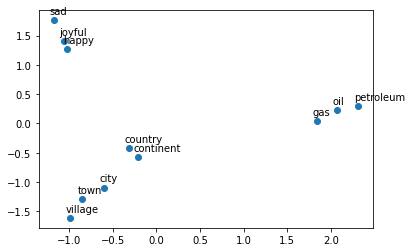

In [24]:
# We have done the plotting for you. Just run this cell.
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

**What do you notice?**

The word vectors for 'gas', 'oil' and 'petroleum' appear related to each other,
because their vectors are close to each other.  Similarly, 'sad', 'joyful'
and 'happy' all express emotions, and are also near each other.